# Counterfeit Medicine Sales Prediction

**By:** Hedgar Ajakaiye, 
     **September 2019**  

## Introduction

Counterfeit medicines are fake medicines which are either contaminated or contain wrong or no active ingredient. They could have the right active ingredient but at the wrong dose. Counterfeit drugs are illegal and are harmful to health. `10%` of the world's medicine is counterfeit and the problem is even worse in developing countries. Up to `30%` of medicines in developing countries are counterfeit.

Millions of pills, bottles and sachets of counterfeit and illegal medicines are being traded across the world. The World Health Organization (WHO) is working with International Criminal Police Organization (Interpol) to dislodge the criminal networks raking in billions of dollars from this cynical trade.

Despite all these efforts, counterfeit medicine selling rackets don’t seem to stop popping here and there. It has become a challenge to deploy resources to counter these; without spreading them too thin and eventually rendering them ineffective. Government has decided that they should focus on illegal operations of high networth first instead of trying to control all of them. In order to do that they have collected data which will help them to predict sales figures given an illegal operation's characteristics


## Formal Problem Statement

We would like to make example out a few of these counterfeiters but the challenge is what yardstick can we employ to determine the 'big fish(es)' that we can use as scape goat to send a strong message to these clandestine communities and equally serve as deterrent. After considering numerous features and attributes of these counterfeiters, we resolved to zero in on their sales figures. To this end we shall put to use the power of machine learning to scientifically predict current and future counterfeiters and stop them in their tracks for good!

We would train a model on  data we have collected secretly over the years on their operations. The data dictionary of the data is as follows:

                                                                                                                                                


|Variable               |        Description/Values                                                                    |
|:----------------------|:--------------------------------------------------------------------------:|
|Medicine_ID            |Alphanumeric identification number;Normal Integer                           |
|Counterfeit weight     |weighted percentage attached to each medicine;continuous                    |
|District_ID            |District identification number;alphanumeric                                 |
|Active since           | Year(s)monitoring started till date;Integer                                |
|Medicine MRP           | Medicine price quotes/codes;continuous                                     |
|Medicine type          |The type of the medicine,categorical                                        |
|Side effect level      |The severity of the side effect associated with the medicine;categorical    |
|Availability Rating    |The rate at which the medicine is availablecontinuous                       |
|Area type              |The level of development of an area                                         |
|Area city type         |City rate level;categorical                                                 |
|Area district level    |The level of the area district.categorical                                  |
|Counterfeit sales      |sales figures of counterfeited drugs/medicine                               |






## Load Library, Packages, Modules

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import  mean_absolute_error
from sklearn.metrics import  r2_score
from sklearn.metrics import  mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline


In [2]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
#plt.rcParams.update({'font.size':25})

## Load Data

In [3]:
# change directory
# point to the directory that house the data
os.chdir("/Users/ajakaiye/Documents/data")

In [4]:
# read data into pandas
train_data = pd.read_csv('counterfeit_train.csv')
test_data = pd.read_csv('counterfeit_test.csv')

In [5]:
#shape of test and train data
train_data.shape, test_data.shape

((6818, 12), (1705, 11))

In [6]:
train_data.columns

Index(['Medicine_ID', 'Counterfeit_Weight', 'DistArea_ID', 'Active_Since',
       'Medicine_MRP', 'Medicine_Type', 'SidEffect_Level',
       'Availability_rating', 'Area_Type', 'Area_City_Type', 'Area_dist_level',
       'Counterfeit_Sales'],
      dtype='object')

In [7]:
# combine test and train data to ensure uniform preprocessing
# to combine test and train data successfully, the value of the columns of test and train data must equal
test_data['Counterfeit_Sales'] =np.nan
test_data['data'] = 'test'
train_data['data'] = 'train'
test_data = test_data[train_data.columns]
all_data = pd.concat([test_data, train_data], axis=0)



In [8]:
all_data.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,data
0,HLZ81,NaN,Area027,1983,85.5328,Antibiotics,mild,0.112747,CityLimits,Tier 3,Medium,NaN,test
1,ECE94,13.45,Area045,2000,257.1460,OralContraceptives,mild,0.144446,DownTown,Tier 2,Unknown,NaN,test
2,SAD14,7.10,Area045,2000,98.1172,Antipyretics,mild,0.144221,DownTown,Tier 2,Unknown,NaN,test
3,EQV63,18.30,Area010,1996,135.3730,Tranquilizers,mild,0.100388,MidTownResidential,Tier 3,Unknown,NaN,test
4,AIR10,NaN,Area019,1983,112.8016,OralContraceptives,mild,0.022585,MidTownResidential,Tier 1,Small,NaN,test


In [9]:
#check the dimension
all_data.shape

(8523, 13)

In [10]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 6817
Data columns (total 13 columns):
Medicine_ID            8523 non-null object
Counterfeit_Weight     7060 non-null float64
DistArea_ID            8523 non-null object
Active_Since           8523 non-null int64
Medicine_MRP           8523 non-null float64
Medicine_Type          8523 non-null object
SidEffect_Level        8523 non-null object
Availability_rating    8523 non-null float64
Area_Type              8523 non-null object
Area_City_Type         8523 non-null object
Area_dist_level        8523 non-null object
Counterfeit_Sales      6818 non-null float64
data                   8523 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 932.2+ KB


In [11]:
#make the column names uniform
def clean_colname(name):
    name = name.strip().lower()
    return name
all_data = all_data.rename(columns= clean_colname)
all_data.head()

,medicine_id,counterfeit_weight,distarea_id,active_since,medicine_mrp,medicine_type,sideffect_level,availability_rating,area_type,area_city_type,area_dist_level,counterfeit_sales,data
0,HLZ81,NaN,Area027,1983,85.5328,Antibiotics,mild,0.112747,CityLimits,Tier 3,Medium,NaN,test
1,ECE94,13.45,Area045,2000,257.1460,OralContraceptives,mild,0.144446,DownTown,Tier 2,Unknown,NaN,test
2,SAD14,7.10,Area045,2000,98.1172,Antipyretics,mild,0.144221,DownTown,Tier 2,Unknown,NaN,test
3,EQV63,18.30,Area010,1996,135.3730,Tranquilizers,mild,0.100388,MidTownResidential,Tier 3,Unknown,NaN,test
4,AIR10,NaN,Area019,1983,112.8016,OralContraceptives,mild,0.022585,MidTownResidential,Tier 1,Small,NaN,test


In [12]:
#check and treat missing value. This value should exlude the counterfeit sale column as the na there is intentional
all_data.isnull().mean() * 100

medicine_id             0.000000
counterfeit_weight     17.165317
distarea_id             0.000000
active_since            0.000000
medicine_mrp            0.000000
medicine_type           0.000000
sideffect_level         0.000000
availability_rating     0.000000
area_type               0.000000
area_city_type          0.000000
area_dist_level         0.000000
counterfeit_sales      20.004693
data                    0.000000
dtype: float64

In [13]:
# fill missing values in counterfeit_weight columns with the mean weight
# the counterfeit_weight column portion of the training data set and not the combined portion shall be used to calculate the mean
# all_data['counterfeit_weight'].mean() # 14.158
# all_data['counterfeit_weight'].fillna(14.158, inplace = True)
# print('current number of missing value ', all_data['counterfeit_weight'].isnull().sum())
filt = all_data['data'] == 'train'
all_data.loc[filt, 'counterfeit_weight'].mean() # 14.115
all_data['counterfeit_weight'].fillna(14.115, inplace= True)
print('Total number of missing values after treatment:', all_data['counterfeit_weight'].isnull().sum())




Total number of missing values after treatment: 0


In [14]:
# display descriptive stats
all_data.describe().T

,count,mean,std,min,25%,50%,75%,max
counterfeit_weight,8523.0,14.150325,4.226154,5.855,10.610000,14.115000,17.300000,22.650000
active_since,8523.0,1995.831867,8.371760,1983.000,1985.000000,1997.000000,2002.000000,2007.000000
medicine_mrp,8523.0,151.292782,62.275067,41.590,104.126500,153.312800,195.943700,277.188400
availability_rating,8523.0,0.079132,0.051598,0.013,0.039989,0.066931,0.107585,0.341391
counterfeit_sales,6818.0,2280.583480,1693.354404,146.290,933.265600,1902.670400,3207.638400,13199.964800


In [15]:
# columns with float type
cont_features = all_data.select_dtypes(include=['float64']).columns

In [16]:
#column with integer data type
integer_features = all_data.select_dtypes(include=['int64']).columns

In [17]:
#columns with categorical type. This does not include the 'data' which serves the purpose of a separator
all_data.select_dtypes(include=['object']).columns

Index(['medicine_id', 'distarea_id', 'medicine_type', 'sideffect_level',
       'area_type', 'area_city_type', 'area_dist_level', 'data'],
      dtype='object')

## Data Exploration

#### How many unique medicine type are present?

In [18]:
# Number of unique medicine type
train_data['Medicine_Type'].nunique()

16

#### which area type has the highest counterfeit drug?
Down Town, Area has the highest number of counterfeited drugs and medicine

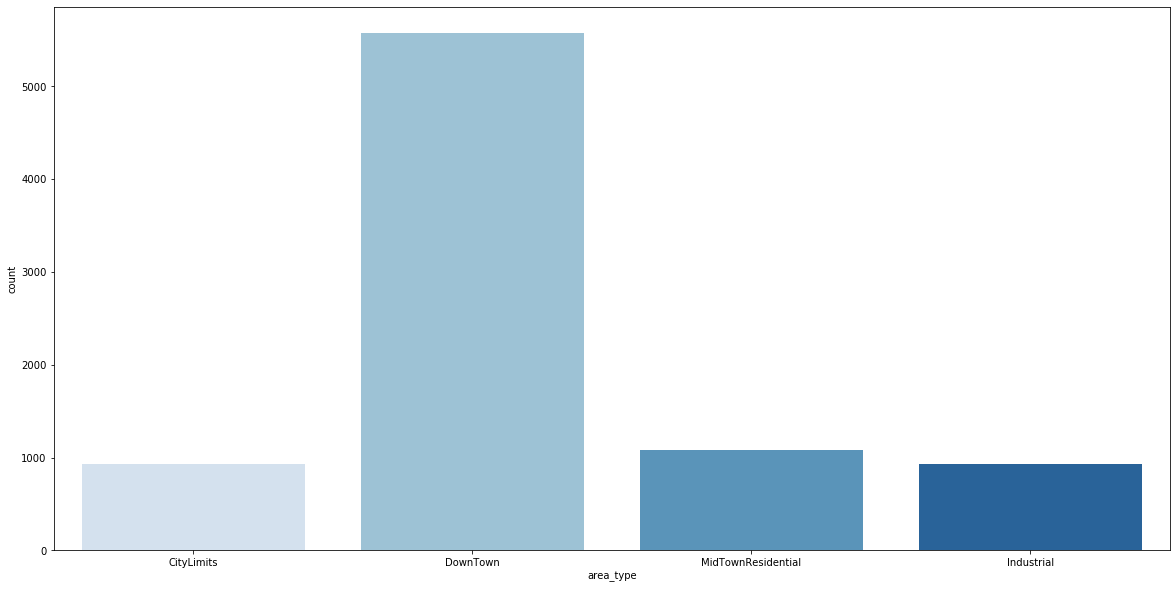

In [19]:
#which area type has the highest counterfeit drug

# train_data['Area_Type'].value_counts().plot(kind = 'bar')
# plt.xlabel('Area Type')
# plt.ylabel('count')
# plt.title('Counterfeit Drug Area Type Count');
sns.countplot(x ='area_type', data=all_data, palette='Blues');

### Which medicine type has the lowest count and their respective level of side effects?
Antiviral appears to be the least counterfeited medicine whereas Antibiotics are the third most counterfeited drug but with the most critical side effect level

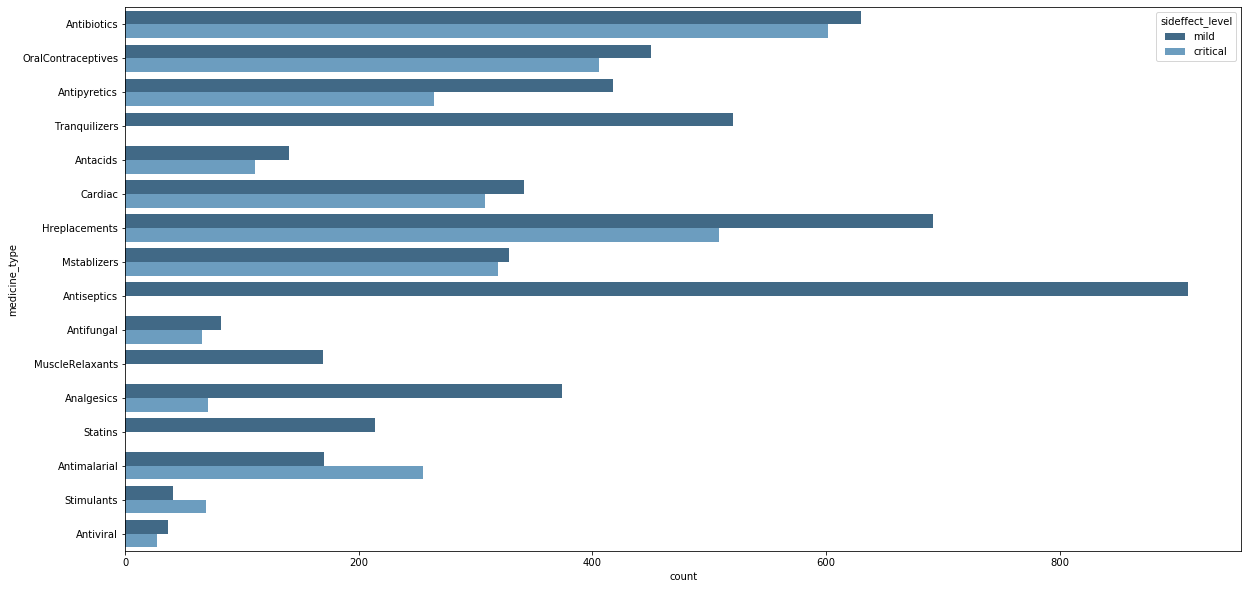

In [20]:
#which medicine type has the lowest count
#train_data['Medicine_Type'].value_counts(ascending=True)
sns.countplot(y='medicine_type', hue='sideffect_level', data=all_data, palette='Blues_d');

## How does the distribution of the counterfeit sale looks like
The distribution is not normal rather skewed to the right. This means that a handful of medicine have very high sales figures. This could also mean that there are alot of outliers in the counterfeit sale figure.But improves incredibly when standardize by taking it logarithm. lets check it out!

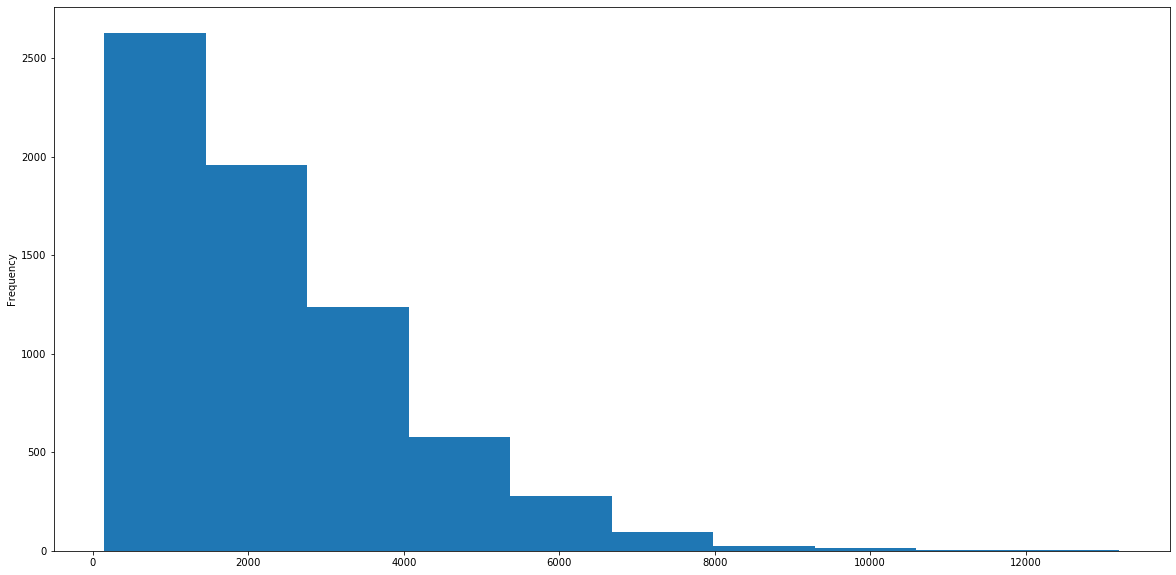

In [21]:
all_data['counterfeit_sales'].plot(kind = 'hist');

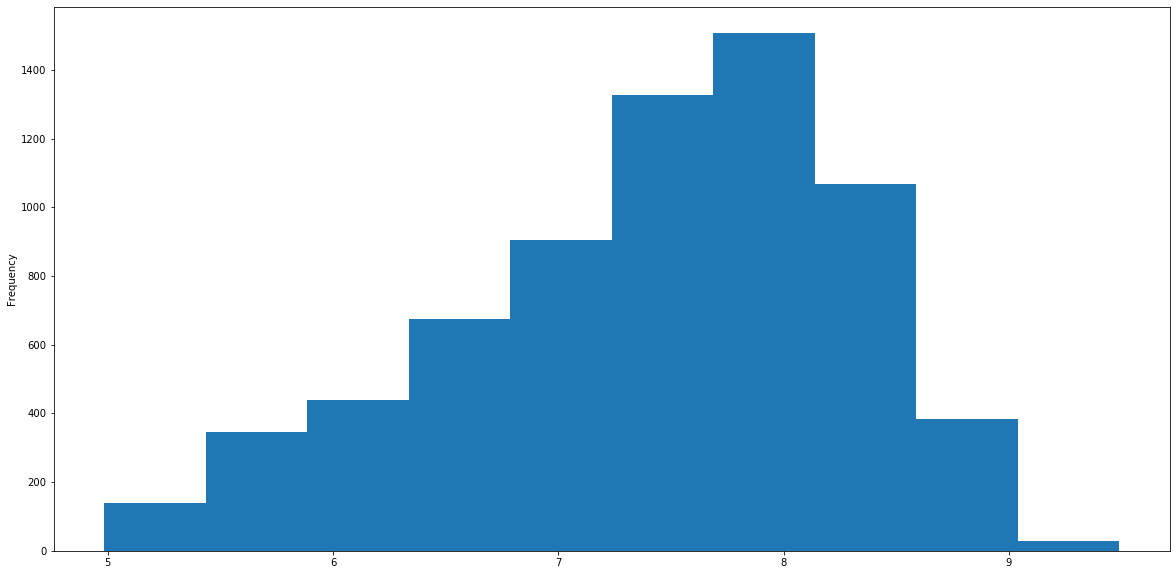

In [22]:
# standardize counterfeit sales
np.log(all_data['counterfeit_sales']).plot(kind = 'hist')

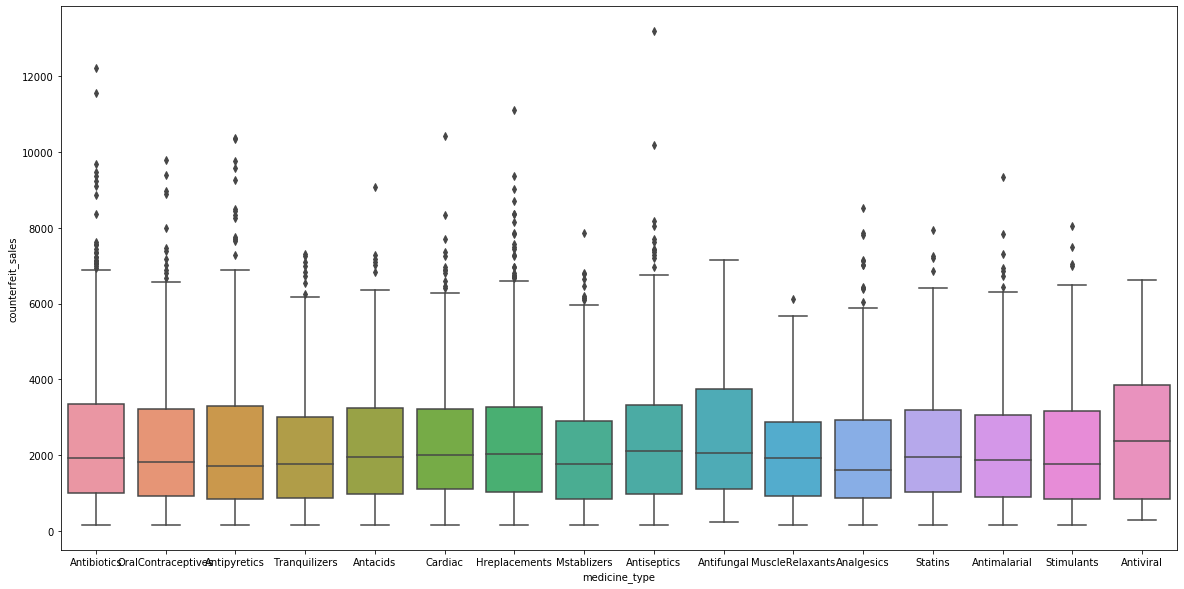

In [23]:
# checking the level of outlier of medicine type with respect to counterfeit sales
sns.boxplot(x = 'medicine_type', y = 'counterfeit_sales', data=all_data);

### What is the average sales figure of counterfeited medicine by medicine type
On average all the medicine type sale figure are above 2000 while **Antiviral** medicine type appears to command the highest average counterfeit sale. However this result should be taken with a pinch of salt until the outliers observed are treated appropriately!


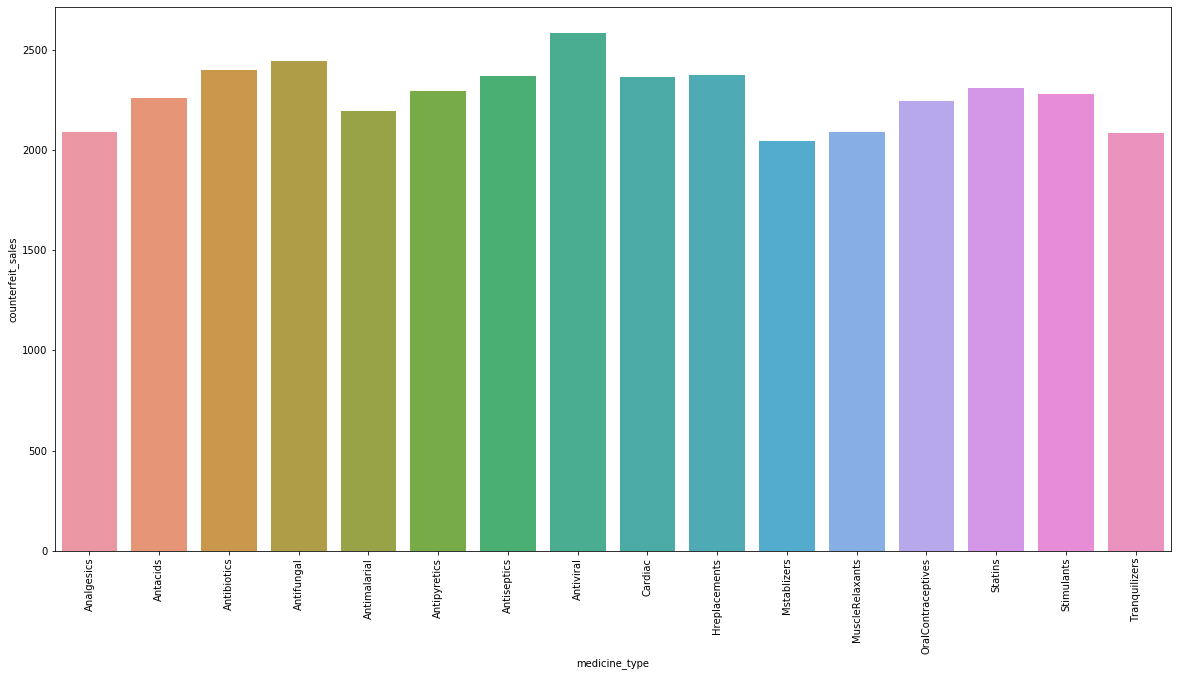

In [24]:
#average sales figure of counterfeited drugs 
filt = all_data['data'] == 'train'
adj_dat = all_data.loc[filt]
#adj_dat['counterfeit_sales'] = np.log(adj_dat['counterfeit_sales'])
avg_sales = adj_dat.groupby('medicine_type').agg({'counterfeit_sales':'mean'}).reset_index()
sns.barplot(x = 'medicine_type', y='counterfeit_sales', data=avg_sales)
plt.xticks(rotation=90);


### Which medicine type has the highest counterfeit sales
While it appears that the **Antiviral** drug has the highest sales figure,this figure is suspect until the outliers observed are treated

In [25]:
filt = all_data['data'] == 'train'
highestsales = all_data.loc[filt]['counterfeit_sales']>= 13199.9648
print('The medicine with the highest sales figure is:',all_data.loc[filt]['medicine_type'][highestsales].values)

The medicine with the highest sales figure is: ['Antiseptics']


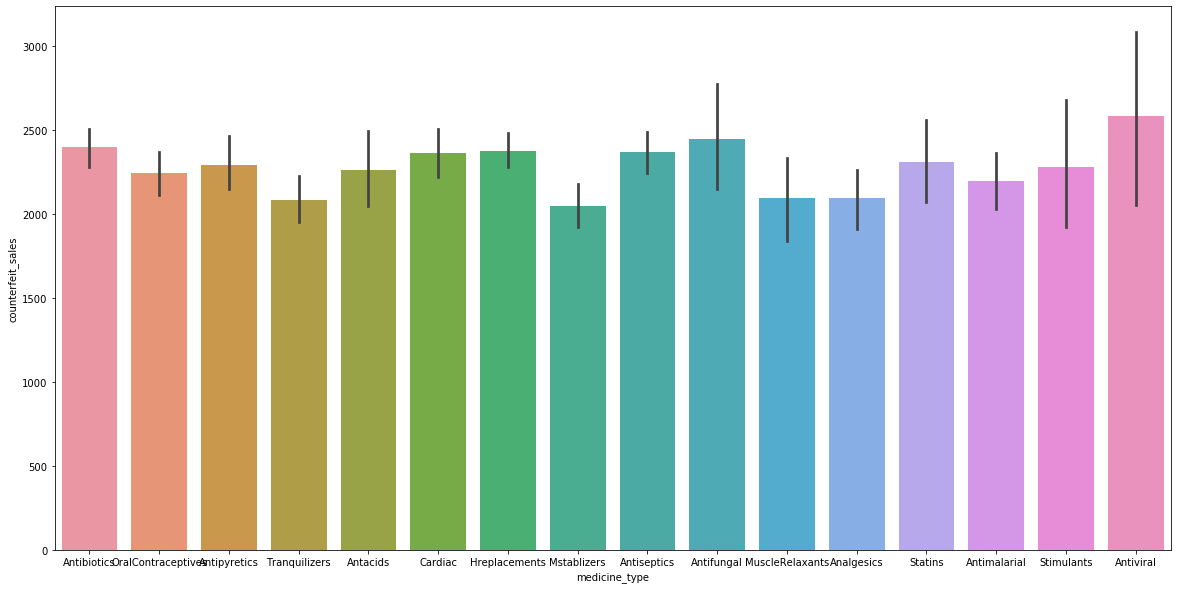

In [26]:
sns.barplot(x = 'medicine_type', y = 'counterfeit_sales', data=all_data);

In [27]:
all_data.columns

Index(['medicine_id', 'counterfeit_weight', 'distarea_id', 'active_since',
       'medicine_mrp', 'medicine_type', 'sideffect_level',
       'availability_rating', 'area_type', 'area_city_type', 'area_dist_level',
       'counterfeit_sales', 'data'],
      dtype='object')

### Data Preprocessing:Feature Engineering

In [28]:
# determine the period from the year since active till date
all_data['period_active'] =  2019 - all_data['active_since']

all_data = all_data.drop('active_since',1)
print('The number of columns after dropping the active_since column:',all_data.shape[1])


The number of columns after dropping the active_since column: 13


In [29]:
#check frequency of column
all_data['medicine_type'].value_counts()


Antibiotics           1232
Hreplacements         1200
Antiseptics            910
OralContraceptives     856
Antipyretics           682
Cardiac                649
Mstablizers            648
Tranquilizers          520
Analgesics             445
Antimalarial           425
Antacids               251
Statins                214
MuscleRelaxants        169
Antifungal             148
Stimulants             110
Antiviral               64
Name: medicine_type, dtype: int64

#### Treatment/transformation  of  categorical variable

In [30]:
# get dummy and drop Antiviral medicine for low frequency
medtypedummy = all_data['medicine_type'].str.get_dummies()


In [31]:
#add to the data frame accordingly
all_data = pd.concat([all_data, medtypedummy],1)
all_data = all_data.drop(['Antiviral','medicine_type'], 1)

In [32]:
all_data['area_type'].value_counts()

DownTown              5577
MidTownResidential    1083
CityLimits             935
Industrial             928
Name: area_type, dtype: int64

In [33]:
#create dummy of area_type
areatype_dummy = all_data['area_type'].str.get_dummies()


In [34]:
#drop industrial area type and add other area to data frame
all_data = pd.concat([all_data, areatype_dummy],1)
all_data = all_data.drop(['area_type', 'Industrial'],1)

In [35]:

pd.set_option('display.max_columns', 50)
all_data.head()

,medicine_id,counterfeit_weight,distarea_id,medicine_mrp,sideffect_level,availability_rating,area_city_type,area_dist_level,counterfeit_sales,data,period_active,Analgesics,Antacids,Antibiotics,Antifungal,Antimalarial,Antipyretics,Antiseptics,Cardiac,Hreplacements,Mstablizers,MuscleRelaxants,OralContraceptives,Statins,Stimulants,Tranquilizers,CityLimits,DownTown,MidTownResidential
0,HLZ81,14.115,Area027,85.5328,mild,0.112747,Tier 3,Medium,NaN,test,36,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,ECE94,13.450,Area045,257.1460,mild,0.144446,Tier 2,Unknown,NaN,test,19,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,SAD14,7.100,Area045,98.1172,mild,0.144221,Tier 2,Unknown,NaN,test,19,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,EQV63,18.300,Area010,135.3730,mild,0.100388,Tier 3,Unknown,NaN,test,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,AIR10,14.115,Area019,112.8016,mild,0.022585,Tier 1,Small,NaN,test,36,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [36]:
#create dummy for sideffect level columns of data frame
all_data['sideffect_level'].value_counts()

mild        5517
critical    3006
Name: sideffect_level, dtype: int64

In [37]:
#create dummy of sideffect column
all_data['sideffect_mc'] = np.where(all_data['sideffect_level'] == 'mild',1,0)
all_data = all_data.drop(['sideffect_level'], 1)

In [38]:
all_data['area_city_type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: area_city_type, dtype: int64

In [39]:
#create dummy for area city type
actype_dummy = all_data['area_city_type'].str.get_dummies()


In [40]:
#concat dummy with data frame and drop Tier one
all_data = pd.concat([all_data, actype_dummy],1)
all_data = all_data.drop(['Tier 1','area_city_type'], 1)

In [41]:
all_data['distarea_id'].value_counts()

Area027    935
Area013    932
Area035    930
Area049    930
Area046    930
Area045    929
Area018    928
Area017    926
Area010    555
Area019    528
Name: distarea_id, dtype: int64

In [42]:

# create dumy for district area id drop area019 and concatenate with data frame accordingly
distarea_dummy =  all_data['distarea_id'].str.get_dummies()


In [43]:
all_data = pd.concat([all_data, distarea_dummy],1)
all_data = all_data.drop(['Area019', 'distarea_id'],1)

In [44]:
all_data['area_dist_level'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: area_dist_level, dtype: int64

In [45]:
#create dummy of area distance level
ad_leve_dummy = all_data['area_dist_level'].str.get_dummies()


In [46]:


#concatenate dummy with data frame and drop high area distance
all_data = pd.concat([all_data, ad_leve_dummy],1)
all_data = all_data.drop(['High', 'area_dist_level'],1)

In [47]:

#dimemsion of combined data
all_data.shape

(8523, 40)

### Separate data into train and  test

In [48]:
#separate train data set from data frame and delete useless columns
counter_train = all_data[all_data['data'] == 'train']
del counter_train['data']


In [49]:
#separate test data from data frame and delete/drop useless columns
counter_test = all_data[all_data['data'] == 'test']
counter_test.drop(['data', 'counterfeit_sales'],axis = 1, inplace = True )



/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [50]:
#dimension of test and train data set
print('Our training data set has {} rows and {} columns'.format(counter_train.shape[0],counter_train.shape[1]))
print('Our testing data set has {} rows and {} columns'.format(counter_test.shape[0],counter_test.shape[1]))



Our training data set has 6818 rows and 39 columns
Our testing data set has 1705 rows and 38 columns


In [51]:
#check for missing values in test and train
print('Are there missing values in test data set:', counter_test.isnull().any().any())
print('Are there missing values in train data set:',counter_train.isnull().any().any())

Are there missing values in test data set: False
Are there missing values in train data set: False


### Feature Scaling and P.C.A
In order to train our data on many algorithm as possible and subsequently evaluate performance  we would create three copies of our training and test data set as follows:
* Training/testing data set that is scaled only
* Training/testing data set that is scaled and P.C.A applied with a cumulative explained ratio of at least 80%
* Training/testing data set free from the above operations

##### scaled Training and Test data set 

In [52]:
# before we proceed we would want to drop the medicine id from both data set as it does not have a predictive value
#we would also remove the target variable from the train set
sales_figures = counter_train[['counterfeit_sales']]
train_counter_w_o_spca = counter_train.drop(['medicine_id','counterfeit_sales'],axis =1)
test_counter_w_o_spca = counter_test.drop(['medicine_id'],axis =1)

In [53]:
train_counter_w_o_spca.head(2)

,counterfeit_weight,medicine_mrp,availability_rating,period_active,Analgesics,Antacids,Antibiotics,Antifungal,Antimalarial,Antipyretics,Antiseptics,Cardiac,Hreplacements,Mstablizers,MuscleRelaxants,OralContraceptives,Statins,Stimulants,Tranquilizers,CityLimits,DownTown,MidTownResidential,sideffect_mc,Tier 2,Tier 3,Area010,Area013,Area017,Area018,Area027,Area035,Area045,Area046,Area049,Medium,Small,Unknown
0,13.100,160.2366,0.070422,24,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,14.115,110.4384,0.013000,36,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0


In [54]:
test_counter_w_o_spca.head(2)

,counterfeit_weight,medicine_mrp,availability_rating,period_active,Analgesics,Antacids,Antibiotics,Antifungal,Antimalarial,Antipyretics,Antiseptics,Cardiac,Hreplacements,Mstablizers,MuscleRelaxants,OralContraceptives,Statins,Stimulants,Tranquilizers,CityLimits,DownTown,MidTownResidential,sideffect_mc,Tier 2,Tier 3,Area010,Area013,Area017,Area018,Area027,Area035,Area045,Area046,Area049,Medium,Small,Unknown
0,14.115,85.5328,0.112747,36,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,13.450,257.1460,0.144446,19,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [55]:
sales_figures.head(2)

,counterfeit_sales
0,1775.5026
1,3069.1520


In [56]:
train_counter_w_o_spca.shape, test_counter_w_o_spca.shape

((6818, 37), (1705, 37))

In [57]:
#scaled train and test data frame
scaled_counter_train = pd.DataFrame(StandardScaler().fit_transform(train_counter_w_o_spca), columns=train_counter_w_o_spca.columns)
scaled_counter_test = pd.DataFrame(StandardScaler().fit_transform(test_counter_w_o_spca),columns=test_counter_w_o_spca.columns)

In [58]:
#lets have a peak of our scled data frame
scaled_counter_train.head()

,counterfeit_weight,medicine_mrp,availability_rating,period_active,Analgesics,Antacids,Antibiotics,Antifungal,Antimalarial,Antipyretics,Antiseptics,Cardiac,Hreplacements,Mstablizers,MuscleRelaxants,OralContraceptives,Statins,Stimulants,Tranquilizers,CityLimits,DownTown,MidTownResidential,sideffect_mc,Tier 2,Tier 3,Area010,Area013,Area017,Area018,Area027,Area035,Area045,Area046,Area049,Medium,Small,Unknown
0,-0.239789,0.142044,-0.170030,0.099938,-0.234715,-0.176509,-0.40727,-0.128646,4.371738,-0.292101,-0.344682,-0.287941,-0.408737,-0.285544,-0.144262,-0.336637,-0.158458,-0.118872,-0.256214,-0.347604,0.722174,-0.383205,-1.363781,-0.700428,-0.798600,-0.263292,-0.351303,-0.354195,-0.346012,-0.347604,-0.35104,-0.347869,2.846542,-0.348663,-0.690910,1.592579,-0.630183
1,-0.000011,-0.658577,-1.285498,1.533910,-0.234715,-0.176509,-0.40727,-0.128646,-0.228742,-0.292101,-0.344682,-0.287941,-0.408737,3.502084,-0.144262,-0.336637,-0.158458,-0.118872,-0.256214,2.876837,-1.384708,-0.383205,0.733255,-0.700428,1.252192,-0.263292,-0.351303,-0.354195,-0.346012,2.876837,-0.35104,-0.347869,-0.351303,-0.348663,1.447367,-0.627912,-0.630183
2,-1.202446,1.736475,-0.357270,0.099938,-0.234715,-0.176509,-0.40727,-0.128646,-0.228742,-0.292101,-0.344682,3.472939,-0.408737,-0.285544,-0.144262,-0.336637,-0.158458,-0.118872,-0.256214,-0.347604,0.722174,-0.383205,0.733255,-0.700428,-0.798600,-0.263292,-0.351303,-0.354195,-0.346012,-0.347604,-0.35104,-0.347869,2.846542,-0.348663,-0.690910,1.592579,-0.630183
3,-0.546895,-0.826672,-0.264562,0.099938,-0.234715,-0.176509,-0.40727,-0.128646,-0.228742,-0.292101,-0.344682,-0.287941,-0.408737,-0.285544,-0.144262,2.970557,-0.158458,-0.118872,-0.256214,-0.347604,0.722174,-0.383205,0.733255,-0.700428,-0.798600,-0.263292,-0.351303,-0.354195,-0.346012,-0.347604,-0.35104,-0.347869,2.846542,-0.348663,-0.690910,1.592579,-0.630183
4,-0.000011,-1.526724,3.296290,1.533910,-0.234715,-0.176509,-0.40727,-0.128646,-0.228742,-0.292101,-0.344682,-0.287941,2.446560,-0.285544,-0.144262,-0.336637,-0.158458,-0.118872,-0.256214,-0.347604,-1.384708,2.609569,-1.363781,-0.700428,-0.798600,-0.263292,-0.351303,-0.354195,-0.346012,-0.347604,-0.35104,-0.347869,-0.351303,-0.348663,-0.690910,1.592579,-0.630183


In [59]:
# the evidence of a scaled data set is that the mean must 0 and the stardard diviation must be 1
scaled_counter_train.describe().T

,count,mean,std,min,25%,50%,75%,max
counterfeit_weight,6818.0,-5.481747e-16,1.000073,-1.951311,-0.830377,-0.000011,0.752397,2.016253
medicine_mrp,6818.0,-8.233041e-17,1.000073,-1.762260,-0.753900,0.028846,0.719409,2.022317
availability_rating,6818.0,-3.074364e-16,1.000073,-1.285498,-0.759864,-0.237364,0.554070,5.093801
period_active,6818.0,-1.802932e-16,1.000073,-1.334034,-0.736546,-0.139058,1.294914,1.533910
Analgesics,6818.0,-3.855981e-17,1.000073,-0.234715,-0.234715,-0.234715,-0.234715,4.260479
Antacids,6818.0,-6.252943e-18,1.000073,-0.176509,-0.176509,-0.176509,-0.176509,5.665429
Antibiotics,6818.0,1.432966e-17,1.000073,-0.407270,-0.407270,-0.407270,-0.407270,2.455375
Antifungal,6818.0,-1.198481e-17,1.000073,-0.128646,-0.128646,-0.128646,-0.128646,7.773251
Antimalarial,6818.0,-4.872085e-17,1.000073,-0.228742,-0.228742,-0.228742,-0.228742,4.371738
Antipyretics,6818.0,-1.875883e-17,1.000073,-0.292101,-0.292101,-0.292101,-0.292101,3.423470


In [60]:
#pca and sclaed version of test and train set; Apply Principal Component Analysis, 
#a fancy name for reducing the number colums without loosing data. PCA uses scaled data only
pca = PCA(n_components=37)
pca_scaled_counter_test = pd.DataFrame(pca.fit_transform(scaled_counter_test), columns=scaled_counter_test.columns)
pca_scaled_counter_train = pd.DataFrame(pca.fit_transform(scaled_counter_train), columns=scaled_counter_train.columns)


In [61]:
#Let see the critical attributes of PCA: Explained Variance & Explained variance ratio
#expalined variance
pca.explained_variance_

array([4.62909965e+00, 2.69468786e+00, 2.50273279e+00, 2.04629901e+00,
       1.80330027e+00, 1.51225709e+00, 1.48483326e+00, 1.24130483e+00,
       1.19569542e+00, 1.16503110e+00, 1.14137367e+00, 1.11996342e+00,
       1.10427248e+00, 1.09911883e+00, 1.08591208e+00, 1.07923465e+00,
       1.06363119e+00, 1.04784011e+00, 1.03302307e+00, 1.02432398e+00,
       1.01882760e+00, 1.01612949e+00, 9.30410749e-01, 9.03332894e-01,
       8.60839639e-01, 6.05840014e-01, 5.88203011e-01, 7.90944370e-03,
       2.65613080e-30, 2.10488861e-30, 1.34364467e-30, 9.36321841e-31,
       6.82952828e-31, 4.97952544e-31, 1.95285746e-31, 7.60763518e-32,
       1.61270079e-32])

In [62]:
#explaned variance ratio
pca.explained_variance_ratio_

array([1.25092451e-01, 7.28187196e-02, 6.76315058e-02, 5.52972670e-02,
       4.87306966e-02, 4.08658186e-02, 4.01247428e-02, 3.35438586e-02,
       3.23113527e-02, 3.14827087e-02, 3.08434126e-02, 3.02648419e-02,
       2.98408249e-02, 2.97015573e-02, 2.93446706e-02, 2.91642259e-02,
       2.87425727e-02, 2.83158493e-02, 2.79154474e-02, 2.76803714e-02,
       2.75318424e-02, 2.74589312e-02, 2.51425483e-02, 2.44108217e-02,
       2.32625238e-02, 1.63716528e-02, 1.58950470e-02, 2.13737395e-04,
       7.17767897e-32, 5.68805374e-32, 3.63093944e-32, 2.53022840e-32,
       1.84554773e-32, 1.34562029e-32, 5.27721902e-33, 2.05581605e-33,
       4.35801149e-34])

#### P.C.A  Variance Report

In [63]:
#To make sense of of this bunch of numbers we would create a data frame that depict the cummulated explained variance ratio
data = {'Variance': pca.explained_variance_, '%Variance_ratio':pca.explained_variance_ratio_*100}
var_report = pd.DataFrame(data)
var_report['CumSum'] = var_report['%Variance_ratio'].cumsum()
print('Number of obervation n = {}'.format(pca.n_samples_))
var_report

Number of obervation n = 6818


,Variance,%Variance_ratio,CumSum
0,4.629100e+00,1.250925e+01,12.509245
1,2.694688e+00,7.281872e+00,19.791117
2,2.502733e+00,6.763151e+00,26.554268
3,2.046299e+00,5.529727e+00,32.083994
4,1.803300e+00,4.873070e+00,36.957064
5,1.512257e+00,4.086582e+00,41.043646
6,1.484833e+00,4.012474e+00,45.056120
7,1.241305e+00,3.354386e+00,48.410506
8,1.195695e+00,3.231135e+00,51.641641
9,1.165031e+00,3.148271e+00,54.789912


#### decision time:how many component should we settle for?
from the scree diagram, we may settle for 26 components with 99% of  


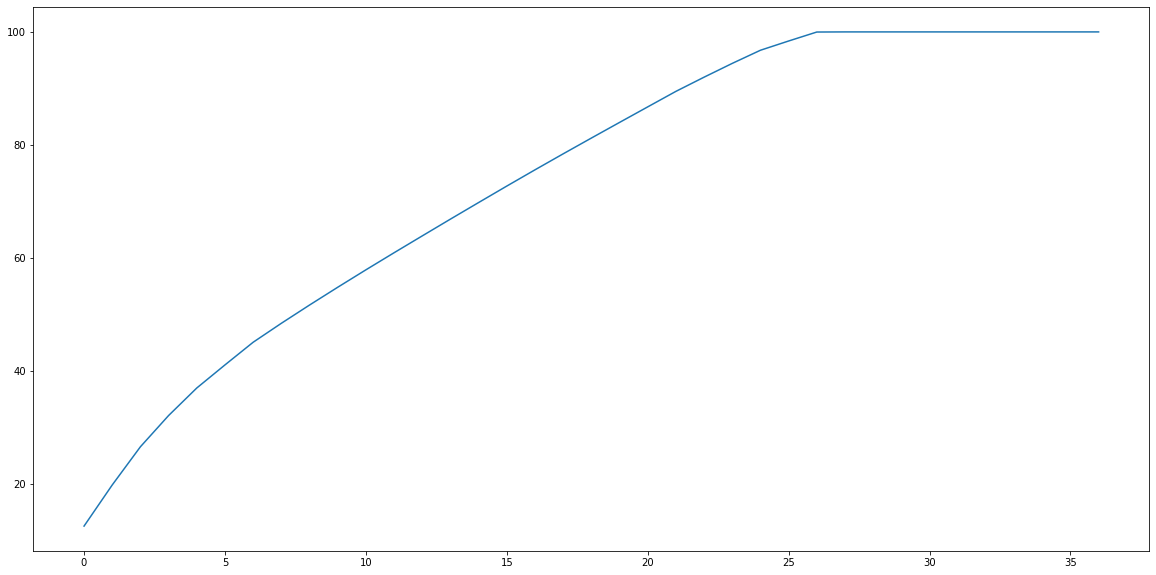

In [64]:
plt.plot(var_report['CumSum']);

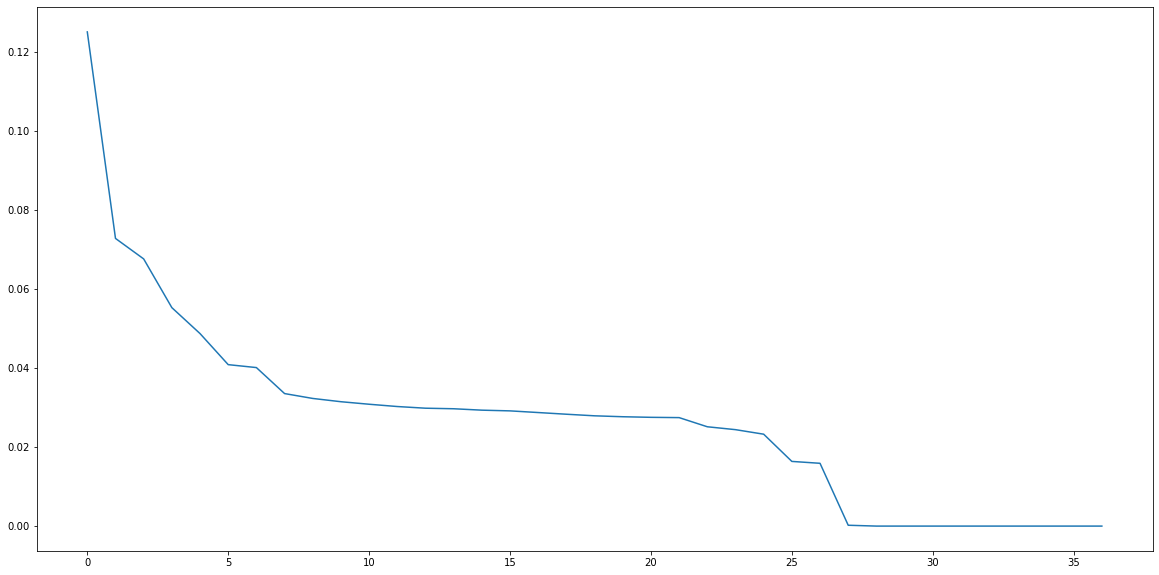

In [65]:
# let see it from another perspective
plt.plot(pca.explained_variance_ratio_)

In [66]:
#keep 26 components
pca_scaled_train = pca_scaled_counter_train.iloc[:,0:27]
pca_scaled_test = pca_scaled_counter_test.iloc[:,0:27]

In [67]:
pca_scaled_test.shape, pca_scaled_train.shape

((1705, 27), (6818, 27))

### Some exploration of train data set after standardizing data

IndexError: index 8 is out of bounds for axis 0 with size 8

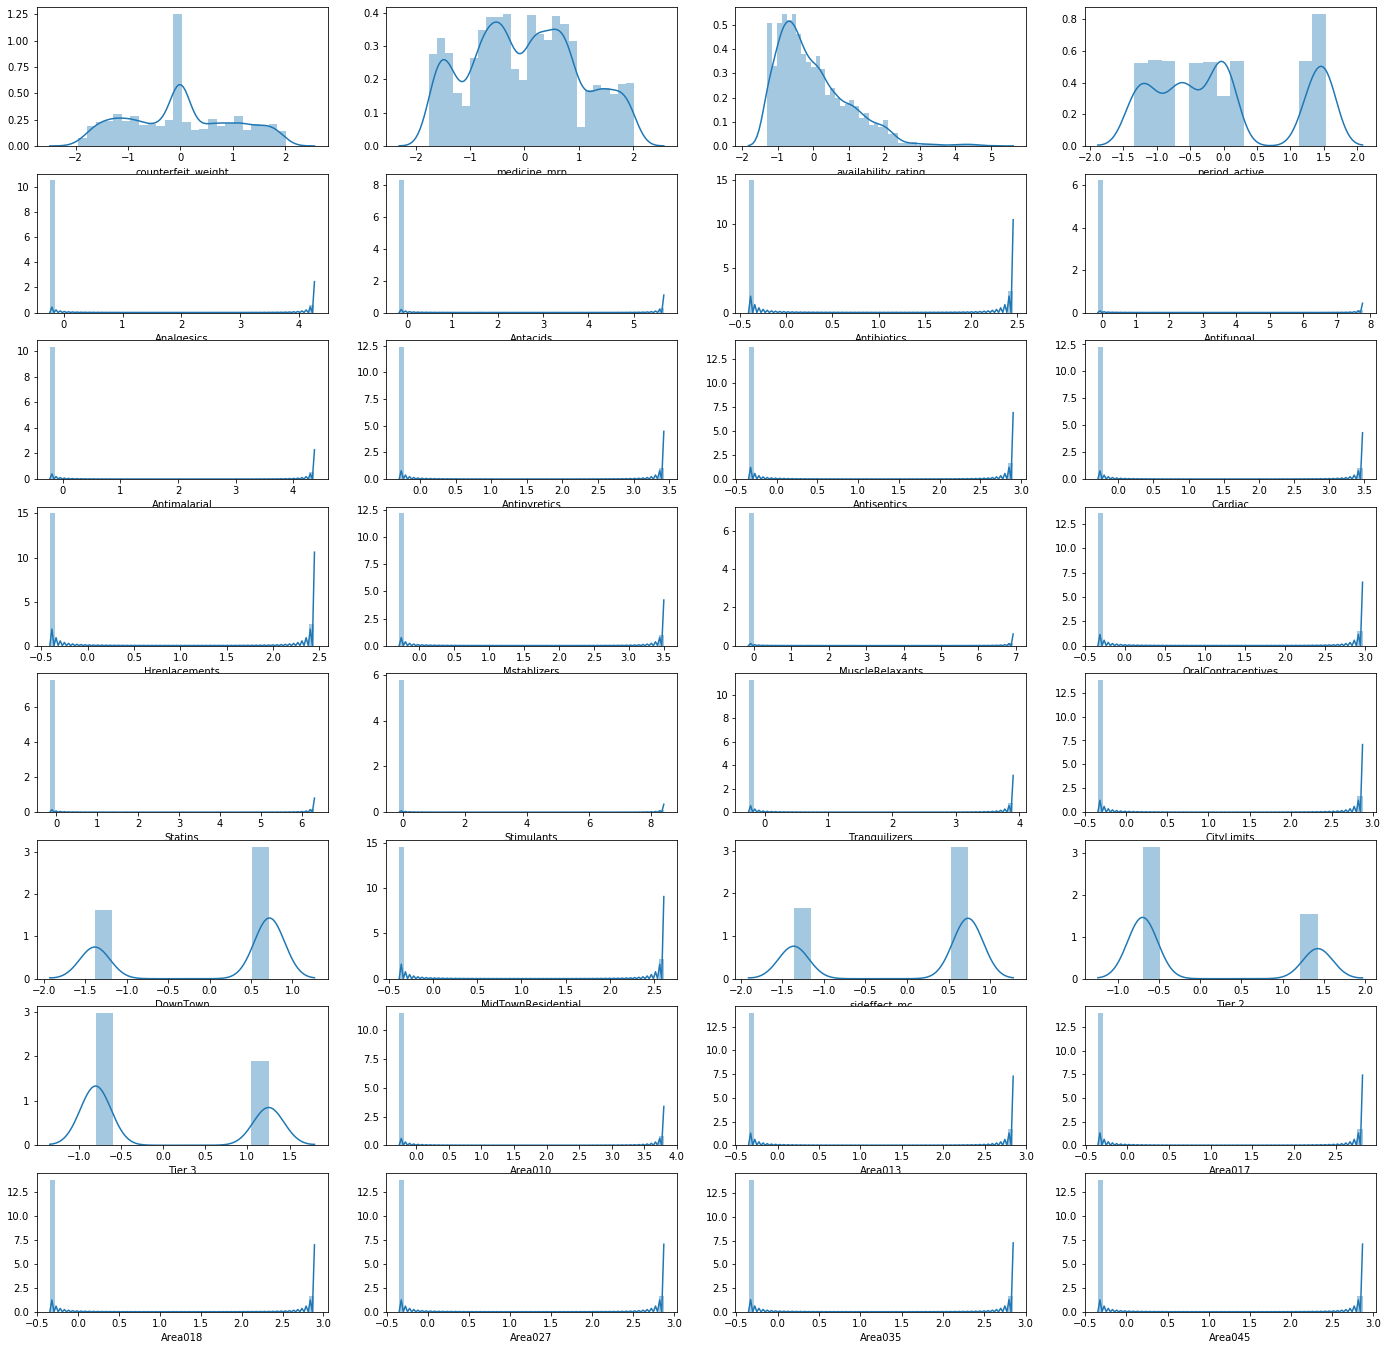

In [68]:
#Distribution of training data
fig, axs = plt.subplots(8, 4, figsize=(24,24))
for ix, col in enumerate(scaled_counter_train.columns):
    p0 = ix // 4
    p1 = ix % 4
    sns.distplot(scaled_counter_train[col], ax = axs[p0, p1])
    axs[p0, p1].set(xlabel=col)

IndexError: index 4 is out of bounds for axis 0 with size 4

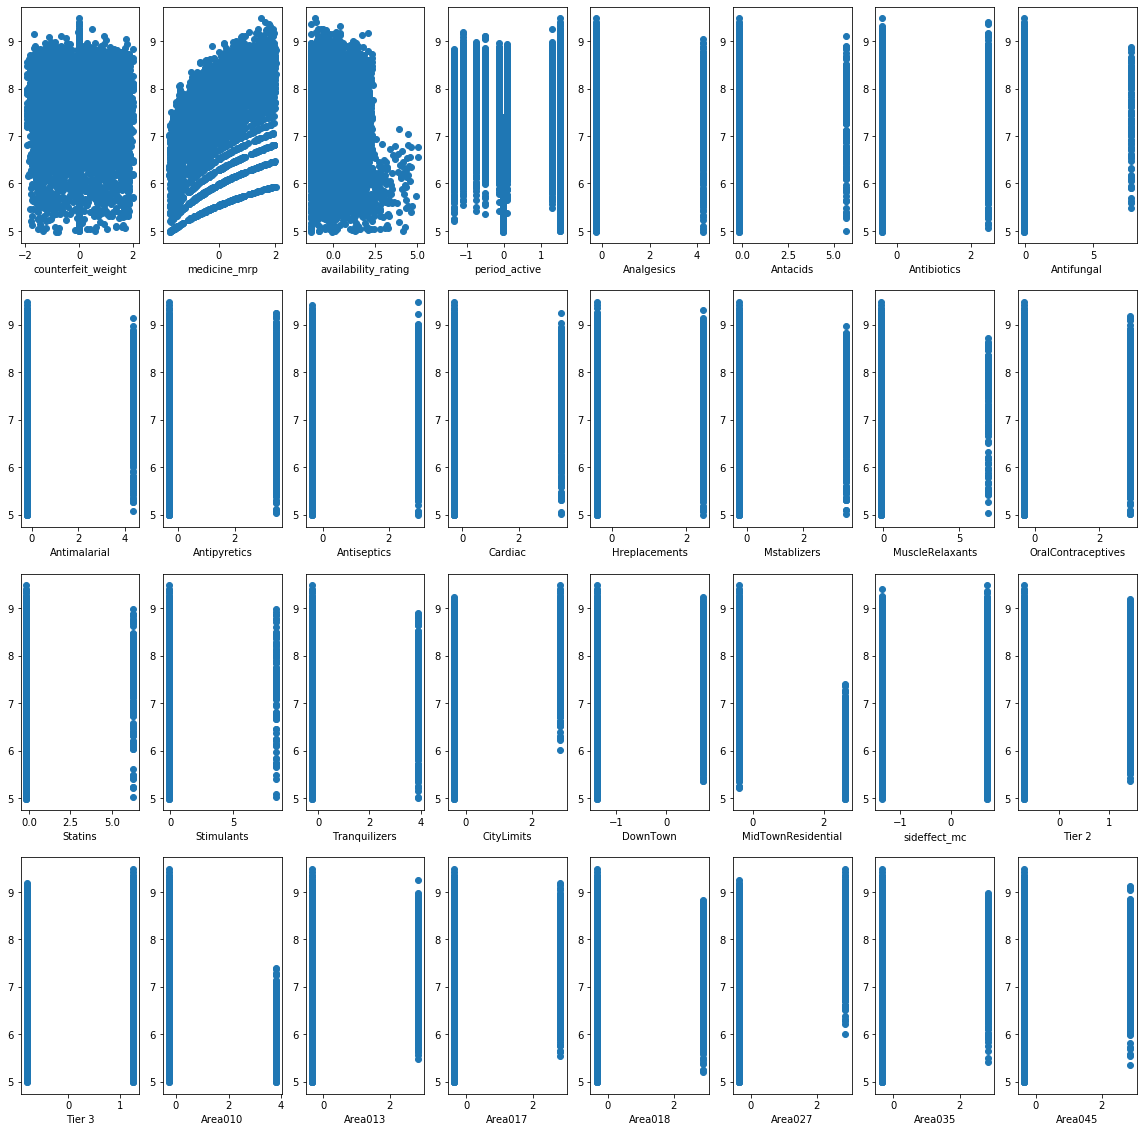

In [69]:
#features relationship with target: counterfeit sales figures
#
fig, axs = plt.subplots(4, 8, figsize=(20, 20))
for ix, feature in enumerate(scaled_counter_train.columns):
    p0 = ix // 8
    p1 = ix % 8
    axs[p0, p1].scatter(scaled_counter_train[feature], np.log(sales_figures))
    axs[p0, p1].set(xlabel=feature )


There is not much features relationship with the sales figure other than medicine_mrp which is somewhat positive. That is the rise in medicine mrp leads to increase in sales figures of counterfeit drugs. This should be further investigated

## Modeling
Under model building, we would adopt the iterative approach. We would build a basic model with a simple algorithm and evaluate performance therefrom accordingly. Then we would build a couple of 'out of the box models',evaluate the performance of these model and subsequently pick the two models with highest performance  metrics. We would then carryout hyper-parameter tuning of the two models to improve performance to satisfaction. This is further broken down below:

Basic  Model:
* Linear Regression

Out of the box model:
* Support Vector Machine
* Naive Bayes
* KN-Neighbor
* Decision Tree
* Random Forest

* Xgboost


### Basic/Simple Model
**Linear Regression**
* Linear regression, simply put is about extracting a mathematical equation from the data,which explains how the variable of interest, in our current case, the counterfeit sales figure, is affected by other variables in the data.

Mathematical foundation
* Multiple Linear regression: 
$\displaystyle Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_n X_n$

$\displaystyle\beta_1 = \frac {\Sigma( x - \bar{x})(y - \bar{y})}{\Sigma( x  -\bar{x})^2}$ $\to$ $\displaystyle\beta_1 = 
\frac{\Sigma xy -\frac{\Sigma x\Sigma y}{n}}{\Sigma x^2 - \frac{(\Sigma x)^2}{n}}$  
$\beta_0 = \bar{y}-\beta_1\bar{x}$

The ultimate goal is to minimize the error : $\displaystyle\sum_{i = 0}^n(Y - \beta_0 - \beta_1 X)^2$

In [70]:
from sklearn.model_selection import KFold

In [71]:
# we would be using a unique scoring metric which is 1-(mean absolute error/1660)
kf = KFold(n_splits=5, random_state=42, shuffle=True)
X = train_counter_w_o_spca.as_matrix()
Y = np.log(sales_figures).values.ravel()
X_test = test_counter_w_o_spca
model = LinearRegression()
scores = cross_val_score(model, X, Y, cv=kf, scoring= 'neg_mean_absolute_error')
print('MAE score - Linear Regression:', scores.mean())
print('Customise score(1-MAE/1660) - Linear Regression:',scores)


MAE score - Linear Regression: -0.36866268570579824
Customise score(1-MAE/1660) - Linear Regression: [-0.37145757 -0.36355448 -0.36669748 -0.37084516 -0.37075874]


/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [72]:
# manual cross validation procedure- with same Mean Absolute Error results
from sklearn.model_selection import KFold
counter = 0
for trainIdx, valIdx in KFold(n_splits = 5, random_state = 42, shuffle=True).split(X,Y):
    print('Running for fold:', counter)
    X_train, y_train, X_val, y_val = X[trainIdx, :], Y[trainIdx], X[valIdx, :], Y[valIdx]
    
    model = LinearRegression(fit_intercept=True, normalize=False)
    model.fit(X_train, y_train)
    predy_train = model.predict(X_train)
    mae = mean_absolute_error(y_train, predy_train)
    r2 = r2_score(y_train,predy_train)
    print('mae',mae)
    print('r2:', r2)
    predy_val = model.predict(X_val)
    mae_val = mean_absolute_error(y_val,predy_val)
    print('val mae:', mae_val.mean())
    print('val R2:', r2)
    
    counter += 1


Running for fold: 0
mae 0.3651960792342806
r2: 0.7115435533340817
val mae: 0.37145757028478116
val R2: 0.7115435533340817
Running for fold: 1
mae 0.36809437382559773
r2: 0.7085931988174345
val mae: 0.3635544765613657
val R2: 0.7085931988174345
Running for fold: 2
mae 0.36732296711910845
r2: 0.7113306458402701
val mae: 0.3666974824075402
val R2: 0.7113306458402701
Running for fold: 3
mae 0.3658797990536596
r2: 0.7114488448562497
val mae: 0.3708451616554974
val R2: 0.7114488448562497
Running for fold: 4
mae 0.36608671984563296
r2: 0.715753389700766
val mae: 0.3707587376198066
val R2: 0.715753389700766


### Out-of-the-box Models
As we earlier said we would build our model using the other versions of our data with five other algorithms and subsequently pick the two best in terms of performance for further tuning and processing.


In [73]:
scaled_train = scaled_counter_train.as_matrix()
pca_scaled_train = pca_scaled_counter_train.as_matrix()
kf = KFold(n_splits=5, shuffle=True, random_state=42)
Y_train = np.log(sales_figures).values.ravel()

/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [74]:
from sklearn.metrics import make_scorer

In [75]:
# make a function of the unique evaluation method

def adj_mae(y_true,y_pred):
    norm = mean_absolute_error(y_true, y_pred)
    return 1-(norm/1660)

mea_scorer = make_scorer(adj_mae, greater_is_better=True)


In [76]:
X_variants = [scaled_train, pca_scaled_train]
X_names = ['X with scaling only', 'X with pca']
for train_X, X_name in zip(X_variants, X_names):
    print('Data:', X_name)
    
    decision_tree = DecisionTreeRegressor()
    decision_tree_score = cross_val_score(decision_tree, train_X, Y_train, cv=kf, scoring='neg_mean_absolute_error')
    print('Mean MAE Score - Decision Trees:', decision_tree_score.mean())
    
    random_forest = RandomForestRegressor()
    random_forest_score = cross_val_score(random_forest, train_X, Y_train, cv=kf, scoring= 'neg_mean_absolute_error')
    print('Mean MAE Score - Random Forest:', random_forest_score.mean())
    
    #naive_bayes = GaussianNB()
    #naive_bayes_score = cross_val_score(naive_bayes, train_X, Y, cv=5, scoring='neg_mean_absolute_error')
    #print('Mean MEA Score- Naive Bayes:', naive_bayes_score.mean())
    
    knn = KNeighborsRegressor()
    knn_score = cross_val_score(knn, train_X, Y_train, cv=kf, scoring= 'neg_mean_absolute_error')
    print('Mean MAE Score - KNN:', knn_score.mean())

Data: X with scaling only
Mean MAE Score - Decision Trees: -0.5064668617005385


/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.

Mean MAE Score - Random Forest: -0.39251248703182035
Mean MAE Score - KNN: -0.4406030975222793
Data: X with pca
Mean MAE Score - Decision Trees: -0.5344117484422166


/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.

Mean MAE Score - Random Forest: -0.4026994173280743
Mean MAE Score - KNN: -0.4406030975222793


### Evaluation
From the results above, since our metric is mean absolute error, the lower would be the better. To this end we can see that only Random Forest using the scaled version of our data has the lowest score which is an  improvement on our base model.

We would channel our effort to improve on these scores by fine tunning the hyper-parameters of the Linear regression and Random forest algorithms alternatively we may take a critical look at our features for possible re-engineering. We would have verified our performance on the test portion of the data if we had the target variable therein.Meanwhile we can rely on the performance from our validation portion of data through cross validation.

It is common knowledge that building models and applying algorithms is not a one size fit all scenario. This is the logic behind trying different model and the aim is really to see which model is better at this particular data at hand. To this end we would have to reconsider our earlier decision of picking two of the the best performing-in this case, the algorithm that reduces our Mean Absolute error the most- out of the bag models algorithms. From the result thus far we shall go ahead and fine tune the hyper-parameters of  the Linear regression and the Random Forest because the models built using these algorithms appears to produce results that are close to our objective of reducing the mean absolute error.


### Hyper-parameter tuning for Linear Regression and Random Forest

In [77]:
# Fine tune alpha hyper-parameter for linear regression
X_scale = scaled_counter_train.as_matrix()

best_alpha = None
best_mae = None
for alpha in [1e-6,1e-5,1e-4, 1e-3, 1e-2,1e-1, 1., 10., 1000.]:
    print('Training Linear model with L2 regularization for alpha=', alpha)
    counter = 0
    all_fold_mae = []
    rtwo_com = []
    
    for trainidx, validx in KFold(n_splits=5, random_state= 42).split(X_scale, Y):
        print('Running fold:', counter)
        X_train, y_train, X_val, y_val = X_scale[trainidx, :], Y[trainidx], X_scale[validx, :], Y[validx]
        
    
        #trainthe model
        model = Ridge(fit_intercept=True, normalize=False,alpha=alpha)
        model.fit(X_train, y_train)
    
        pred_train = model.predict(X_train)
    
        mae = mean_absolute_error(y_train, pred_train)
        #rtwo_score = r2_score(y_train, pred_train)
    
        pred_val = model.predict(X_val)
    
        mae = mean_absolute_error(y_val, pred_val)
        #rtwo_score = r2_score(np.exp(y_val),np.exp(pred_val))
        counter += 1
    
        all_fold_mae.append(mae)
        #rtwo_com.append(rtwo_score)
    
        averagemae = np.mean(all_fold_mae)
        #thertwo = np.mean(rtwo_com)
        #print('checking the r score =', thertwo)
        
        print('Avg CV mae', averagemae)
    
        if best_mae is None:
            best_alpha, best_mae = alpha, averagemae
        elif best_mae > averagemae:
            best_alpha, best_mae = alpha, averagemae
    
        print('Best alpha:', best_alpha)
        print('Best mae:', best_mae)
        
    
    



/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Training Linear model with L2 regularization for alpha= 1e-06
Running fold: 0
Avg CV mae 0.3724975881919831
Best alpha: 1e-06
Best mae: 0.3724975881919831
Running fold: 1
Avg CV mae 0.3691960378276775
Best alpha: 1e-06
Best mae: 0.3691960378276775
Running fold: 2
Avg CV mae 0.36871080511003657
Best alpha: 1e-06
Best mae: 0.36871080511003657
Running fold: 3
Avg CV mae 0.36726117468026476
Best alpha: 1e-06
Best mae: 0.36726117468026476
Running fold: 4
Avg CV mae 0.36896119869723726
Best alpha: 1e-06
Best mae: 0.36726117468026476
Training Linear model with L2 regularization for alpha= 1e-05
Running fold: 0
Avg CV mae 0.37249758817169715
Best alpha: 1e-06
Best mae: 0.36726117468026476
Running fold: 1
Avg CV mae 0.3691960378183007
Best alpha: 1e-06
Best mae: 0.36726117468026476
Running fold: 2
Avg CV mae 0.3687108051072377
Best alpha: 1e-06
Best mae: 0.36726117468026476
Running fold: 3
Avg CV mae 0.3672611746841193
Best alpha: 1e-06
Best mae: 0.36726117468026476
Running fold: 4
Avg CV mae 0

In [80]:
best_mae, best_alpha

(0.36726117468026476, 1e-06)

In [81]:
#test_model = Ridge(alpha=best_alpha)
#test_model.fit(scaled_counter_train,Y)

In [82]:
#predo_test = test_model.predict(scaled_counter_test)
#predo_test = np.exp(predo_test)
#pd.DataFrame(predo_test).to_csv('ridge_model.csv', index= False)

In [83]:
# hyper-parameter tunning for random forest
# check cross validation
foldmae = []
for trainIdx, ValidIdx in KFold(n_splits=10, random_state=42).split(X_scale, Y):
    X_train, y_train =  X_scale[trainIdx, :], Y[trainIdx]
    X_val, y_val =  X_scale[ValidIdx, :], Y[ValidIdx]
    
    model = RandomForestRegressor(n_estimators=100)

    #on train set
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    mean_abso = mean_absolute_error(y_train, pred_train)
    
    #on valid. set
    pred_val = model.predict(X_val)
    
    mean_abso = mean_absolute_error(y_val, pred_val)
    
    foldmae.append(mean_abso)
    print('val MAE:',mean_absolute_error(y_val, pred_val))
    print('Train MAE:',mean_absolute_error(y_train, pred_train))
    print('Mean MAE ---- Random Forest', np.mean(foldmae))
    
    
    


val MAE: 0.36199296147749166
Train MAE: 0.14048879316650253
Mean MAE ---- Random Forest 0.36199296147749166
val MAE: 0.399814897440889
Train MAE: 0.13880023529452012
Mean MAE ---- Random Forest 0.3809039294591903
val MAE: 0.3694850784077078
Train MAE: 0.14067606286077117
Mean MAE ---- Random Forest 0.3770976457753628
val MAE: 0.37313800085088106
Train MAE: 0.14016295407999604
Mean MAE ---- Random Forest 0.3761077345442424
val MAE: 0.3803105042758638
Train MAE: 0.13906979512671072
Mean MAE ---- Random Forest 0.3769482884905667
val MAE: 0.3617253328406534
Train MAE: 0.14020336775813197
Mean MAE ---- Random Forest 0.3744111292155812
val MAE: 0.37426213342555326
Train MAE: 0.14134779831376107
Mean MAE ---- Random Forest 0.37438984410272
val MAE: 0.3734833179688848
Train MAE: 0.1407341153957927
Mean MAE ---- Random Forest 0.3742765283359906
val MAE: 0.379564717011853
Train MAE: 0.14029443384759288
Mean MAE ---- Random Forest 0.3748641048555309
val MAE: 0.39160263860205613
Train MAE: 0.14005

Interesting results but it's obvious that it has over-fitting written all over it as there are significant differences between the validation results and the train results. Would need to carry out hyper-parameter tunning to see whether our results would improve i.e reduce the MAE

In [84]:
#Let test the result with the test data set before carrying out the hyper-parameter tuning 
# rf_model = RandomForestRegressor(n_estimators=100)
# rf_model.fit(X_scale, Y)
# pred_test = rf_model.predict(scaled_counter_test)
# pred_test = np.exp(pred_test)
# pd.DataFrame(pred_test).to_csv('rf100def.csv',index=False) #0.507-(1-MAE/1660);goal >= 0.6

In [85]:
# Random forest Hyper Parameters
num_estimator_list = [5,10,12,15, 20]
max_depth_list = [2, 3, 4, 5,6,7,8,9,10]
min_samples_split_list = [2, 10, 20, 30, 40, 50]
max_features_list = [0.3, 0.5, 0.7, 0.9,0.10,0.11,0.12,0.15]

In [86]:
import itertools

In [87]:
# get the length of the grid
len(list(itertools.product(num_estimator_list, max_depth_list, min_samples_split_list, max_features_list)))

2160

In [88]:
best_params = None
best_score = None

for n_estimators, max_depth, min_samples_split, max_features in itertools.product(num_estimator_list, max_depth_list, min_samples_split_list, max_features_list):
    print("Evaluation max_depth, min_samples_split, max_features:", n_estimators, max_depth, min_samples_split, max_features)
    fold_wise_scores = []
    
    for train_ind, valid_ind in KFold(n_splits=10, random_state= 42).split(pca_scaled_train, Y):
        X_train, y_train = X_scale[train_ind, :], Y[train_ind]
        valid_X, valid_y = X_scale[valid_ind, :], Y[valid_ind]
        
        model = RandomForestRegressor(n_estimators=n_estimators,
                                      max_depth=max_depth,
                                      min_samples_split=min_samples_split,
                                      max_features=max_features)
        model.fit(X_train,y_train)
        
        #on train:
        preddy_train = model.predict(X_train)
        print('Train MAE:', mean_absolute_error(y_train, preddy_train))
        
        #on validation set
        
        predy_val = model.predict(valid_X)
        print('Valid MAE:', mean_absolute_error(valid_y, predy_val))
        
        #use validation scores only
        fold_wise_scores.append(mean_absolute_error(valid_y, predy_val))
        avg_Mae_score = np.mean(fold_wise_scores)
        if best_score is None:
            best_score = avg_Mae_score
            best_params = {'num_estimator':n_estimators, 'max_depth': max_depth, 'min_samples_split':min_samples_split, 'max_features': max_features}
            print('best score and params found', best_score, best_params)
        elif best_score > avg_Mae_score:
            best_score = avg_Mae_score
            best_params = {'num_estimator':n_estimators, 'max_depth':max_depth, 'min_samples_split': min_samples_split, 'max_features': max_features}
            print('Best score and params found', best_score, best_params)

Evaluation max_depth, min_samples_split, max_features: 5 2 2 0.3
Train MAE: 0.46292072233511694
Valid MAE: 0.4762860604137173
best score and params found 0.4762860604137173 {'num_estimator': 5, 'max_depth': 2, 'min_samples_split': 2, 'max_features': 0.3}
Train MAE: 0.5286094523076736
Valid MAE: 0.5543998229929331
Train MAE: 0.4857357072050463
Valid MAE: 0.46428555192214865
Train MAE: 0.553869437731014
Valid MAE: 0.5622146768770223
Train MAE: 0.5137323623410253
Valid MAE: 0.5177382330370996
Train MAE: 0.5403194320621381
Valid MAE: 0.5350196009869431
Train MAE: 0.5143270346181793
Valid MAE: 0.5221073316078835
Train MAE: 0.555552938086644
Valid MAE: 0.5591597236581435
Train MAE: 0.5503921222706057
Valid MAE: 0.5301865375040488
Train MAE: 0.517255485008292
Valid MAE: 0.5073129029333342
Evaluation max_depth, min_samples_split, max_features: 5 2 2 0.5
Train MAE: 0.47514924676124215
Valid MAE: 0.4946196150560917
Train MAE: 0.4657133481920639
Valid MAE: 0.48396346058070805
Train MAE: 0.4455073

Train MAE: 0.4400191336730204
Valid MAE: 0.44659627958156406
Train MAE: 0.44505028498207855
Valid MAE: 0.4599879995783402
Train MAE: 0.4535174467263407
Valid MAE: 0.4587022491131107
Train MAE: 0.43171631276187983
Valid MAE: 0.4274730298035822
Train MAE: 0.4339141406084575
Valid MAE: 0.4164272645203373
Train MAE: 0.4278875630178006
Valid MAE: 0.4230063108702703
Train MAE: 0.4363776683054787
Valid MAE: 0.4498352775954707
Evaluation max_depth, min_samples_split, max_features: 5 2 10 0.9
Train MAE: 0.42695936546806035
Valid MAE: 0.4340672857576351
Best score and params found 0.4340672857576351 {'num_estimator': 5, 'max_depth': 2, 'min_samples_split': 10, 'max_features': 0.9}
Train MAE: 0.4225520986229929
Valid MAE: 0.44995487375198207
Train MAE: 0.43327818110350313
Valid MAE: 0.41922443186271213
Train MAE: 0.43048383968749593
Valid MAE: 0.43228612237803016
Best score and params found 0.43388317843758983 {'num_estimator': 5, 'max_depth': 2, 'min_samples_split': 10, 'max_features': 0.9}
Trai

Valid MAE: 0.5818296151108869
Train MAE: 0.5282376072407755
Valid MAE: 0.5178449848832111
Evaluation max_depth, min_samples_split, max_features: 5 2 20 0.12
Train MAE: 0.6288196868505419
Valid MAE: 0.6650858531549781
Train MAE: 0.6060347825034532
Valid MAE: 0.6322090201951173
Train MAE: 0.6207763479975558
Valid MAE: 0.5888585110286038
Train MAE: 0.5620149102742136
Valid MAE: 0.5735152588070698
Train MAE: 0.5351438698020661
Valid MAE: 0.5340391113942854
Train MAE: 0.6151500165364612
Valid MAE: 0.6205627340665044
Train MAE: 0.5858635532613365
Valid MAE: 0.5966685026053451
Train MAE: 0.5611311576182878
Valid MAE: 0.5644681655453515
Train MAE: 0.6159566989105829
Valid MAE: 0.596147100785186
Train MAE: 0.6008377693835479
Valid MAE: 0.5841428154517767
Evaluation max_depth, min_samples_split, max_features: 5 2 20 0.15
Train MAE: 0.5190101800718386
Valid MAE: 0.5418126839220856
Train MAE: 0.5475571973942418
Valid MAE: 0.5608550024639138
Train MAE: 0.5747803105979612
Valid MAE: 0.54477155582493

Train MAE: 0.4459968152784481
Valid MAE: 0.45485649049511023
Train MAE: 0.46961448439097536
Valid MAE: 0.4679266446828417
Train MAE: 0.4406198663059515
Valid MAE: 0.44393012564875994
Train MAE: 0.4382279144774553
Valid MAE: 0.41787735379393504
Train MAE: 0.4439313292006456
Valid MAE: 0.4325436685373341
Train MAE: 0.4463448725370669
Valid MAE: 0.4571098775425232
Evaluation max_depth, min_samples_split, max_features: 5 2 40 0.9
Train MAE: 0.4301439123634508
Valid MAE: 0.43836622546325543
Train MAE: 0.4228140338595578
Valid MAE: 0.44927496374995546
Train MAE: 0.42449205541023854
Valid MAE: 0.41230968570663873
Train MAE: 0.42817276492478135
Valid MAE: 0.42973073155482583
Train MAE: 0.43483923997269214
Valid MAE: 0.44625159069037507
Train MAE: 0.4191551142918506
Valid MAE: 0.4163520177029881
Train MAE: 0.42928781377296266
Valid MAE: 0.4238918248332464
Train MAE: 0.43633479668062475
Valid MAE: 0.41859720294897373
Train MAE: 0.4291285678976574
Valid MAE: 0.4253900782914793
Train MAE: 0.432019

Train MAE: 0.5300500282756323
Valid MAE: 0.5230650630086744
Evaluation max_depth, min_samples_split, max_features: 5 2 50 0.15
Train MAE: 0.5607877565821718
Valid MAE: 0.5797206958241841
Train MAE: 0.5792071834315329
Valid MAE: 0.6035386295806914
Train MAE: 0.5003484350834796
Valid MAE: 0.4789839397567843
Train MAE: 0.5363426675547186
Valid MAE: 0.5525580715608593
Train MAE: 0.5325422844580919
Valid MAE: 0.5373353473491879
Train MAE: 0.5759268914933414
Valid MAE: 0.5710581519381162
Train MAE: 0.5735546668596592
Valid MAE: 0.579987773480513
Train MAE: 0.5379965397670041
Valid MAE: 0.5335000424275027
Train MAE: 0.5421844620796851
Valid MAE: 0.5283025780397348
Train MAE: 0.6278068380265424
Valid MAE: 0.6160137204099342
Evaluation max_depth, min_samples_split, max_features: 5 3 2 0.3
Train MAE: 0.4196493895807837
Valid MAE: 0.43053433571637867
Train MAE: 0.4511203813755716
Valid MAE: 0.4867965071928216
Train MAE: 0.4519800895745916
Valid MAE: 0.44416519315960096
Train MAE: 0.44239569123908

Train MAE: 0.3724391836652805
Valid MAE: 0.39308439005389295
Evaluation max_depth, min_samples_split, max_features: 5 3 10 0.9
Train MAE: 0.37904500784384537
Valid MAE: 0.3790174399637418
Best score and params found 0.3790174399637418 {'num_estimator': 5, 'max_depth': 3, 'min_samples_split': 10, 'max_features': 0.9}
Train MAE: 0.37564888421918663
Valid MAE: 0.4049339403437715
Train MAE: 0.3791976974706382
Valid MAE: 0.3730406626572608
Train MAE: 0.3849978479968175
Valid MAE: 0.3842763136130105
Train MAE: 0.3743805367209632
Valid MAE: 0.38948677616262284
Train MAE: 0.37554721716443346
Valid MAE: 0.3728067365095065
Train MAE: 0.38200924439143
Valid MAE: 0.37117897882404016
Train MAE: 0.3764344425714029
Valid MAE: 0.3595206773228615
Train MAE: 0.38040184550135
Valid MAE: 0.38819751693753374
Train MAE: 0.3739032402237171
Valid MAE: 0.39329129534153867
Evaluation max_depth, min_samples_split, max_features: 5 3 10 0.1
Train MAE: 0.5031532311951175
Valid MAE: 0.5209563637493176
Train MAE: 0.5

Train MAE: 0.5519751176096912
Valid MAE: 0.5359855495884605
Train MAE: 0.582893970577403
Valid MAE: 0.5659363431583951
Evaluation max_depth, min_samples_split, max_features: 5 3 20 0.15
Train MAE: 0.5214866536032793
Valid MAE: 0.547662279059649
Train MAE: 0.49536767856507863
Valid MAE: 0.5176940355459453
Train MAE: 0.5190014773312206
Valid MAE: 0.49382213446826967
Train MAE: 0.4977177519849038
Valid MAE: 0.5144605612074842
Train MAE: 0.5303380075362566
Valid MAE: 0.5302018527141759
Train MAE: 0.5376863171695293
Valid MAE: 0.5280436296312425
Train MAE: 0.5468470143496623
Valid MAE: 0.5506464057909759
Train MAE: 0.5787587359561489
Valid MAE: 0.5825191463784051
Train MAE: 0.5204538926848702
Valid MAE: 0.5062502181260289
Train MAE: 0.5975379265134231
Valid MAE: 0.5866725439901117
Evaluation max_depth, min_samples_split, max_features: 5 3 30 0.3
Train MAE: 0.4576362417484368
Valid MAE: 0.46370033288310386
Train MAE: 0.4421820183027314
Valid MAE: 0.4623043918502268
Train MAE: 0.4516191339710

Train MAE: 0.38342641760756074
Valid MAE: 0.38107146676110143
Train MAE: 0.38218949243167394
Valid MAE: 0.3975540612876732
Train MAE: 0.3854817757426449
Valid MAE: 0.3829754443436615
Train MAE: 0.38394534808825576
Valid MAE: 0.37111657088168576
Train MAE: 0.37608421460589664
Valid MAE: 0.3533481909279167
Train MAE: 0.3784354371534796
Valid MAE: 0.3886201388745977
Train MAE: 0.3726951085559989
Valid MAE: 0.3951293593473282
Evaluation max_depth, min_samples_split, max_features: 5 3 40 0.1
Train MAE: 0.5293707826167656
Valid MAE: 0.5488627269123999
Train MAE: 0.5151070142456031
Valid MAE: 0.532843673906608
Train MAE: 0.5914591269040432
Valid MAE: 0.5674165822649211
Train MAE: 0.5729775837373092
Valid MAE: 0.5911404640919686
Train MAE: 0.5363471638554063
Valid MAE: 0.5372958151957785
Train MAE: 0.5621926082558918
Valid MAE: 0.5617914972432845
Train MAE: 0.6131015209260791
Valid MAE: 0.6204684452350279
Train MAE: 0.5887756088404461
Valid MAE: 0.5852643976273951
Train MAE: 0.5730296064578776

Valid MAE: 0.40845634383171714
Train MAE: 0.43363633630096915
Valid MAE: 0.4546244546258391
Train MAE: 0.3962322593476649
Valid MAE: 0.38024790813263815
Train MAE: 0.42995533017175
Valid MAE: 0.4409929977461262
Train MAE: 0.39246899941824637
Valid MAE: 0.3980711057589837
Train MAE: 0.4109180954849366
Valid MAE: 0.40924439144723124
Train MAE: 0.42161113129180666
Valid MAE: 0.4297324808957379
Train MAE: 0.40626657091310836
Valid MAE: 0.40297107460547843
Train MAE: 0.40317269472001643
Valid MAE: 0.4043240653098817
Train MAE: 0.4018084402807528
Valid MAE: 0.4172415139727436
Evaluation max_depth, min_samples_split, max_features: 5 4 2 0.5
Train MAE: 0.37398496826766553
Valid MAE: 0.3780500914768601
Train MAE: 0.371308025588853
Valid MAE: 0.3976308184830591
Train MAE: 0.3724706212942061
Valid MAE: 0.36184014942186565
Train MAE: 0.36469109836630936
Valid MAE: 0.3714476375789118
Train MAE: 0.40528727375542045
Valid MAE: 0.4194204203303666
Train MAE: 0.3693507428432993
Valid MAE: 0.366802063359

Train MAE: 0.49836880136967654
Valid MAE: 0.5192052059382217
Train MAE: 0.5115130332381445
Valid MAE: 0.5285832312612025
Train MAE: 0.6055192190149785
Valid MAE: 0.5782697771545078
Train MAE: 0.5326693345446827
Valid MAE: 0.5448748683952948
Train MAE: 0.5487525841496561
Valid MAE: 0.5571136282171766
Train MAE: 0.5742238956989997
Valid MAE: 0.575971766945626
Train MAE: 0.5242604909585384
Valid MAE: 0.5385206822377459
Train MAE: 0.524188862885552
Valid MAE: 0.5219247857501663
Train MAE: 0.5939053437581383
Valid MAE: 0.5762384087697695
Train MAE: 0.5080838079397494
Valid MAE: 0.5079298537176796
Evaluation max_depth, min_samples_split, max_features: 5 4 10 0.11
Train MAE: 0.5271897998167002
Valid MAE: 0.5487149992712617
Train MAE: 0.5077552268024597
Valid MAE: 0.5258185001142088
Train MAE: 0.5309892682970835
Valid MAE: 0.5075835560154891
Train MAE: 0.5013953833284813
Valid MAE: 0.5170793626531196
Train MAE: 0.4820769437654603
Valid MAE: 0.4967617825875663
Train MAE: 0.5496358726258034
Vali

Train MAE: 0.4202547837090807
Valid MAE: 0.4152534389407752
Train MAE: 0.4266723185073817
Valid MAE: 0.43482176693309504
Train MAE: 0.40724237118700707
Valid MAE: 0.3912052843382176
Train MAE: 0.3979001912968253
Valid MAE: 0.40044228762543005
Train MAE: 0.4787352946158985
Valid MAE: 0.48907473190279066
Evaluation max_depth, min_samples_split, max_features: 5 4 30 0.5
Train MAE: 0.3644514921544269
Valid MAE: 0.3673771461065749
Train MAE: 0.37864249531570104
Valid MAE: 0.4001161475652129
Train MAE: 0.45138160958422385
Valid MAE: 0.4378562834477563
Train MAE: 0.38443969890324214
Valid MAE: 0.3928523901891328
Train MAE: 0.4140635770046771
Valid MAE: 0.4261928733346861
Train MAE: 0.3649123718123806
Valid MAE: 0.3582442165467215
Train MAE: 0.3836131616133488
Valid MAE: 0.38432774233554756
Train MAE: 0.42517109856829255
Valid MAE: 0.42649268336014096
Train MAE: 0.37712600110084954
Valid MAE: 0.3856333157328997
Train MAE: 0.36688501737977686
Valid MAE: 0.3813216349971948
Evaluation max_depth, 

Valid MAE: 0.5338349855947199
Evaluation max_depth, min_samples_split, max_features: 5 4 40 0.11
Train MAE: 0.49282319370568073
Valid MAE: 0.513093691702497
Train MAE: 0.5349956504830087
Valid MAE: 0.5505320064504161
Train MAE: 0.5330158550203842
Valid MAE: 0.506365854114028
Train MAE: 0.5356766727359575
Valid MAE: 0.5469568336507256
Train MAE: 0.48838584401651897
Valid MAE: 0.4925545584662639
Train MAE: 0.5334886275982261
Valid MAE: 0.5327709916613296
Train MAE: 0.48855966712250515
Valid MAE: 0.4995259821380413
Train MAE: 0.4845940761005663
Valid MAE: 0.4806696988245807
Train MAE: 0.5364948432558388
Valid MAE: 0.5224501203485518
Train MAE: 0.5730764088805297
Valid MAE: 0.578766462783672
Evaluation max_depth, min_samples_split, max_features: 5 4 40 0.12
Train MAE: 0.5028668324950721
Valid MAE: 0.5331227579714111
Train MAE: 0.4833936767331422
Valid MAE: 0.4965101452360754
Train MAE: 0.47445165704144965
Valid MAE: 0.4579452630334246
Train MAE: 0.5111968717370615
Valid MAE: 0.517324018283

Train MAE: 0.37097981894740195
Valid MAE: 0.3649285841063351
Train MAE: 0.35433350657965296
Valid MAE: 0.35493973385429123
Train MAE: 0.3663346296705407
Valid MAE: 0.3855130931782198
Train MAE: 0.3667606205051733
Valid MAE: 0.36221701349284774
Train MAE: 0.3667584665139073
Valid MAE: 0.3689559291687251
Train MAE: 0.3560325620351385
Valid MAE: 0.3503121854560621
Train MAE: 0.3847766889462971
Valid MAE: 0.3895524186917607
Train MAE: 0.3584503985542461
Valid MAE: 0.3856410159141268
Evaluation max_depth, min_samples_split, max_features: 5 5 2 0.7
Train MAE: 0.35711720594331053
Valid MAE: 0.355633380920996
Train MAE: 0.3520149172993774
Valid MAE: 0.38046410214144066
Train MAE: 0.35087239372474666
Valid MAE: 0.3494126269816408
Train MAE: 0.35096478958230437
Valid MAE: 0.35697856829565383
Train MAE: 0.35011479309487686
Valid MAE: 0.3681269420755729
Train MAE: 0.356415474914874
Valid MAE: 0.35060720173778875
Train MAE: 0.35331868904220126
Valid MAE: 0.346540206326744
Train MAE: 0.3535099217917

Valid MAE: 0.45291623152547456
Train MAE: 0.4961574542009694
Valid MAE: 0.5166619877091778
Train MAE: 0.4573341082454375
Valid MAE: 0.448205331409814
Train MAE: 0.4918971114205501
Valid MAE: 0.4978359023738697
Train MAE: 0.4813745202422635
Valid MAE: 0.49870769674499593
Train MAE: 0.4859789275450121
Valid MAE: 0.47849861232213087
Train MAE: 0.5025020572021413
Valid MAE: 0.5144467183689561
Train MAE: 0.4541939571010055
Valid MAE: 0.45320727695274915
Train MAE: 0.49329901872787024
Valid MAE: 0.4823198987901986
Train MAE: 0.4452374875035413
Valid MAE: 0.45025523771729137
Evaluation max_depth, min_samples_split, max_features: 5 5 10 0.12
Train MAE: 0.43355778977556614
Valid MAE: 0.4381332213080333
Train MAE: 0.48438840919336296
Valid MAE: 0.5162257733975071
Train MAE: 0.42054428708559444
Valid MAE: 0.4072454270369734
Train MAE: 0.5034781617689034
Valid MAE: 0.523222923151495
Train MAE: 0.4218675433460892
Valid MAE: 0.43303792068678487
Train MAE: 0.464054642648019
Valid MAE: 0.4627393745299

Valid MAE: 0.36769767633046596
Train MAE: 0.3575975124823946
Valid MAE: 0.3532191422758169
Train MAE: 0.3620947481208801
Valid MAE: 0.3709482827978116
Train MAE: 0.3739656712377761
Valid MAE: 0.38511694693372667
Evaluation max_depth, min_samples_split, max_features: 5 5 30 0.7
Train MAE: 0.3545700523226938
Valid MAE: 0.35322918506318934
Train MAE: 0.35476439092364376
Valid MAE: 0.3823436155459086
Train MAE: 0.357274578698572
Valid MAE: 0.3579281683689112
Train MAE: 0.35823961756341305
Valid MAE: 0.36604600544291716
Train MAE: 0.3561876939647571
Valid MAE: 0.37047520770046233
Train MAE: 0.3528095147565972
Valid MAE: 0.356139181985281
Train MAE: 0.35486175533085584
Valid MAE: 0.3526941446146475
Train MAE: 0.3622604648188588
Valid MAE: 0.35882081937987975
Train MAE: 0.35843527675238795
Valid MAE: 0.36972704344780466
Train MAE: 0.3505023452832353
Valid MAE: 0.36772719664809145
Evaluation max_depth, min_samples_split, max_features: 5 5 30 0.9
Train MAE: 0.352115380191001
Valid MAE: 0.349020

Train MAE: 0.46161316454200146
Valid MAE: 0.4591637380402301
Train MAE: 0.4750750833225346
Valid MAE: 0.4675538956743675
Train MAE: 0.48909470196826177
Valid MAE: 0.4868619894154258
Evaluation max_depth, min_samples_split, max_features: 5 5 40 0.15
Train MAE: 0.471600296364508
Valid MAE: 0.48136609517142825
Train MAE: 0.48263924551418697
Valid MAE: 0.503799797730239
Train MAE: 0.42082087934278106
Valid MAE: 0.4068011419253631
Train MAE: 0.4389746040911955
Valid MAE: 0.45024687108353534
Train MAE: 0.42738199607639127
Valid MAE: 0.44485310225064506
Train MAE: 0.43605236106035733
Valid MAE: 0.43805599501903125
Train MAE: 0.41863213052891707
Valid MAE: 0.4237289074936378
Train MAE: 0.4526731131114353
Valid MAE: 0.44984141789776144
Train MAE: 0.42160432505573664
Valid MAE: 0.4242195479031846
Train MAE: 0.4414362943347946
Valid MAE: 0.44868221827183924
Evaluation max_depth, min_samples_split, max_features: 5 5 50 0.3
Train MAE: 0.3945864323114137
Valid MAE: 0.3997615287606985
Train MAE: 0.37

Train MAE: 0.3415294213973274
Valid MAE: 0.374543999703137
Train MAE: 0.3443263869733389
Valid MAE: 0.3520742264174696
Train MAE: 0.34497179012320645
Valid MAE: 0.35196801342821965
Train MAE: 0.3428314480378902
Valid MAE: 0.3657421923861647
Train MAE: 0.34555983520962513
Valid MAE: 0.35214673177056127
Train MAE: 0.34570973984293946
Valid MAE: 0.3510413517430263
Train MAE: 0.3451720701624501
Valid MAE: 0.3515689204808746
Train MAE: 0.34345020394684733
Valid MAE: 0.3658990670205379
Train MAE: 0.3440456976242629
Valid MAE: 0.3707150446353104
Evaluation max_depth, min_samples_split, max_features: 5 6 2 0.1
Train MAE: 0.4662631332081968
Valid MAE: 0.48371799952779826
Train MAE: 0.48969655271599083
Valid MAE: 0.5278391315811775
Train MAE: 0.48604627415990176
Valid MAE: 0.4736654937293559
Train MAE: 0.4582574034198742
Valid MAE: 0.473221989228526
Train MAE: 0.4689705591269738
Valid MAE: 0.4826706390157614
Train MAE: 0.48766641178252595
Valid MAE: 0.4854767538606966
Train MAE: 0.46056866678974

Train MAE: 0.4522079539665043
Valid MAE: 0.4672161723861683
Train MAE: 0.4687615923266309
Valid MAE: 0.4728212219057518
Train MAE: 0.43414436307625703
Valid MAE: 0.4315637617248763
Train MAE: 0.42304733605401706
Valid MAE: 0.4405411077258065
Evaluation max_depth, min_samples_split, max_features: 5 6 20 0.3
Train MAE: 0.3773392720577203
Valid MAE: 0.38106020997910406
Train MAE: 0.3703821624436897
Valid MAE: 0.4049366168372877
Train MAE: 0.3625368774555983
Valid MAE: 0.3581884403502813
Train MAE: 0.3688189510398414
Valid MAE: 0.38346251266925974
Train MAE: 0.4019446012716428
Valid MAE: 0.41842223605196766
Train MAE: 0.36726505167819723
Valid MAE: 0.3653745801259025
Train MAE: 0.37264710313204874
Valid MAE: 0.377727071808979
Train MAE: 0.39977001782355065
Valid MAE: 0.40060539585608734
Train MAE: 0.3869855451302477
Valid MAE: 0.3902376654475931
Train MAE: 0.3619374036399227
Valid MAE: 0.38444753684974287
Evaluation max_depth, min_samples_split, max_features: 5 6 20 0.5
Train MAE: 0.359099

Train MAE: 0.3444139537637415
Valid MAE: 0.3726200121965533
Evaluation max_depth, min_samples_split, max_features: 5 6 30 0.1
Train MAE: 0.48538909777815575
Valid MAE: 0.5112893890766065
Train MAE: 0.47909557699151323
Valid MAE: 0.5034147802879402
Train MAE: 0.4355054432577717
Valid MAE: 0.42275871277908933
Train MAE: 0.5100373533214138
Valid MAE: 0.5309661645231498
Train MAE: 0.4961732850540225
Valid MAE: 0.5122231655471655
Train MAE: 0.4490211625931235
Valid MAE: 0.44456702571978607
Train MAE: 0.46699179807235475
Valid MAE: 0.4831045534657819
Train MAE: 0.4748741337069593
Valid MAE: 0.47692423813167667
Train MAE: 0.48842657775441706
Valid MAE: 0.479344995533699
Train MAE: 0.4599334781394617
Valid MAE: 0.46493638418349
Evaluation max_depth, min_samples_split, max_features: 5 6 30 0.11
Train MAE: 0.4483221643803208
Valid MAE: 0.4609120652149927
Train MAE: 0.46286753064282987
Valid MAE: 0.49197889538800454
Train MAE: 0.4087778174304683
Valid MAE: 0.4049883902921235
Train MAE: 0.46073608

Train MAE: 0.40139790378384577
Valid MAE: 0.39108186981037796
Train MAE: 0.36629527170989895
Valid MAE: 0.37315269924245753
Train MAE: 0.35449022809830477
Valid MAE: 0.3775984555645784
Train MAE: 0.38288204079085697
Valid MAE: 0.37859833311939306
Train MAE: 0.3640571229514998
Valid MAE: 0.3640175784533514
Train MAE: 0.3894925705173674
Valid MAE: 0.3904244288147143
Train MAE: 0.39648319646675406
Valid MAE: 0.40586575454152024
Train MAE: 0.3882390837519796
Valid MAE: 0.40769051576878046
Evaluation max_depth, min_samples_split, max_features: 5 6 50 0.5
Train MAE: 0.36077472216904727
Valid MAE: 0.3596000419312995
Train MAE: 0.34778368029882795
Valid MAE: 0.376498119883083
Train MAE: 0.3726697720625208
Valid MAE: 0.372545032302653
Train MAE: 0.3574917378125789
Valid MAE: 0.3643931172084322
Train MAE: 0.35638594255260697
Valid MAE: 0.3794549889545892
Train MAE: 0.35742835733907613
Valid MAE: 0.36068926697162573
Train MAE: 0.36150591694130685
Valid MAE: 0.3622288511280713
Train MAE: 0.3530518

Train MAE: 0.43970847819097303
Valid MAE: 0.43859358103095697
Train MAE: 0.46613725331721706
Valid MAE: 0.47331843625190867
Evaluation max_depth, min_samples_split, max_features: 5 7 2 0.11
Train MAE: 0.4054185486264999
Valid MAE: 0.4214087129626965
Train MAE: 0.43925857829657217
Valid MAE: 0.46495271483962086
Train MAE: 0.4212636846745386
Valid MAE: 0.4224791816142883
Train MAE: 0.43664850936047733
Valid MAE: 0.4629346298378863
Train MAE: 0.4549983241459481
Valid MAE: 0.476574553141063
Train MAE: 0.3945224383553576
Valid MAE: 0.40066436276391354
Train MAE: 0.450253297097951
Valid MAE: 0.46980011873041705
Train MAE: 0.40157565891688446
Valid MAE: 0.4055089802517438
Train MAE: 0.42009634624452086
Valid MAE: 0.42791910726408416
Train MAE: 0.4225571719894822
Valid MAE: 0.44020147891197786
Evaluation max_depth, min_samples_split, max_features: 5 7 2 0.12
Train MAE: 0.38806967179015556
Valid MAE: 0.40047318683543265
Train MAE: 0.4450769835512087
Valid MAE: 0.4699368051544443
Train MAE: 0.44

Train MAE: 0.34420741858022297
Valid MAE: 0.3576242903894428
Train MAE: 0.3452866662104927
Valid MAE: 0.36936902877711314
Train MAE: 0.3455614040595699
Valid MAE: 0.3500577752423686
Train MAE: 0.3485281745279116
Valid MAE: 0.34900646232469923
Train MAE: 0.36382199341699883
Valid MAE: 0.37236233485450504
Train MAE: 0.3441363864316218
Valid MAE: 0.3703198220924007
Train MAE: 0.34524961709825497
Valid MAE: 0.3758527186359016
Evaluation max_depth, min_samples_split, max_features: 5 7 20 0.7
Train MAE: 0.3421432378951953
Valid MAE: 0.3473512527950368
Train MAE: 0.34102991235129765
Valid MAE: 0.37413313570400314
Train MAE: 0.3453639547203219
Valid MAE: 0.352894048576145
Train MAE: 0.3412229611613223
Valid MAE: 0.3536178814701125
Train MAE: 0.33986349703622426
Valid MAE: 0.36999926916815157
Train MAE: 0.3414972996651118
Valid MAE: 0.35182431840383477
Train MAE: 0.34437164946062815
Valid MAE: 0.35629511085023613
Train MAE: 0.34242060905503624
Valid MAE: 0.3513512720471307
Train MAE: 0.34183456

Train MAE: 0.4253666170050456
Valid MAE: 0.4625994917611052
Train MAE: 0.46842303522533824
Valid MAE: 0.45925871979209243
Train MAE: 0.4295332295773273
Valid MAE: 0.4397407885184334
Train MAE: 0.4376132416606888
Valid MAE: 0.455567997590886
Train MAE: 0.42623320929164893
Valid MAE: 0.4230853723779473
Train MAE: 0.39200469900904855
Valid MAE: 0.3976267413968961
Train MAE: 0.4048316815171382
Valid MAE: 0.40669606305130906
Train MAE: 0.4290562239936467
Valid MAE: 0.4321725662748368
Train MAE: 0.4321050816076911
Valid MAE: 0.4453461310884041
Evaluation max_depth, min_samples_split, max_features: 5 7 30 0.15
Train MAE: 0.3839928632145038
Valid MAE: 0.39123569300359834
Train MAE: 0.3962107330415834
Valid MAE: 0.4274549257653014
Train MAE: 0.4379791274695819
Valid MAE: 0.4312179973833291
Train MAE: 0.41957846782984964
Valid MAE: 0.43724952469775186
Train MAE: 0.4334812938908453
Valid MAE: 0.45725148722353987
Train MAE: 0.40729574127510065
Valid MAE: 0.40767565288306085
Train MAE: 0.4198483962

Train MAE: 0.3456133130493962
Valid MAE: 0.3538795629465728
Train MAE: 0.34398192987508913
Valid MAE: 0.3704142344828147
Train MAE: 0.3438944248361183
Valid MAE: 0.3498013760379597
Train MAE: 0.3451168725808868
Valid MAE: 0.3489509470836012
Train MAE: 0.3439521325833479
Valid MAE: 0.3517303685989038
Train MAE: 0.34278335021493456
Valid MAE: 0.36877303097046915
Train MAE: 0.3421177246150288
Valid MAE: 0.37520617578632687
Evaluation max_depth, min_samples_split, max_features: 5 7 50 0.9
Train MAE: 0.3438998635119409
Valid MAE: 0.3475256893232149
Train MAE: 0.341464605178022
Valid MAE: 0.3802860593652338
Train MAE: 0.34424381829402695
Valid MAE: 0.3531539559146372
Train MAE: 0.3440876088269991
Valid MAE: 0.3502909103877514
Train MAE: 0.3414276579348475
Valid MAE: 0.36833214299259026
Train MAE: 0.3435035144640423
Valid MAE: 0.34902842177291304
Train MAE: 0.3452209306797448
Valid MAE: 0.3482288172014997
Train MAE: 0.34416588843536344
Valid MAE: 0.3529055583205078
Train MAE: 0.34175344343038

Valid MAE: 0.42858997436693014
Train MAE: 0.3727138471345981
Valid MAE: 0.38687684615876483
Train MAE: 0.3873806668145184
Valid MAE: 0.41601213378578283
Train MAE: 0.3745524079897184
Valid MAE: 0.4024903753682245
Train MAE: 0.3848941538608003
Valid MAE: 0.39555382741696954
Train MAE: 0.39586240509655146
Valid MAE: 0.41640534331168955
Train MAE: 0.3724377075518661
Valid MAE: 0.3801660438520784
Train MAE: 0.38760921564810646
Valid MAE: 0.4099427992599401
Train MAE: 0.38577447481842186
Valid MAE: 0.4243020312681326
Evaluation max_depth, min_samples_split, max_features: 5 8 10 0.3
Train MAE: 0.3470414789644203
Valid MAE: 0.3656477585790824
Train MAE: 0.3434737135290224
Valid MAE: 0.3822724563541163
Train MAE: 0.3527181550900818
Valid MAE: 0.36066303085138185
Train MAE: 0.3459483877386497
Valid MAE: 0.3684528658312037
Train MAE: 0.3463688507352986
Valid MAE: 0.38666798718056766
Train MAE: 0.35034892210509117
Valid MAE: 0.3635916550407322
Train MAE: 0.35336237893849554
Valid MAE: 0.369987758

Train MAE: 0.33511413997734296
Valid MAE: 0.35369768894517256
Train MAE: 0.33672117098616894
Valid MAE: 0.35005386905805064
Train MAE: 0.3355259949711666
Valid MAE: 0.3531663543611321
Train MAE: 0.3335773573773326
Valid MAE: 0.3694023694543986
Train MAE: 0.3316105520495714
Valid MAE: 0.37298002891772475
Evaluation max_depth, min_samples_split, max_features: 5 8 20 0.1
Train MAE: 0.44391610538848797
Valid MAE: 0.4572503587727807
Train MAE: 0.44395803384649524
Valid MAE: 0.4679020566402171
Train MAE: 0.43086007825900624
Valid MAE: 0.43214121739027156
Train MAE: 0.4583193145503511
Valid MAE: 0.48855218540011935
Train MAE: 0.4546786535144689
Valid MAE: 0.47519858926869996
Train MAE: 0.4176327341024916
Valid MAE: 0.42765889404541124
Train MAE: 0.454351288066806
Valid MAE: 0.4681347622502141
Train MAE: 0.4255609580890472
Valid MAE: 0.43262494592624895
Train MAE: 0.4228408925256106
Valid MAE: 0.4267801933738094
Train MAE: 0.44284812423073316
Valid MAE: 0.457603892641881
Evaluation max_depth, 

Valid MAE: 0.40515445402215966
Train MAE: 0.4440768067078853
Valid MAE: 0.4622717509473704
Evaluation max_depth, min_samples_split, max_features: 5 8 40 0.3
Train MAE: 0.35612565826608616
Valid MAE: 0.3689149863419152
Train MAE: 0.3531102334503781
Valid MAE: 0.38530682671920374
Train MAE: 0.3491652557368697
Valid MAE: 0.357750696890012
Train MAE: 0.3525631731337011
Valid MAE: 0.3632558394446172
Train MAE: 0.35605626371489885
Valid MAE: 0.37960531788802265
Train MAE: 0.362974861564701
Valid MAE: 0.3675065032664461
Train MAE: 0.35798005629393387
Valid MAE: 0.3673850505227786
Train MAE: 0.39611986538525906
Valid MAE: 0.4105969737215223
Train MAE: 0.3498728405775124
Valid MAE: 0.3724602913866078
Train MAE: 0.3517372207096223
Valid MAE: 0.38267172580640146
Evaluation max_depth, min_samples_split, max_features: 5 8 40 0.5
Train MAE: 0.3422871866553273
Valid MAE: 0.348962473852035
Train MAE: 0.3388928855540582
Valid MAE: 0.3767028908294705
Train MAE: 0.3418560195063807
Valid MAE: 0.3556376096

Train MAE: 0.43652570130169355
Valid MAE: 0.42785396208325555
Train MAE: 0.43203271143771427
Valid MAE: 0.44494792406454564
Train MAE: 0.48250047447767686
Valid MAE: 0.4954504757938161
Train MAE: 0.45568785797694134
Valid MAE: 0.46003049531784923
Train MAE: 0.42489353934615676
Valid MAE: 0.44112105673316854
Train MAE: 0.4505287142875522
Valid MAE: 0.44598250945158435
Train MAE: 0.41125852065677376
Valid MAE: 0.4135076722639739
Train MAE: 0.47945413516288227
Valid MAE: 0.49012151653026526
Evaluation max_depth, min_samples_split, max_features: 5 8 50 0.11
Train MAE: 0.4234510394046821
Valid MAE: 0.43441650862014647
Train MAE: 0.45639586582671593
Valid MAE: 0.48414419662102437
Train MAE: 0.44371112838633114
Valid MAE: 0.44713612782597795
Train MAE: 0.42804343307512077
Valid MAE: 0.4419923532082156
Train MAE: 0.418946893351669
Valid MAE: 0.4434835356114304
Train MAE: 0.44110129503816425
Valid MAE: 0.45012565036672103
Train MAE: 0.4152697966001914
Valid MAE: 0.4348212813130425
Train MAE: 0.

Train MAE: 0.33282416432608986
Valid MAE: 0.37748869967029197
Train MAE: 0.35390298944251175
Valid MAE: 0.3738970679554241
Train MAE: 0.34454946431080463
Valid MAE: 0.36970863254686137
Train MAE: 0.34403748727623684
Valid MAE: 0.36257819674038005
Train MAE: 0.35611802933355335
Valid MAE: 0.38599359320327464
Train MAE: 0.34193633978226506
Valid MAE: 0.3866353831780636
Evaluation max_depth, min_samples_split, max_features: 5 9 10 0.5
Train MAE: 0.32970160299783347
Valid MAE: 0.35803682887967425
Train MAE: 0.32637906601501676
Valid MAE: 0.37669881937203636
Train MAE: 0.3320219915568712
Valid MAE: 0.35461039334950756
Train MAE: 0.3354365809557632
Valid MAE: 0.3641828085645234
Train MAE: 0.3246652350280847
Valid MAE: 0.37100223426992
Train MAE: 0.3299160893663659
Valid MAE: 0.35881433580002176
Train MAE: 0.3273908437147169
Valid MAE: 0.3524953432248169
Train MAE: 0.3321779061908394
Valid MAE: 0.35906046669947794
Train MAE: 0.3322885455564254
Valid MAE: 0.37146692577384316
Train MAE: 0.32750

Train MAE: 0.403591736709551
Valid MAE: 0.40961213719691775
Train MAE: 0.4049679569060916
Valid MAE: 0.4237731833909882
Train MAE: 0.3822847085997777
Valid MAE: 0.4082833585884055
Train MAE: 0.43608865160951826
Valid MAE: 0.4365265638514802
Train MAE: 0.39770111563239263
Valid MAE: 0.41633269863146616
Train MAE: 0.4210592253035704
Valid MAE: 0.4319753632760641
Train MAE: 0.4080753227182332
Valid MAE: 0.41346113548734864
Train MAE: 0.38786990510356245
Valid MAE: 0.4094417173956339
Evaluation max_depth, min_samples_split, max_features: 5 9 20 0.12
Train MAE: 0.3794575998257348
Valid MAE: 0.3956541794443466
Train MAE: 0.4080034842014838
Valid MAE: 0.4432447318315668
Train MAE: 0.39781691157083415
Valid MAE: 0.40365459385839375
Train MAE: 0.389884382237273
Valid MAE: 0.4131301797988035
Train MAE: 0.3953567344945256
Valid MAE: 0.4243542740328812
Train MAE: 0.39870756153874737
Valid MAE: 0.40834804047345374
Train MAE: 0.3937180059732875
Valid MAE: 0.41590771007858046
Train MAE: 0.38692720287

Train MAE: 0.33801504753817924
Valid MAE: 0.350640483399817
Train MAE: 0.33525883042677
Valid MAE: 0.36952587630022565
Train MAE: 0.3379296316430168
Valid MAE: 0.3729159409078006
Evaluation max_depth, min_samples_split, max_features: 5 9 40 0.7
Train MAE: 0.3338649149218227
Valid MAE: 0.3505555133367314
Train MAE: 0.3328980043278781
Valid MAE: 0.3771554447933147
Train MAE: 0.334345272837955
Valid MAE: 0.35971528002697156
Train MAE: 0.3364351291356641
Valid MAE: 0.3608206643888435
Train MAE: 0.3329764116236763
Valid MAE: 0.3749169464617464
Train MAE: 0.3383937241927202
Valid MAE: 0.35439368309706326
Train MAE: 0.33686009549652796
Valid MAE: 0.3536802526663309
Train MAE: 0.3363246390763123
Valid MAE: 0.3533176462232479
Train MAE: 0.33636022743662886
Valid MAE: 0.364623368181773
Train MAE: 0.331119672064736
Valid MAE: 0.3796158762170417
Evaluation max_depth, min_samples_split, max_features: 5 9 40 0.9
Train MAE: 0.33356459979984593
Valid MAE: 0.3532075636140732
Train MAE: 0.33027858529704

Train MAE: 0.3799197817622058
Valid MAE: 0.39663556750553614
Train MAE: 0.413077903134541
Valid MAE: 0.4427999873357877
Train MAE: 0.4431033527615629
Valid MAE: 0.4364278252908669
Train MAE: 0.4038287458954334
Valid MAE: 0.42566717946890786
Train MAE: 0.4212216582584494
Valid MAE: 0.4436275853978403
Train MAE: 0.39420885570451997
Valid MAE: 0.3936109552023968
Train MAE: 0.4174565663153319
Valid MAE: 0.4289984365422651
Train MAE: 0.43033496515606473
Valid MAE: 0.4352424084304612
Train MAE: 0.4028027147915349
Valid MAE: 0.3971348822970502
Train MAE: 0.42847607537102206
Valid MAE: 0.4486471491809029
Evaluation max_depth, min_samples_split, max_features: 5 9 50 0.15
Train MAE: 0.3757058764264248
Valid MAE: 0.3906632577302266
Train MAE: 0.4050048785011234
Valid MAE: 0.4389008374883129
Train MAE: 0.40167031616708904
Valid MAE: 0.3994977417567016
Train MAE: 0.4311115697456559
Valid MAE: 0.4508310594559215
Train MAE: 0.3754534435416368
Valid MAE: 0.4002041548861302
Train MAE: 0.423576868961774

Train MAE: 0.3185054849050693
Valid MAE: 0.3822793846712997
Train MAE: 0.3139598174050079
Valid MAE: 0.3630616417649535
Train MAE: 0.3151474327720921
Valid MAE: 0.36453860264906085
Train MAE: 0.31797398639352514
Valid MAE: 0.36143180555382753
Train MAE: 0.31384825793975263
Valid MAE: 0.371716050739253
Train MAE: 0.3171986024675753
Valid MAE: 0.388292397934285
Evaluation max_depth, min_samples_split, max_features: 5 10 10 0.9
Train MAE: 0.31396431974974953
Valid MAE: 0.3478409207345527
Train MAE: 0.31016105412819617
Valid MAE: 0.38444719019923407
Train MAE: 0.31332037413590486
Valid MAE: 0.36967345681412467
Train MAE: 0.31357725055667723
Valid MAE: 0.3614161832122786
Train MAE: 0.3115578693328636
Valid MAE: 0.3782503884085985
Train MAE: 0.3130803456178763
Valid MAE: 0.36339722511884054
Train MAE: 0.3137566061049167
Valid MAE: 0.3612793857629525
Train MAE: 0.3195975445180737
Valid MAE: 0.360114923998501
Train MAE: 0.3108660544779844
Valid MAE: 0.372174611172993
Train MAE: 0.3132891410570

Train MAE: 0.383992999095607
Valid MAE: 0.4161394684190229
Train MAE: 0.4160375833365047
Valid MAE: 0.4592184470326213
Train MAE: 0.357901186094964
Valid MAE: 0.3695321724870175
Train MAE: 0.37995802210168095
Valid MAE: 0.4046951929182076
Train MAE: 0.350702120657404
Valid MAE: 0.380933158668705
Train MAE: 0.412732534495004
Valid MAE: 0.43192276696687626
Train MAE: 0.41463866639208175
Valid MAE: 0.44212949562524767
Train MAE: 0.37493021736354226
Valid MAE: 0.389943740008734
Train MAE: 0.36357095381149906
Valid MAE: 0.39045187787912233
Train MAE: 0.4004033404198504
Valid MAE: 0.42749999196993616
Evaluation max_depth, min_samples_split, max_features: 5 10 30 0.3
Train MAE: 0.3399361546142687
Valid MAE: 0.35611650686211316
Train MAE: 0.33569208296106856
Valid MAE: 0.3839623203853615
Train MAE: 0.3407890727492104
Valid MAE: 0.3583382720196565
Train MAE: 0.3472230886306603
Valid MAE: 0.3670659703750547
Train MAE: 0.34171611185709866
Valid MAE: 0.38385515396742864
Train MAE: 0.34433209681551

Train MAE: 0.3256932973409299
Valid MAE: 0.3736986415495469
Train MAE: 0.3288475501449865
Valid MAE: 0.3602488453082579
Train MAE: 0.33091808323317207
Valid MAE: 0.358547274549892
Train MAE: 0.3321001863108631
Valid MAE: 0.36076182433880155
Train MAE: 0.3285033732962995
Valid MAE: 0.37360704640751335
Train MAE: 0.327140345404562
Valid MAE: 0.3852018537185168
Evaluation max_depth, min_samples_split, max_features: 5 10 40 0.1
Train MAE: 0.42447495622076387
Valid MAE: 0.44236315858667224
Train MAE: 0.39418907072283255
Valid MAE: 0.42772050323356037
Train MAE: 0.3893780553428208
Valid MAE: 0.3928658344235033
Train MAE: 0.40489677699307697
Valid MAE: 0.43190616474451426
Train MAE: 0.4446242476962793
Valid MAE: 0.46204464799475486
Train MAE: 0.4118768044818458
Valid MAE: 0.42666073596214704
Train MAE: 0.4171401591116437
Valid MAE: 0.4357653473181548
Train MAE: 0.4028364771951248
Valid MAE: 0.42359468836051434
Train MAE: 0.43735643129933954
Valid MAE: 0.4408559390154047
Train MAE: 0.408158007

Train MAE: 0.520943069250507
Valid MAE: 0.5484298212770747
Train MAE: 0.5042933839912065
Valid MAE: 0.4844055615293271
Train MAE: 0.48930508261451755
Valid MAE: 0.5005056485170735
Train MAE: 0.4900776253285901
Valid MAE: 0.4933674480688919
Train MAE: 0.5012913313604994
Valid MAE: 0.5015145307803417
Train MAE: 0.4673385848440889
Valid MAE: 0.46665157002657615
Train MAE: 0.49079997719482066
Valid MAE: 0.48659440850890695
Train MAE: 0.48206025282816023
Valid MAE: 0.46990239800623584
Train MAE: 0.4566017696695385
Valid MAE: 0.46001946376048686
Evaluation max_depth, min_samples_split, max_features: 10 2 2 0.5
Train MAE: 0.4527167818551341
Valid MAE: 0.4661902184933699
Train MAE: 0.4572322474367238
Valid MAE: 0.4826281458774416
Train MAE: 0.4573909599076263
Valid MAE: 0.44104305023415674
Train MAE: 0.4437940607067652
Valid MAE: 0.44938048861263835
Train MAE: 0.464406894591875
Valid MAE: 0.47086359143885304
Train MAE: 0.4680269828543882
Valid MAE: 0.4598189279261457
Train MAE: 0.5044461831171

Valid MAE: 0.5870609463438164
Train MAE: 0.6249556683948069
Valid MAE: 0.6208721256193875
Train MAE: 0.6110889792768116
Valid MAE: 0.5880261832360052
Train MAE: 0.5509011256883151
Valid MAE: 0.5542516128839629
Evaluation max_depth, min_samples_split, max_features: 10 2 10 0.11
Train MAE: 0.5849760402416351
Valid MAE: 0.6238143928167258
Train MAE: 0.5809453099625314
Valid MAE: 0.5981409354932753
Train MAE: 0.6015369473169613
Valid MAE: 0.5716865990591492
Train MAE: 0.5967047664512303
Valid MAE: 0.6107932839326895
Train MAE: 0.6232600389516859
Valid MAE: 0.6119433965173733
Train MAE: 0.562409015962924
Valid MAE: 0.5686029662583503
Train MAE: 0.5609804620417027
Valid MAE: 0.5716873197756455
Train MAE: 0.5355215195044228
Valid MAE: 0.5338399773751443
Train MAE: 0.5909069053420973
Valid MAE: 0.5684826141112183
Train MAE: 0.5941243041041511
Valid MAE: 0.5764691839734181
Evaluation max_depth, min_samples_split, max_features: 10 2 10 0.12
Train MAE: 0.5916718309354808
Valid MAE: 0.625573036115

Train MAE: 0.44630688972774507
Valid MAE: 0.4292652468873972
Train MAE: 0.46357657654088996
Valid MAE: 0.46946011176612934
Train MAE: 0.4739502432859789
Valid MAE: 0.48473738650294024
Train MAE: 0.4617573493379071
Valid MAE: 0.4636973834521888
Train MAE: 0.4363103908689767
Valid MAE: 0.4341589801712701
Train MAE: 0.4726194674508492
Valid MAE: 0.46653425153473177
Train MAE: 0.43850226087814204
Valid MAE: 0.4296813040152043
Train MAE: 0.4728551571543414
Valid MAE: 0.4752531575181712
Evaluation max_depth, min_samples_split, max_features: 10 2 30 0.7
Train MAE: 0.4413594652717964
Valid MAE: 0.45253964401755686
Train MAE: 0.4300098638446313
Valid MAE: 0.45726350610484445
Train MAE: 0.4428319006940971
Valid MAE: 0.4261780716741086
Train MAE: 0.4395063035651511
Valid MAE: 0.444818991113292
Train MAE: 0.4414323166983507
Valid MAE: 0.44973617279206146
Train MAE: 0.41992848008844486
Valid MAE: 0.42145312331656853
Train MAE: 0.4347349974654779
Valid MAE: 0.4322214501408368
Train MAE: 0.4410223097

Train MAE: 0.5971569064395558
Valid MAE: 0.5763139344128405
Train MAE: 0.5457158298802219
Valid MAE: 0.5360068273417463
Evaluation max_depth, min_samples_split, max_features: 10 2 40 0.12
Train MAE: 0.5638513802349423
Valid MAE: 0.5999305618386883
Train MAE: 0.6343105085352705
Valid MAE: 0.6580028486589004
Train MAE: 0.5833414813449301
Valid MAE: 0.5573246921068156
Train MAE: 0.5858148485865821
Valid MAE: 0.5978704876613912
Train MAE: 0.509712857497333
Valid MAE: 0.515250930912999
Train MAE: 0.6214210865194687
Valid MAE: 0.6305196330616074
Train MAE: 0.5943909852078003
Valid MAE: 0.6014389837851274
Train MAE: 0.5803350484669623
Valid MAE: 0.5724439334033892
Train MAE: 0.5703115740050724
Valid MAE: 0.5506409986764728
Train MAE: 0.6037618313834703
Valid MAE: 0.5880068549263976
Evaluation max_depth, min_samples_split, max_features: 10 2 40 0.15
Train MAE: 0.5940153619304236
Valid MAE: 0.6296736040496496
Train MAE: 0.5814845142418127
Valid MAE: 0.6040788269090411
Train MAE: 0.5489807320672

Train MAE: 0.38052952349044034
Valid MAE: 0.4050629724884525
Train MAE: 0.3917069030450399
Valid MAE: 0.38135122930455717
Train MAE: 0.3841560014472087
Valid MAE: 0.3855760717822753
Train MAE: 0.3900647287760672
Valid MAE: 0.4024404763971221
Train MAE: 0.38525017012384105
Valid MAE: 0.3807167138012083
Train MAE: 0.4006136318646765
Valid MAE: 0.40066557303707756
Train MAE: 0.3985266389485244
Valid MAE: 0.3842328838356954
Train MAE: 0.3907834708557948
Valid MAE: 0.39196009291706996
Train MAE: 0.3874497649165139
Valid MAE: 0.4048813209630964
Evaluation max_depth, min_samples_split, max_features: 10 3 2 0.9
Train MAE: 0.37797193938058876
Valid MAE: 0.38227573962556066
Train MAE: 0.3738428662635825
Valid MAE: 0.40148733760992655
Train MAE: 0.374659845377928
Valid MAE: 0.3630972724398215
Train MAE: 0.37662709916145515
Valid MAE: 0.3800335313089901
Train MAE: 0.37433340442346297
Valid MAE: 0.38851354863495036
Train MAE: 0.37375173624764874
Valid MAE: 0.3755568784834595
Train MAE: 0.3810649934

Train MAE: 0.5334104458252652
Valid MAE: 0.5127094233293755
Train MAE: 0.5378329479432091
Valid MAE: 0.533805999036066
Evaluation max_depth, min_samples_split, max_features: 10 3 10 0.15
Train MAE: 0.5136907285450346
Valid MAE: 0.5414290867698235
Train MAE: 0.511463229141816
Valid MAE: 0.5307078855727115
Train MAE: 0.4766901759952011
Valid MAE: 0.45572707965218723
Train MAE: 0.5171639682626095
Valid MAE: 0.5290587379384902
Train MAE: 0.5045276472288569
Valid MAE: 0.5122668585884297
Train MAE: 0.5221686495676044
Valid MAE: 0.5191547918633362
Train MAE: 0.5552224231522397
Valid MAE: 0.5696316828002591
Train MAE: 0.5448131606077056
Valid MAE: 0.5476268418249735
Train MAE: 0.4845212998868406
Valid MAE: 0.4706125655638575
Train MAE: 0.4971191491684359
Valid MAE: 0.4890402898156275
Evaluation max_depth, min_samples_split, max_features: 10 3 20 0.3
Train MAE: 0.45171371709589947
Valid MAE: 0.45219867006219766
Train MAE: 0.4411223298266331
Valid MAE: 0.46628235569665094
Train MAE: 0.4790853075

Train MAE: 0.37406145248795636
Valid MAE: 0.40143530633351715
Train MAE: 0.3770713776044537
Valid MAE: 0.36695260101403887
Train MAE: 0.3782557272227881
Valid MAE: 0.381112660967711
Train MAE: 0.381860509471085
Valid MAE: 0.3926358078234154
Train MAE: 0.3770864990040553
Valid MAE: 0.37978089612753424
Train MAE: 0.37904066768347117
Valid MAE: 0.3678662486068801
Train MAE: 0.3800232603868028
Valid MAE: 0.36560857518899714
Train MAE: 0.37627254317677666
Valid MAE: 0.38218320914257164
Train MAE: 0.37446531128557947
Valid MAE: 0.3962630167709933
Evaluation max_depth, min_samples_split, max_features: 10 3 30 0.1
Train MAE: 0.5012689845239692
Valid MAE: 0.5277325738750537
Train MAE: 0.6035747366422666
Valid MAE: 0.6240603101203731
Train MAE: 0.5901780997380339
Valid MAE: 0.5622295367173583
Train MAE: 0.566046065464301
Valid MAE: 0.5835623916361026
Train MAE: 0.5856221553365897
Valid MAE: 0.5848093769237791
Train MAE: 0.5663405631649621
Valid MAE: 0.5689794597752942
Train MAE: 0.58409866591867

Valid MAE: 0.5644349808855742
Train MAE: 0.5216206242720177
Valid MAE: 0.5103115751063164
Train MAE: 0.5105984029391782
Valid MAE: 0.5065483616233877
Evaluation max_depth, min_samples_split, max_features: 10 3 50 0.3
Train MAE: 0.47697121221477157
Valid MAE: 0.4971499130246812
Train MAE: 0.45578600411606934
Valid MAE: 0.47222129707947863
Train MAE: 0.4557548091793833
Valid MAE: 0.4393583700488545
Train MAE: 0.432138834779938
Valid MAE: 0.43860410714872683
Train MAE: 0.43995305954596003
Valid MAE: 0.45166830785968587
Train MAE: 0.43959552516625927
Valid MAE: 0.4418163100626469
Train MAE: 0.45051968674238735
Valid MAE: 0.4464187251074993
Train MAE: 0.4094059572426073
Valid MAE: 0.3937406480528218
Train MAE: 0.43324624179221777
Valid MAE: 0.42937282695946616
Train MAE: 0.46474811642844255
Valid MAE: 0.46499027892107025
Evaluation max_depth, min_samples_split, max_features: 10 3 50 0.5
Train MAE: 0.4188379580851772
Valid MAE: 0.4268088108276959
Train MAE: 0.4091437731065546
Valid MAE: 0.43

Train MAE: 0.5182443844593722
Valid MAE: 0.5232319914708194
Train MAE: 0.5028044203084061
Valid MAE: 0.5033536106336983
Train MAE: 0.5045454466301915
Valid MAE: 0.4908837089141288
Train MAE: 0.535669638109715
Valid MAE: 0.5290941872210687
Evaluation max_depth, min_samples_split, max_features: 10 4 2 0.11
Train MAE: 0.5021813220575876
Valid MAE: 0.5178129018006875
Train MAE: 0.48712179703274366
Valid MAE: 0.5087277584744231
Train MAE: 0.4676964236848692
Valid MAE: 0.4499488013318359
Train MAE: 0.532017985095827
Valid MAE: 0.5448894788222507
Train MAE: 0.5051564059962826
Valid MAE: 0.513481759172579
Train MAE: 0.4771074796060592
Valid MAE: 0.4732454195222309
Train MAE: 0.48626784434823866
Valid MAE: 0.4937209019845371
Train MAE: 0.500209266875598
Valid MAE: 0.5000444526766269
Train MAE: 0.5198259319510062
Valid MAE: 0.5070544275428496
Train MAE: 0.5019783113773876
Valid MAE: 0.5081733916434203
Evaluation max_depth, min_samples_split, max_features: 10 4 2 0.12
Train MAE: 0.492245379989445

Train MAE: 0.3830062122612018
Valid MAE: 0.3814348790540828
Train MAE: 0.36541050713601425
Valid MAE: 0.3875354072363973
Train MAE: 0.3686799040667409
Valid MAE: 0.3599223556564983
Train MAE: 0.3989966324999913
Valid MAE: 0.40755978540324966
Train MAE: 0.37242137476596
Valid MAE: 0.3859719053273505
Train MAE: 0.3977596858981645
Valid MAE: 0.3909232673453445
Train MAE: 0.3801396340512201
Valid MAE: 0.38145647975162045
Train MAE: 0.37154653644303026
Valid MAE: 0.3633891679666985
Train MAE: 0.3621025330521415
Valid MAE: 0.371032734318113
Train MAE: 0.37353877990155204
Valid MAE: 0.3862978431989825
Evaluation max_depth, min_samples_split, max_features: 10 4 20 0.7
Train MAE: 0.36690223285996043
Valid MAE: 0.36433395002479335
Train MAE: 0.36673276096342455
Valid MAE: 0.3899022215022628
Train MAE: 0.36498090520423343
Valid MAE: 0.35701183612912224
Train MAE: 0.363167188925943
Valid MAE: 0.3696657321953332
Train MAE: 0.35920615751697976
Valid MAE: 0.37618799526828967
Train MAE: 0.364126009034

Train MAE: 0.49243764971095194
Valid MAE: 0.4915592720678794
Train MAE: 0.4896696697730293
Valid MAE: 0.4783079598487661
Train MAE: 0.5448543042520669
Valid MAE: 0.5425753139356793
Evaluation max_depth, min_samples_split, max_features: 10 4 30 0.12
Train MAE: 0.4963669395256479
Valid MAE: 0.509926756855929
Train MAE: 0.5018081479936276
Valid MAE: 0.5317215341635237
Train MAE: 0.5069008331170284
Valid MAE: 0.48704592273831615
Train MAE: 0.5191375780723748
Valid MAE: 0.530782930735095
Train MAE: 0.490154483494057
Valid MAE: 0.5004791357936244
Train MAE: 0.473046265494996
Valid MAE: 0.47103310863463765
Train MAE: 0.49621347658073656
Valid MAE: 0.5045376477880616
Train MAE: 0.4980933194490906
Valid MAE: 0.4960697310992994
Train MAE: 0.49330849269736105
Valid MAE: 0.4826859997052086
Train MAE: 0.5016968835531656
Valid MAE: 0.5024129665845182
Evaluation max_depth, min_samples_split, max_features: 10 4 30 0.15
Train MAE: 0.43790084744178037
Valid MAE: 0.4485424107242556
Train MAE: 0.492911300

Train MAE: 0.35909624849158056
Valid MAE: 0.3848360024152181
Train MAE: 0.36333527170804036
Valid MAE: 0.3554068001785104
Train MAE: 0.36330955386047525
Valid MAE: 0.36896080189451963
Train MAE: 0.36352988953429527
Valid MAE: 0.38188845301914015
Train MAE: 0.36269168052923034
Valid MAE: 0.36156430478217644
Train MAE: 0.364716180270914
Valid MAE: 0.36028983958291017
Train MAE: 0.36360169101103945
Valid MAE: 0.3548036378580379
Train MAE: 0.35791466391592935
Valid MAE: 0.36815361520006157
Train MAE: 0.3585184452005745
Valid MAE: 0.37281893031975394
Evaluation max_depth, min_samples_split, max_features: 10 4 50 0.9
Train MAE: 0.3582646649224421
Valid MAE: 0.3536307059366931
Train MAE: 0.3580568749101893
Valid MAE: 0.3810684824193306
Train MAE: 0.35881814408731827
Valid MAE: 0.353238922765549
Train MAE: 0.3584441571493028
Valid MAE: 0.36496540139601036
Train MAE: 0.35608550737527445
Valid MAE: 0.3721321394531964
Train MAE: 0.3583549705044988
Valid MAE: 0.35709011363131377
Train MAE: 0.35841

Train MAE: 0.46506783054244655
Valid MAE: 0.47371438325412835
Train MAE: 0.45943626748790034
Valid MAE: 0.4625462449462775
Train MAE: 0.4718941592686409
Valid MAE: 0.4632974872984919
Train MAE: 0.48962040101588494
Valid MAE: 0.49264919904015947
Evaluation max_depth, min_samples_split, max_features: 10 5 2 0.15
Train MAE: 0.44174734236557806
Valid MAE: 0.45346844198483416
Train MAE: 0.4456156465014276
Valid MAE: 0.46721544509684904
Train MAE: 0.46313213218397015
Valid MAE: 0.4494862462488732
Train MAE: 0.4425421785060462
Valid MAE: 0.4615461712159067
Train MAE: 0.4577227911259326
Valid MAE: 0.4749147986237268
Train MAE: 0.39556706221617527
Valid MAE: 0.392170588724782
Train MAE: 0.4500074228416006
Valid MAE: 0.4617475912118549
Train MAE: 0.44081349342179366
Valid MAE: 0.43972050239659066
Train MAE: 0.4404183767814569
Valid MAE: 0.4387750544300211
Train MAE: 0.4585261281433743
Valid MAE: 0.4624729847362295
Evaluation max_depth, min_samples_split, max_features: 10 5 10 0.3
Train MAE: 0.40

Train MAE: 0.351061064605211
Valid MAE: 0.37015358205301646
Evaluation max_depth, min_samples_split, max_features: 10 5 20 0.9
Train MAE: 0.3513625534813766
Valid MAE: 0.34684327213272026
Train MAE: 0.34712823460163017
Valid MAE: 0.3732187493428578
Train MAE: 0.35002529706011665
Valid MAE: 0.3491970066022881
Train MAE: 0.3502111075519934
Valid MAE: 0.35209030759325294
Train MAE: 0.34860639770291935
Valid MAE: 0.36629809813286257
Train MAE: 0.3514499220450681
Valid MAE: 0.354454845304439
Train MAE: 0.3515960125919082
Valid MAE: 0.3458227310556712
Train MAE: 0.35169543722730184
Valid MAE: 0.3461885371847181
Train MAE: 0.34895909744268966
Valid MAE: 0.3653316517035946
Train MAE: 0.3488125414270885
Valid MAE: 0.36857475430522624
Evaluation max_depth, min_samples_split, max_features: 10 5 20 0.1
Train MAE: 0.490724757595387
Valid MAE: 0.5140073981005039
Train MAE: 0.4924840943726538
Valid MAE: 0.5185284594615229
Train MAE: 0.5172665154703505
Valid MAE: 0.49637046897604986
Train MAE: 0.47486

Train MAE: 0.4425108079111291
Valid MAE: 0.45784890990919186
Train MAE: 0.4717689514056626
Valid MAE: 0.4724313613672513
Train MAE: 0.4480465713994059
Valid MAE: 0.45203559928714165
Train MAE: 0.44007002762809094
Valid MAE: 0.43440100947765625
Train MAE: 0.4284350840281751
Valid MAE: 0.42541581013345103
Train MAE: 0.45635823904955963
Valid MAE: 0.46666312529761605
Evaluation max_depth, min_samples_split, max_features: 10 5 40 0.3
Train MAE: 0.3857262925120259
Valid MAE: 0.3880085517699502
Train MAE: 0.3756928609120863
Valid MAE: 0.40405389663452695
Train MAE: 0.3808452192673392
Valid MAE: 0.37004621695262496
Train MAE: 0.407460743330191
Valid MAE: 0.4192035493230631
Train MAE: 0.397685230862494
Valid MAE: 0.41438876288004595
Train MAE: 0.40543080041064755
Valid MAE: 0.3995191153547032
Train MAE: 0.3922841153918083
Valid MAE: 0.40288797881511773
Train MAE: 0.38305608041413736
Valid MAE: 0.3822660773182334
Train MAE: 0.3875457250852944
Valid MAE: 0.3933868089152268
Train MAE: 0.379897174

Train MAE: 0.3512428715910172
Valid MAE: 0.3450214930758326
Train MAE: 0.3493794664693167
Valid MAE: 0.36571551500100014
Train MAE: 0.34861797013161144
Valid MAE: 0.36839850168108507
Evaluation max_depth, min_samples_split, max_features: 10 5 50 0.1
Train MAE: 0.5230625912859437
Valid MAE: 0.5450586003992794
Train MAE: 0.4921784070577238
Valid MAE: 0.5098407297624248
Train MAE: 0.5038597192932482
Valid MAE: 0.4848241212126992
Train MAE: 0.5033495723363366
Valid MAE: 0.517736959073353
Train MAE: 0.48935132322687713
Valid MAE: 0.5037682991954162
Train MAE: 0.5006690083945932
Valid MAE: 0.5063030903272385
Train MAE: 0.4904474861928673
Valid MAE: 0.49552489980716
Train MAE: 0.5273751437631885
Valid MAE: 0.5288701090686213
Train MAE: 0.489003020237868
Valid MAE: 0.48277936399158394
Train MAE: 0.510087772228826
Valid MAE: 0.5029531168887734
Evaluation max_depth, min_samples_split, max_features: 10 5 50 0.11
Train MAE: 0.46335109782340483
Valid MAE: 0.47122754080416257
Train MAE: 0.4810739610

Train MAE: 0.3637401288712753
Valid MAE: 0.3948950619807892
Train MAE: 0.3791908854104037
Valid MAE: 0.3752326242715172
Train MAE: 0.36428619059680034
Valid MAE: 0.3762987452065685
Train MAE: 0.3861971678825232
Valid MAE: 0.40956888847644957
Train MAE: 0.37574828880196026
Valid MAE: 0.37415185907612164
Train MAE: 0.38290960625839837
Valid MAE: 0.38824883316355424
Train MAE: 0.3827545631562503
Valid MAE: 0.38697859242690763
Train MAE: 0.37612460224825145
Valid MAE: 0.3814505975312294
Train MAE: 0.36828318504152907
Valid MAE: 0.3855195392323994
Evaluation max_depth, min_samples_split, max_features: 10 6 10 0.5
Train MAE: 0.35467785161391047
Valid MAE: 0.36125820292382843
Train MAE: 0.3465261447012028
Valid MAE: 0.3750620954788964
Train MAE: 0.3504748781690081
Valid MAE: 0.3508047708990765
Train MAE: 0.35435736895097886
Valid MAE: 0.3693587007562616
Train MAE: 0.3545158305413259
Valid MAE: 0.37886317976700096
Train MAE: 0.35673205284072995
Valid MAE: 0.3571847837258913
Train MAE: 0.351346

Train MAE: 0.4816989244759165
Valid MAE: 0.48218046211505466
Train MAE: 0.49178791587912146
Valid MAE: 0.5071143157454845
Train MAE: 0.4510097601258619
Valid MAE: 0.44815722024786875
Train MAE: 0.49796650692919703
Valid MAE: 0.4889372535403402
Train MAE: 0.48283826281746994
Valid MAE: 0.4889289035364993
Evaluation max_depth, min_samples_split, max_features: 10 6 20 0.11
Train MAE: 0.42716952239727557
Valid MAE: 0.44069748658416047
Train MAE: 0.4608487767647878
Valid MAE: 0.4861369420929174
Train MAE: 0.44715190218005274
Valid MAE: 0.4341551414672843
Train MAE: 0.4566501802253322
Valid MAE: 0.4698228053035924
Train MAE: 0.4307164153835308
Valid MAE: 0.4501638628985706
Train MAE: 0.4614102458004622
Valid MAE: 0.45811810185124996
Train MAE: 0.45288777840703764
Valid MAE: 0.4653959093394634
Train MAE: 0.4318813421437838
Valid MAE: 0.43391485534257623
Train MAE: 0.44177440944804225
Valid MAE: 0.4401581677056042
Train MAE: 0.4531681263542292
Valid MAE: 0.4628196337680091
Evaluation max_depth

Train MAE: 0.3713968082753165
Valid MAE: 0.37447477864100825
Train MAE: 0.3697131721433531
Valid MAE: 0.3726486077401428
Train MAE: 0.3734213603098995
Valid MAE: 0.3763753920077143
Train MAE: 0.3915191678258423
Valid MAE: 0.40161949225741045
Train MAE: 0.3617789854583158
Valid MAE: 0.3826374278760435
Evaluation max_depth, min_samples_split, max_features: 10 6 40 0.5
Train MAE: 0.3534304716043882
Valid MAE: 0.3579046725521231
Train MAE: 0.3488282194896272
Valid MAE: 0.3805268140944535
Train MAE: 0.3591912881206875
Valid MAE: 0.35842992460301076
Train MAE: 0.35322434902863925
Valid MAE: 0.3625390468145135
Train MAE: 0.34780414347968885
Valid MAE: 0.37018633534020207
Train MAE: 0.34926723665096326
Valid MAE: 0.3526156426830449
Train MAE: 0.3546192763568412
Valid MAE: 0.3575094011437583
Train MAE: 0.35646791964352353
Valid MAE: 0.3557009444057981
Train MAE: 0.3511080533527702
Valid MAE: 0.3703424760880254
Train MAE: 0.34777048819897155
Valid MAE: 0.36899223425833155
Evaluation max_depth, m

Train MAE: 0.42766541982053713
Valid MAE: 0.4264568938550047
Train MAE: 0.48247574430306367
Valid MAE: 0.4901855885836003
Evaluation max_depth, min_samples_split, max_features: 10 6 50 0.11
Train MAE: 0.45394454746026836
Valid MAE: 0.4609662558952877
Train MAE: 0.46231728030487695
Valid MAE: 0.4859014885464538
Train MAE: 0.44503581636227924
Valid MAE: 0.43649180647536096
Train MAE: 0.4195729597688855
Valid MAE: 0.437323544565123
Train MAE: 0.42166119618144
Valid MAE: 0.43766060807572615
Train MAE: 0.45172678249390497
Valid MAE: 0.45441152540721624
Train MAE: 0.4073654163045411
Valid MAE: 0.4137200578782147
Train MAE: 0.4198640743919745
Valid MAE: 0.4144821477084358
Train MAE: 0.46073637139817747
Valid MAE: 0.4520513865492669
Train MAE: 0.4341136008262009
Valid MAE: 0.4433969140340371
Evaluation max_depth, min_samples_split, max_features: 10 6 50 0.12
Train MAE: 0.4482977042966777
Valid MAE: 0.46347775611462183
Train MAE: 0.45761109089526514
Valid MAE: 0.4841529400427182
Train MAE: 0.45

Train MAE: 0.3403569145828275
Valid MAE: 0.37521760953749206
Train MAE: 0.34476129990380905
Valid MAE: 0.3550391959050458
Train MAE: 0.34010348094694337
Valid MAE: 0.3526178281900466
Train MAE: 0.3402726199326314
Valid MAE: 0.3710648913749573
Train MAE: 0.34244813368625293
Valid MAE: 0.3537384395820796
Train MAE: 0.3435815658584545
Valid MAE: 0.3518005188250241
Train MAE: 0.3415688824195747
Valid MAE: 0.3491479580370426
Train MAE: 0.3416666539134386
Valid MAE: 0.3659729747075128
Train MAE: 0.33978359040629524
Valid MAE: 0.3734194046112096
Evaluation max_depth, min_samples_split, max_features: 10 7 10 0.7
Train MAE: 0.34079914807084905
Valid MAE: 0.34533528757269205
Train MAE: 0.33585456632582356
Valid MAE: 0.3801929629112138
Train MAE: 0.33977194198481936
Valid MAE: 0.35350578193254434
Train MAE: 0.3387242503199539
Valid MAE: 0.3552626112217244
Train MAE: 0.33841166967102293
Valid MAE: 0.3652385369879792
Train MAE: 0.3392298008155496
Valid MAE: 0.3535192764237234
Train MAE: 0.341045148

Train MAE: 0.41784745514382154
Valid MAE: 0.4374063627538846
Train MAE: 0.44067094219536845
Valid MAE: 0.44162346478898706
Train MAE: 0.4141423913776702
Valid MAE: 0.4262749571086907
Train MAE: 0.4272277607920247
Valid MAE: 0.43289574177810203
Train MAE: 0.43321011128179665
Valid MAE: 0.4370684551803377
Train MAE: 0.41480761335593846
Valid MAE: 0.4322531891482178
Evaluation max_depth, min_samples_split, max_features: 10 7 20 0.12
Train MAE: 0.43587525251288295
Valid MAE: 0.44595541461774674
Train MAE: 0.4352005898750976
Valid MAE: 0.46417999421009354
Train MAE: 0.4327407375469034
Valid MAE: 0.42626351655947614
Train MAE: 0.4317775936974703
Valid MAE: 0.44779773055786876
Train MAE: 0.41185858740598225
Valid MAE: 0.43203235202256957
Train MAE: 0.40769885634600433
Valid MAE: 0.4073846616424928
Train MAE: 0.44132505038481057
Valid MAE: 0.4528656900847871
Train MAE: 0.44148630010332957
Valid MAE: 0.4482870047095727
Train MAE: 0.4252548170062606
Valid MAE: 0.42913742143204814
Train MAE: 0.42

Train MAE: 0.34445172998271084
Valid MAE: 0.36829273262993534
Train MAE: 0.3468066842137154
Valid MAE: 0.3734890257244592
Evaluation max_depth, min_samples_split, max_features: 10 7 40 0.7
Train MAE: 0.3430346048938859
Valid MAE: 0.34672470712374914
Train MAE: 0.33926062823648995
Valid MAE: 0.37527404656047897
Train MAE: 0.3423979527377707
Valid MAE: 0.34703008744535363
Train MAE: 0.3425068800459523
Valid MAE: 0.35045611932050774
Train MAE: 0.3403323161661907
Valid MAE: 0.3678471500860428
Train MAE: 0.34174229566082254
Valid MAE: 0.35119304781336047
Train MAE: 0.34434038184320803
Valid MAE: 0.34684255681285436
Train MAE: 0.34244819856718384
Valid MAE: 0.35015698813084317
Train MAE: 0.3408970204773781
Valid MAE: 0.36434766080519126
Train MAE: 0.3405777341850019
Valid MAE: 0.3724155919379955
Evaluation max_depth, min_samples_split, max_features: 10 7 40 0.9
Train MAE: 0.34257678986033957
Valid MAE: 0.3467566264621733
Train MAE: 0.3391214412149856
Valid MAE: 0.3774328947136888
Train MAE: 

Train MAE: 0.41861541265154695
Valid MAE: 0.4405257150317336
Train MAE: 0.42284262182648713
Valid MAE: 0.4224993346498181
Train MAE: 0.40477851703235807
Valid MAE: 0.4115614619655871
Train MAE: 0.41832645317374684
Valid MAE: 0.42067180987743913
Train MAE: 0.42876198386171654
Valid MAE: 0.4289875085482352
Train MAE: 0.41428411280252614
Valid MAE: 0.4217626491319352
Evaluation max_depth, min_samples_split, max_features: 10 7 50 0.15
Train MAE: 0.4275853778006336
Valid MAE: 0.4331739250642314
Train MAE: 0.4051598033838724
Valid MAE: 0.43063635316671717
Train MAE: 0.3914233033962635
Valid MAE: 0.3868446095674433
Train MAE: 0.4189735781575335
Valid MAE: 0.43061027302117666
Train MAE: 0.4119304167852641
Valid MAE: 0.430107983008185
Train MAE: 0.42959071761533835
Valid MAE: 0.42683372749734627
Train MAE: 0.424047463769229
Valid MAE: 0.4331522660732417
Train MAE: 0.42395452908335385
Valid MAE: 0.43077543557143205
Train MAE: 0.4219310292532819
Valid MAE: 0.4236563532780074
Train MAE: 0.40912954

Train MAE: 0.3346945001752478
Valid MAE: 0.3525955940069168
Train MAE: 0.33051183927031264
Valid MAE: 0.35323764759540527
Train MAE: 0.33158063581049646
Valid MAE: 0.36786042707860894
Train MAE: 0.33003251749348617
Valid MAE: 0.3787199373511321
Evaluation max_depth, min_samples_split, max_features: 10 8 10 0.9
Train MAE: 0.329521086009317
Valid MAE: 0.34782362090413066
Train MAE: 0.3267198777779862
Valid MAE: 0.380670997472637
Train MAE: 0.32920017754213937
Valid MAE: 0.3540506944903137
Train MAE: 0.33037031750348467
Valid MAE: 0.35587776083854733
Train MAE: 0.3270575988637847
Valid MAE: 0.3717761740780776
Train MAE: 0.3307009125675055
Valid MAE: 0.3507658849171653
Train MAE: 0.3309483443748636
Valid MAE: 0.35173951453678975
Train MAE: 0.33017935746590427
Valid MAE: 0.34989379195906123
Train MAE: 0.3272909013746461
Valid MAE: 0.36743422507599194
Train MAE: 0.3282702165842752
Valid MAE: 0.37649575000126273
Evaluation max_depth, min_samples_split, max_features: 10 8 10 0.1
Train MAE: 0.4

Train MAE: 0.42454354479221185
Valid MAE: 0.45794411193919626
Train MAE: 0.3856447374168792
Valid MAE: 0.3882189167502386
Train MAE: 0.3948344528013675
Valid MAE: 0.422798264873259
Train MAE: 0.40391482223294467
Valid MAE: 0.42474448619274857
Train MAE: 0.4048295042331124
Valid MAE: 0.4112999069201597
Train MAE: 0.39119212673592485
Valid MAE: 0.40062034687130726
Train MAE: 0.4063607513149985
Valid MAE: 0.41546077913974694
Train MAE: 0.41514050803072455
Valid MAE: 0.4271765638964753
Train MAE: 0.38536056755028125
Valid MAE: 0.40343073360893733
Evaluation max_depth, min_samples_split, max_features: 10 8 30 0.3
Train MAE: 0.3512123945225592
Valid MAE: 0.3615634121887886
Train MAE: 0.36000983939973
Valid MAE: 0.3958129739780183
Train MAE: 0.35374952682773886
Valid MAE: 0.36183535585250515
Train MAE: 0.35607737215139845
Valid MAE: 0.37375813184873363
Train MAE: 0.3676588038582759
Valid MAE: 0.3937995870809196
Train MAE: 0.3533734499455007
Valid MAE: 0.36055155854052856
Train MAE: 0.35692053

Train MAE: 0.3342176766567551
Valid MAE: 0.36742002391383827
Train MAE: 0.3357636616157468
Valid MAE: 0.3489053479840007
Train MAE: 0.33643846187129567
Valid MAE: 0.35349062175535323
Train MAE: 0.33735811110788766
Valid MAE: 0.3534936048546901
Train MAE: 0.33535836087131543
Valid MAE: 0.3635073699198549
Train MAE: 0.3342292557295964
Valid MAE: 0.37270936801375804
Evaluation max_depth, min_samples_split, max_features: 10 8 40 0.1
Train MAE: 0.419311936769608
Valid MAE: 0.4283098841985965
Train MAE: 0.43508519354580055
Valid MAE: 0.46749271195420283
Train MAE: 0.43493492832800945
Valid MAE: 0.4250689788501229
Train MAE: 0.451773195970847
Valid MAE: 0.470516765898332
Train MAE: 0.4544305766709317
Valid MAE: 0.4730235569733113
Train MAE: 0.4482308573247299
Valid MAE: 0.45036571153043076
Train MAE: 0.41444352376216836
Valid MAE: 0.42666404151673676
Train MAE: 0.4584332577016622
Valid MAE: 0.4712537993695428
Train MAE: 0.4305647850536717
Valid MAE: 0.4335964655077874
Train MAE: 0.45428525781

Train MAE: 0.4191125504866753
Valid MAE: 0.43240699651664044
Train MAE: 0.412483213791209
Valid MAE: 0.41269283728758505
Train MAE: 0.4158133547500358
Valid MAE: 0.42162444653466374
Train MAE: 0.3956607356836018
Valid MAE: 0.4161307649637966
Evaluation max_depth, min_samples_split, max_features: 10 9 2 0.3
Train MAE: 0.3421890470114268
Valid MAE: 0.378371930536824
Train MAE: 0.3317404643172378
Valid MAE: 0.3885006751918161
Train MAE: 0.3279779070068465
Valid MAE: 0.35664371959212926
Train MAE: 0.3386161948289218
Valid MAE: 0.3687685526490034
Train MAE: 0.3429006178518369
Valid MAE: 0.3810063447873222
Train MAE: 0.327506327069873
Valid MAE: 0.3563061870506726
Train MAE: 0.3295923991667536
Valid MAE: 0.3557159147981344
Train MAE: 0.3321509895237659
Valid MAE: 0.3615895484121588
Train MAE: 0.3253150620921049
Valid MAE: 0.37479781000163237
Train MAE: 0.32990855705174654
Valid MAE: 0.3804181544514607
Evaluation max_depth, min_samples_split, max_features: 10 9 2 0.5
Train MAE: 0.319135215432

Train MAE: 0.41500351414037984
Valid MAE: 0.44386994369520844
Train MAE: 0.4015111245965682
Valid MAE: 0.4423867761891386
Train MAE: 0.39987490938343034
Valid MAE: 0.40895478293125676
Train MAE: 0.42891124845058554
Valid MAE: 0.45572212955837443
Train MAE: 0.4148351420644489
Valid MAE: 0.44764835083741333
Train MAE: 0.40001485761922656
Valid MAE: 0.4123636431379923
Train MAE: 0.40434693875111816
Valid MAE: 0.43114093672488246
Train MAE: 0.42639355050292943
Valid MAE: 0.4427907400864441
Train MAE: 0.44658400472775006
Valid MAE: 0.4645263408450109
Train MAE: 0.4003843741398414
Valid MAE: 0.42781202885054065
Evaluation max_depth, min_samples_split, max_features: 10 9 10 0.11
Train MAE: 0.40597350143431393
Valid MAE: 0.4389337071321455
Train MAE: 0.39076008215258107
Valid MAE: 0.43027714252737637
Train MAE: 0.39142090838750854
Valid MAE: 0.3959008538542346
Train MAE: 0.4152693622821549
Valid MAE: 0.44458603483257564
Train MAE: 0.40596180227489953
Valid MAE: 0.4372093555041151
Train MAE: 0.

Train MAE: 0.34782077001091793
Valid MAE: 0.37054236448644545
Train MAE: 0.3452846556378004
Valid MAE: 0.3737565005504935
Train MAE: 0.3437813156666253
Valid MAE: 0.3570146523205893
Train MAE: 0.34583622377992557
Valid MAE: 0.35545685693973267
Train MAE: 0.3432530833156459
Valid MAE: 0.3600280250560904
Train MAE: 0.3406242340833946
Valid MAE: 0.3645494377969527
Train MAE: 0.34317469539276935
Valid MAE: 0.3768339227993356
Evaluation max_depth, min_samples_split, max_features: 10 9 30 0.5
Train MAE: 0.33448765717779144
Valid MAE: 0.35245796148158787
Train MAE: 0.3310509634116892
Valid MAE: 0.37579012800654454
Train MAE: 0.33193509293662715
Valid MAE: 0.35140501195641644
Train MAE: 0.3328226502814039
Valid MAE: 0.35569196288946187
Train MAE: 0.3308366297883027
Valid MAE: 0.3723741584316015
Train MAE: 0.3349251773541591
Valid MAE: 0.35088874826814365
Train MAE: 0.3373537871040947
Valid MAE: 0.35329486434192614
Train MAE: 0.33786025244892204
Valid MAE: 0.35525850758792676
Train MAE: 0.33204

Train MAE: 0.4189395518630414
Valid MAE: 0.4207249873627174
Train MAE: 0.4298302319523065
Valid MAE: 0.447677189059488
Train MAE: 0.4227104950341826
Valid MAE: 0.4263430064026964
Train MAE: 0.4371239310674332
Valid MAE: 0.4433699036485572
Train MAE: 0.4615662163009534
Valid MAE: 0.4776382387199424
Evaluation max_depth, min_samples_split, max_features: 10 9 40 0.11
Train MAE: 0.3932269917958631
Valid MAE: 0.40764770721220356
Train MAE: 0.4016822470389062
Valid MAE: 0.4345498638859985
Train MAE: 0.41121617902102675
Valid MAE: 0.4099153117228397
Train MAE: 0.4188497186882866
Valid MAE: 0.44577911120936314
Train MAE: 0.3993961108439567
Valid MAE: 0.42356091005594937
Train MAE: 0.39719639083457653
Valid MAE: 0.4007600853018554
Train MAE: 0.39402257838502514
Valid MAE: 0.4101279225918726
Train MAE: 0.44193180225698164
Valid MAE: 0.4535179463689068
Train MAE: 0.38472280712488055
Valid MAE: 0.39101894569115325
Train MAE: 0.39902616211064135
Valid MAE: 0.41607279426330174
Evaluation max_depth, 

Train MAE: 0.32021808108192545
Valid MAE: 0.3587284891391538
Train MAE: 0.3213784584248636
Valid MAE: 0.3692314288257222
Train MAE: 0.31997632705360746
Valid MAE: 0.384964987428757
Evaluation max_depth, min_samples_split, max_features: 10 10 2 0.5
Train MAE: 0.30555101824790254
Valid MAE: 0.35679987785954287
Train MAE: 0.30756532895191463
Valid MAE: 0.3862059580784901
Train MAE: 0.30566551037010287
Valid MAE: 0.35908420895288246
Train MAE: 0.3054556266042862
Valid MAE: 0.3630827898846951
Train MAE: 0.3020204510637114
Valid MAE: 0.37049617308081023
Train MAE: 0.3094779715714331
Valid MAE: 0.3546414896721888
Train MAE: 0.30816669787356443
Valid MAE: 0.3513416766530984
Train MAE: 0.3068244319650855
Valid MAE: 0.3507775056340746
Train MAE: 0.30491243296159337
Valid MAE: 0.3693042766186368
Train MAE: 0.3049120823590476
Valid MAE: 0.3769684403962033
Evaluation max_depth, min_samples_split, max_features: 10 10 2 0.7
Train MAE: 0.303141959011135
Valid MAE: 0.35260435237444054
Train MAE: 0.3022

Train MAE: 0.4004978865930009
Valid MAE: 0.4444843853265681
Evaluation max_depth, min_samples_split, max_features: 10 10 10 0.11
Train MAE: 0.398267936330443
Valid MAE: 0.43340075696146585
Train MAE: 0.372252800619754
Valid MAE: 0.4195189488874944
Train MAE: 0.38421800129327544
Valid MAE: 0.40240998137201056
Train MAE: 0.3747133872559437
Valid MAE: 0.40841408993168865
Train MAE: 0.3642751275275531
Valid MAE: 0.40154621664430856
Train MAE: 0.3838229196442843
Valid MAE: 0.4071287535684815
Train MAE: 0.37663384402095396
Valid MAE: 0.4047788615759188
Train MAE: 0.3750412269951166
Valid MAE: 0.400957686581618
Train MAE: 0.39515264164976854
Valid MAE: 0.4159851287100844
Train MAE: 0.3785111327391318
Valid MAE: 0.4180550224532066
Evaluation max_depth, min_samples_split, max_features: 10 10 10 0.12
Train MAE: 0.38044063388322746
Valid MAE: 0.41198212276837054
Train MAE: 0.36492335595520703
Valid MAE: 0.4203173787842717
Train MAE: 0.36629415926495273
Valid MAE: 0.38481947770167163
Train MAE: 0.

Train MAE: 0.32658431016540473
Valid MAE: 0.37970525015824624
Train MAE: 0.3261309540389038
Valid MAE: 0.3510725609133136
Train MAE: 0.33117821678596826
Valid MAE: 0.3576868819488728
Train MAE: 0.3269512165067738
Valid MAE: 0.3716382570983261
Train MAE: 0.3290173799027085
Valid MAE: 0.35397535690908427
Train MAE: 0.33059932432714595
Valid MAE: 0.34809486495671305
Train MAE: 0.33127408898999144
Valid MAE: 0.35534653760311663
Train MAE: 0.3306579892136944
Valid MAE: 0.36422083518839393
Train MAE: 0.3251691261617273
Valid MAE: 0.3770821113634683
Evaluation max_depth, min_samples_split, max_features: 10 10 30 0.7
Train MAE: 0.3266227182518225
Valid MAE: 0.3476147043132078
Train MAE: 0.322297687490682
Valid MAE: 0.3812922366928666
Train MAE: 0.3242813135903336
Valid MAE: 0.3576518548558699
Train MAE: 0.3244571799853962
Valid MAE: 0.35980604404424993
Train MAE: 0.32473236056367405
Valid MAE: 0.37638735366467907
Train MAE: 0.3243638831030181
Valid MAE: 0.3527283493086162
Train MAE: 0.32422644

Train MAE: 0.393950397367158
Valid MAE: 0.42014292755529814
Train MAE: 0.383827019337607
Valid MAE: 0.38788574791602604
Train MAE: 0.3994900608590103
Valid MAE: 0.41477763821235325
Train MAE: 0.4024559683154772
Valid MAE: 0.4115956303958278
Train MAE: 0.3734822661468586
Valid MAE: 0.38709628286257264
Train MAE: 0.3839490809919164
Valid MAE: 0.4100022257477809
Evaluation max_depth, min_samples_split, max_features: 10 10 40 0.12
Train MAE: 0.37763286358251646
Valid MAE: 0.400798286217146
Train MAE: 0.36427166189200233
Valid MAE: 0.40494042690000737
Train MAE: 0.4021693187375707
Valid MAE: 0.40751824692948024
Train MAE: 0.3955935026289542
Valid MAE: 0.4196699783187971
Train MAE: 0.4042025439942938
Valid MAE: 0.4280837295922611
Train MAE: 0.3951227357076821
Valid MAE: 0.40140911783701194
Train MAE: 0.3906348786799705
Valid MAE: 0.4076732532851094
Train MAE: 0.40002621735254085
Valid MAE: 0.40771441301308703
Train MAE: 0.39093091234383837
Valid MAE: 0.4003851245591723
Train MAE: 0.408227690

Train MAE: 0.45794035307045433
Valid MAE: 0.4684958867566549
Evaluation max_depth, min_samples_split, max_features: 12 2 2 0.7
Train MAE: 0.4341518747769616
Valid MAE: 0.4408649814247596
Train MAE: 0.41978854979504815
Valid MAE: 0.4445577039023512
Train MAE: 0.4312395275745775
Valid MAE: 0.41531494368485994
Train MAE: 0.4488603357387499
Valid MAE: 0.4506780787812422
Train MAE: 0.43660338318588765
Valid MAE: 0.44796898268557755
Train MAE: 0.43969874213546106
Valid MAE: 0.4362001558802992
Train MAE: 0.4629330149747795
Valid MAE: 0.46824860317277583
Train MAE: 0.43110229197169836
Valid MAE: 0.4137461304210768
Train MAE: 0.4441383449365162
Valid MAE: 0.4344462491307964
Train MAE: 0.4617243571998229
Valid MAE: 0.46558241582138754
Evaluation max_depth, min_samples_split, max_features: 12 2 2 0.9
Train MAE: 0.42363014508421987
Valid MAE: 0.43068470551070714
Train MAE: 0.42417606222250476
Valid MAE: 0.45268186541878985
Train MAE: 0.4273515395054386
Valid MAE: 0.41401747247308074
Train MAE: 0.4

Train MAE: 0.5797563719173078
Valid MAE: 0.5814896580808474
Train MAE: 0.5616928449437714
Valid MAE: 0.5682859599344947
Train MAE: 0.5878526919850698
Valid MAE: 0.588588899231814
Train MAE: 0.5778804745570082
Valid MAE: 0.561678466957963
Train MAE: 0.5934027346713967
Valid MAE: 0.5792680059243249
Evaluation max_depth, min_samples_split, max_features: 12 2 10 0.15
Train MAE: 0.5887723574282933
Valid MAE: 0.62108781574439
Train MAE: 0.5804054117291693
Valid MAE: 0.598799625533734
Train MAE: 0.5440028475086908
Valid MAE: 0.5164708860916203
Train MAE: 0.5632500437529194
Valid MAE: 0.5750220419676066
Train MAE: 0.6027872220710717
Valid MAE: 0.602094674126899
Train MAE: 0.5840127949235425
Valid MAE: 0.5901013572739793
Train MAE: 0.5930508863735062
Valid MAE: 0.5988863496503332
Train MAE: 0.5561020116179354
Valid MAE: 0.5556369124465944
Train MAE: 0.5987716135045381
Valid MAE: 0.5713379657747205
Train MAE: 0.584769143272227
Valid MAE: 0.572740709879049
Evaluation max_depth, min_samples_split,

Train MAE: 0.42531795590947324
Valid MAE: 0.4364653526963892
Evaluation max_depth, min_samples_split, max_features: 12 2 30 0.9
Train MAE: 0.42041503677531294
Valid MAE: 0.42771305875052645
Train MAE: 0.41931029028241573
Valid MAE: 0.44782840799623425
Train MAE: 0.4219696114242596
Valid MAE: 0.40897565404413466
Train MAE: 0.4273878632535811
Valid MAE: 0.4300862110054999
Train MAE: 0.4228874515135284
Valid MAE: 0.4358807087356195
Train MAE: 0.42541794587309006
Valid MAE: 0.4243012770349722
Train MAE: 0.4331541730935973
Valid MAE: 0.4333731977942594
Train MAE: 0.43383443877538747
Valid MAE: 0.41959731918484605
Train MAE: 0.4302359347139015
Valid MAE: 0.42413430422046106
Train MAE: 0.41813613820910556
Valid MAE: 0.43295286899914054
Evaluation max_depth, min_samples_split, max_features: 12 2 30 0.1
Train MAE: 0.5710661158173668
Valid MAE: 0.6010052118406011
Train MAE: 0.6029275168816788
Valid MAE: 0.6233095030371046
Train MAE: 0.658514477831648
Valid MAE: 0.6276198394673056
Train MAE: 0.57

Train MAE: 0.5509223511131498
Valid MAE: 0.550457549990619
Train MAE: 0.5446837589038487
Valid MAE: 0.5538621988585608
Train MAE: 0.5436474417081965
Valid MAE: 0.5458005667956399
Train MAE: 0.5959588889501751
Valid MAE: 0.5948139407375224
Train MAE: 0.5848647416785923
Valid MAE: 0.5576490316699778
Train MAE: 0.5274761074010744
Valid MAE: 0.5144057205767858
Evaluation max_depth, min_samples_split, max_features: 12 2 50 0.3
Train MAE: 0.48766673774089997
Valid MAE: 0.5086262146200526
Train MAE: 0.49994149206035443
Valid MAE: 0.5251633185954164
Train MAE: 0.4969424836695055
Valid MAE: 0.47372273167753776
Train MAE: 0.548486400858367
Valid MAE: 0.5562022571078861
Train MAE: 0.46871774718321385
Valid MAE: 0.47526424526675864
Train MAE: 0.4894926656929106
Valid MAE: 0.4916472668247216
Train MAE: 0.5094979608805922
Valid MAE: 0.5131736478258927
Train MAE: 0.48977927306886837
Valid MAE: 0.4849744795864251
Train MAE: 0.5057185725881602
Valid MAE: 0.4930609887449765
Train MAE: 0.4932227781232658

Train MAE: 0.3744460467799984
Valid MAE: 0.3794177864172344
Train MAE: 0.3742919502513149
Valid MAE: 0.39071251664501017
Evaluation max_depth, min_samples_split, max_features: 12 3 2 0.1
Train MAE: 0.5493850516767511
Valid MAE: 0.5843886265177831
Train MAE: 0.5860431801310584
Valid MAE: 0.6070692183739459
Train MAE: 0.5667450379039964
Valid MAE: 0.5384472200597765
Train MAE: 0.5523594649493552
Valid MAE: 0.5682947506270962
Train MAE: 0.5439717559622557
Valid MAE: 0.5452396617183295
Train MAE: 0.5780324959553511
Valid MAE: 0.5831254633807446
Train MAE: 0.5113797923168346
Valid MAE: 0.5165769418740833
Train MAE: 0.5487625412217025
Valid MAE: 0.5458874210550011
Train MAE: 0.5339998327742184
Valid MAE: 0.5170726352848749
Train MAE: 0.5852373202404678
Valid MAE: 0.5725788827914879
Evaluation max_depth, min_samples_split, max_features: 12 3 2 0.11
Train MAE: 0.5487539861474524
Valid MAE: 0.5785179386369997
Train MAE: 0.5483896466752236
Valid MAE: 0.5754203758888874
Train MAE: 0.5736205094475

Train MAE: 0.43940890172891006
Valid MAE: 0.42535397306392675
Train MAE: 0.4698799342806024
Valid MAE: 0.48215659335337613
Train MAE: 0.41477752960642617
Valid MAE: 0.4287231124816627
Train MAE: 0.4435546286498975
Valid MAE: 0.4375617902560829
Train MAE: 0.43934418488189997
Valid MAE: 0.43993210533642635
Train MAE: 0.4539047841695216
Valid MAE: 0.44823318450539307
Train MAE: 0.4553487892593514
Valid MAE: 0.4486621721132003
Train MAE: 0.44021336007162115
Valid MAE: 0.4446300216959962
Evaluation max_depth, min_samples_split, max_features: 12 3 20 0.5
Train MAE: 0.3932611797050056
Valid MAE: 0.39557054854245943
Train MAE: 0.3967829949002058
Valid MAE: 0.4253067102826554
Train MAE: 0.39875942625689464
Valid MAE: 0.39007828027259517
Train MAE: 0.3947187235818281
Valid MAE: 0.4007079967320023
Train MAE: 0.40843302893194405
Valid MAE: 0.4187137689637707
Train MAE: 0.39682453010030977
Valid MAE: 0.39483483155006177
Train MAE: 0.3867452451779545
Valid MAE: 0.38847914808854617
Train MAE: 0.41725

Train MAE: 0.5193664200550173
Valid MAE: 0.5118728097301888
Evaluation max_depth, min_samples_split, max_features: 12 3 30 0.11
Train MAE: 0.5399626171225869
Valid MAE: 0.5607038471833937
Train MAE: 0.5461092686109539
Valid MAE: 0.5731329964837276
Train MAE: 0.531196234880382
Valid MAE: 0.5065504632973411
Train MAE: 0.5394536637350048
Valid MAE: 0.5537192995505594
Train MAE: 0.526912500324035
Valid MAE: 0.5275425067685527
Train MAE: 0.5310721281846712
Valid MAE: 0.5338779462182774
Train MAE: 0.498847043515312
Valid MAE: 0.505424614391807
Train MAE: 0.5088570318521527
Valid MAE: 0.5031845915516143
Train MAE: 0.5882600494563958
Valid MAE: 0.569313703742024
Train MAE: 0.5117714107619782
Valid MAE: 0.5072457404909242
Evaluation max_depth, min_samples_split, max_features: 12 3 30 0.12
Train MAE: 0.5354437942954939
Valid MAE: 0.5545128288110589
Train MAE: 0.5338743852112013
Valid MAE: 0.5584414018505873
Train MAE: 0.5324592841288317
Valid MAE: 0.5089488251611934
Train MAE: 0.5355054866310957

Train MAE: 0.39791233414487387
Valid MAE: 0.40698676137100565
Train MAE: 0.3939695630750791
Valid MAE: 0.3939054859189295
Train MAE: 0.418207410040284
Valid MAE: 0.4230508363511117
Train MAE: 0.4087545543903323
Valid MAE: 0.4000291386974382
Train MAE: 0.41482639859988935
Valid MAE: 0.4122306913300025
Train MAE: 0.41885897250535786
Valid MAE: 0.42990914811024744
Evaluation max_depth, min_samples_split, max_features: 12 3 50 0.7
Train MAE: 0.3789300781448733
Valid MAE: 0.38195140147260626
Train MAE: 0.37771360002725507
Valid MAE: 0.40528471345464556
Train MAE: 0.3864610284430148
Valid MAE: 0.3750449383274072
Train MAE: 0.3882047674157139
Valid MAE: 0.3914599853466677
Train MAE: 0.3985351039970675
Valid MAE: 0.41012803331847264
Train MAE: 0.3824533801455559
Valid MAE: 0.37965931166976186
Train MAE: 0.4012440170039519
Valid MAE: 0.4007169506355216
Train MAE: 0.3854847743981684
Valid MAE: 0.37119435802159145
Train MAE: 0.38094550202532357
Valid MAE: 0.3835422937051463
Train MAE: 0.384053747

Train MAE: 0.4743857273815785
Valid MAE: 0.47455319279320507
Train MAE: 0.5055683301252036
Valid MAE: 0.4939002237841465
Train MAE: 0.4834180418983497
Valid MAE: 0.48879348296908964
Evaluation max_depth, min_samples_split, max_features: 12 4 2 0.12
Train MAE: 0.4953573189157819
Valid MAE: 0.5147759200982122
Train MAE: 0.4855224092009954
Valid MAE: 0.5059149578715092
Train MAE: 0.5006408903633699
Valid MAE: 0.48179662874486584
Train MAE: 0.4678884704572958
Valid MAE: 0.4757969398227885
Train MAE: 0.44238974501913997
Valid MAE: 0.4504754170158287
Train MAE: 0.45621537599887374
Valid MAE: 0.4511047354840844
Train MAE: 0.48047088470555493
Valid MAE: 0.4827017291154154
Train MAE: 0.49342036074574186
Valid MAE: 0.4916755920397559
Train MAE: 0.5202005004853301
Valid MAE: 0.5104477404546625
Train MAE: 0.47493272628241756
Valid MAE: 0.4753145137297178
Evaluation max_depth, min_samples_split, max_features: 12 4 2 0.15
Train MAE: 0.47171778557383215
Valid MAE: 0.4759043586268109
Train MAE: 0.4717

Train MAE: 0.35563263668162776
Valid MAE: 0.37982363248165674
Train MAE: 0.3637237109328632
Valid MAE: 0.35522583769773525
Train MAE: 0.3613873213470348
Valid MAE: 0.36656545096011395
Train MAE: 0.35981316263679897
Valid MAE: 0.37552936985544927
Train MAE: 0.3637518784963654
Valid MAE: 0.3618672133658306
Train MAE: 0.36205796443316635
Valid MAE: 0.354499066607532
Train MAE: 0.3671768184941307
Valid MAE: 0.3580327669487293
Train MAE: 0.360295131473434
Valid MAE: 0.37067197528191553
Train MAE: 0.367281468980213
Valid MAE: 0.3860760545755173
Evaluation max_depth, min_samples_split, max_features: 12 4 20 0.9
Train MAE: 0.3596843597903147
Valid MAE: 0.3537680147489795
Train MAE: 0.3547945914073985
Valid MAE: 0.3778481184056599
Train MAE: 0.3595098287395636
Valid MAE: 0.3526683685652394
Train MAE: 0.35685755828626187
Valid MAE: 0.3622969266689283
Train MAE: 0.35877461169411723
Valid MAE: 0.37384700566329376
Train MAE: 0.3591490643302583
Valid MAE: 0.35788522153027463
Train MAE: 0.36007910458

Train MAE: 0.4922397943134039
Valid MAE: 0.5010414247473595
Train MAE: 0.5493146854185593
Valid MAE: 0.5480926612082616
Train MAE: 0.5161182360291298
Valid MAE: 0.5059235268766916
Train MAE: 0.4668669573300194
Valid MAE: 0.4737004912940769
Evaluation max_depth, min_samples_split, max_features: 12 4 30 0.15
Train MAE: 0.47414012143854306
Valid MAE: 0.48149289046319715
Train MAE: 0.4509276037205898
Valid MAE: 0.4740358356122761
Train MAE: 0.46023715664937337
Valid MAE: 0.44599505051086963
Train MAE: 0.459935157600463
Valid MAE: 0.47043481338694126
Train MAE: 0.48677459182512617
Valid MAE: 0.5012199836887598
Train MAE: 0.4679759793790119
Valid MAE: 0.46465651167574396
Train MAE: 0.5058980982251777
Valid MAE: 0.5179110342245746
Train MAE: 0.5117527186307231
Valid MAE: 0.5128867664253102
Train MAE: 0.4874267341926258
Valid MAE: 0.4770086404653042
Train MAE: 0.4734858371692913
Valid MAE: 0.47834903795117556
Evaluation max_depth, min_samples_split, max_features: 12 4 40 0.3
Train MAE: 0.39861

Train MAE: 0.35959906145011206
Valid MAE: 0.3708182614942323
Train MAE: 0.36171735843991887
Valid MAE: 0.3755982931952143
Evaluation max_depth, min_samples_split, max_features: 12 4 50 0.9
Train MAE: 0.35852191479595824
Valid MAE: 0.35249023512634275
Train MAE: 0.3553945645245424
Valid MAE: 0.3808885218780418
Train MAE: 0.3598182384464231
Valid MAE: 0.35343252110515916
Train MAE: 0.35901285114600345
Valid MAE: 0.3640225337324772
Train MAE: 0.35730999605145397
Valid MAE: 0.37339532934979036
Train MAE: 0.3584528948785685
Valid MAE: 0.357951048597573
Train MAE: 0.3591523531663253
Valid MAE: 0.35256398709165504
Train MAE: 0.357874995637986
Valid MAE: 0.35021531869532685
Train MAE: 0.35729546869245316
Valid MAE: 0.3703341900396019
Train MAE: 0.35758348271888135
Valid MAE: 0.37216144464042983
Evaluation max_depth, min_samples_split, max_features: 12 4 50 0.1
Train MAE: 0.5040603418311863
Valid MAE: 0.5218429423221007
Train MAE: 0.5280092308825488
Valid MAE: 0.5517649131427823
Train MAE: 0.52

Train MAE: 0.46039332522938836
Valid MAE: 0.486482830926224
Train MAE: 0.46066409708982453
Valid MAE: 0.4445521831737283
Train MAE: 0.45036248299769077
Valid MAE: 0.4565464579179207
Train MAE: 0.43665719699065053
Valid MAE: 0.45146525516929453
Train MAE: 0.45682984510108077
Valid MAE: 0.4547996037772122
Train MAE: 0.4385886511216631
Valid MAE: 0.4451737452911824
Train MAE: 0.44973093995980684
Valid MAE: 0.45031068282642056
Train MAE: 0.45112652951722493
Valid MAE: 0.446911564858531
Train MAE: 0.43411909387784636
Valid MAE: 0.43946087269687445
Evaluation max_depth, min_samples_split, max_features: 12 5 10 0.3
Train MAE: 0.3942972114599514
Valid MAE: 0.4008738782477214
Train MAE: 0.4074709662988984
Valid MAE: 0.43165696843249096
Train MAE: 0.38370397229185477
Valid MAE: 0.37563448340892447
Train MAE: 0.37198304110526176
Valid MAE: 0.3786940197678175
Train MAE: 0.3830578082426459
Valid MAE: 0.39342936166717657
Train MAE: 0.3930104076776322
Valid MAE: 0.3863828736159888
Train MAE: 0.374953

Train MAE: 0.3487131011382298
Valid MAE: 0.3640607859066315
Train MAE: 0.35010709320617694
Valid MAE: 0.3532062708356133
Train MAE: 0.35099908272882646
Valid MAE: 0.34706940387121493
Train MAE: 0.35185948819644214
Valid MAE: 0.3460728092861133
Train MAE: 0.3485215830556749
Valid MAE: 0.3655652390053734
Train MAE: 0.34746364691842385
Valid MAE: 0.3694038208342012
Evaluation max_depth, min_samples_split, max_features: 12 5 20 0.1
Train MAE: 0.5213906637177159
Valid MAE: 0.5416598315087671
Train MAE: 0.5224608466272183
Valid MAE: 0.5417244807078511
Train MAE: 0.5257345639889804
Valid MAE: 0.5033158186489475
Train MAE: 0.503704663811516
Valid MAE: 0.5189497750328377
Train MAE: 0.5193092589091399
Valid MAE: 0.5253859338681607
Train MAE: 0.4903875226630068
Valid MAE: 0.4904731817440736
Train MAE: 0.452262020122472
Valid MAE: 0.4572906612981779
Train MAE: 0.5039703334146828
Valid MAE: 0.503584473518159
Train MAE: 0.491189487344106
Valid MAE: 0.4834189011624212
Train MAE: 0.49254271847347886
V

Train MAE: 0.47170186160402633
Valid MAE: 0.4795112877829097
Train MAE: 0.43896893159635264
Valid MAE: 0.4393243104604853
Train MAE: 0.43999258588440143
Valid MAE: 0.43787265260698277
Train MAE: 0.4558715170591229
Valid MAE: 0.4629511946683732
Evaluation max_depth, min_samples_split, max_features: 12 5 40 0.3
Train MAE: 0.39406766395447124
Valid MAE: 0.40046714619640694
Train MAE: 0.3830725509047246
Valid MAE: 0.407942900373962
Train MAE: 0.3814510172296409
Valid MAE: 0.37297254512336825
Train MAE: 0.37868069103522783
Valid MAE: 0.39144635139494316
Train MAE: 0.4040499891158743
Valid MAE: 0.4194952265426442
Train MAE: 0.3830853197312868
Valid MAE: 0.37887282931250854
Train MAE: 0.38541411759028993
Valid MAE: 0.39101249244629643
Train MAE: 0.3810534382421409
Valid MAE: 0.37324680660610926
Train MAE: 0.38201991958985915
Valid MAE: 0.38677721247205127
Train MAE: 0.3760220611422804
Valid MAE: 0.3929408577413159
Evaluation max_depth, min_samples_split, max_features: 12 5 40 0.5
Train MAE: 0

Train MAE: 0.3495617229454282
Valid MAE: 0.3629231629747804
Train MAE: 0.347728307464514
Valid MAE: 0.36709083983205054
Evaluation max_depth, min_samples_split, max_features: 12 5 50 0.1
Train MAE: 0.48748169814942605
Valid MAE: 0.49959904152527007
Train MAE: 0.4564264813515009
Valid MAE: 0.484715634861017
Train MAE: 0.457684402222006
Valid MAE: 0.4429292124509184
Train MAE: 0.49293804684043185
Valid MAE: 0.5047276164406598
Train MAE: 0.5186029128786288
Valid MAE: 0.5270147281769203
Train MAE: 0.4809577483670782
Valid MAE: 0.474167912753229
Train MAE: 0.5161311672102361
Valid MAE: 0.5310633344667325
Train MAE: 0.5039099906492893
Valid MAE: 0.5031206759052806
Train MAE: 0.4969008723246452
Valid MAE: 0.48934110755739973
Train MAE: 0.4856437537426528
Valid MAE: 0.4844892232021391
Evaluation max_depth, min_samples_split, max_features: 12 5 50 0.11
Train MAE: 0.46278745046471154
Valid MAE: 0.46777762469557727
Train MAE: 0.46307491736525036
Valid MAE: 0.48722431600186833
Train MAE: 0.4851678

Valid MAE: 0.3716304272653736
Train MAE: 0.3718266647173778
Valid MAE: 0.38408837415336444
Train MAE: 0.37251987393531605
Valid MAE: 0.3943811376806959
Train MAE: 0.38320002683516974
Valid MAE: 0.383404501701902
Train MAE: 0.3610829864256736
Valid MAE: 0.36466269654065664
Train MAE: 0.36439181413823807
Valid MAE: 0.3654268285161607
Train MAE: 0.3695109588936156
Valid MAE: 0.377975111052572
Train MAE: 0.3593138360731909
Valid MAE: 0.38557573023725916
Evaluation max_depth, min_samples_split, max_features: 12 6 10 0.5
Train MAE: 0.3496081825518656
Valid MAE: 0.3531532972095729
Train MAE: 0.34853511629115663
Valid MAE: 0.37721185923412953
Train MAE: 0.3531910366286472
Valid MAE: 0.34952804309399454
Train MAE: 0.35216667547986547
Valid MAE: 0.3590398752755708
Train MAE: 0.3478068022402217
Valid MAE: 0.3706067237973744
Train MAE: 0.3484407101120301
Valid MAE: 0.3493884857542036
Train MAE: 0.34981466431156694
Valid MAE: 0.34895967396794836
Train MAE: 0.3522746831109495
Valid MAE: 0.3539376066

Train MAE: 0.4747591638035486
Valid MAE: 0.4844624127056486
Train MAE: 0.4530840805235155
Valid MAE: 0.45578201094267945
Train MAE: 0.5068502046211412
Valid MAE: 0.4976125785686893
Train MAE: 0.44479731957450014
Valid MAE: 0.45314677551717203
Evaluation max_depth, min_samples_split, max_features: 12 6 20 0.11
Train MAE: 0.44105904216871067
Valid MAE: 0.4514235371829362
Train MAE: 0.43024558542526775
Valid MAE: 0.45382049819479264
Train MAE: 0.42193443667005426
Valid MAE: 0.411030824692926
Train MAE: 0.4520135949192293
Valid MAE: 0.4660323951339143
Train MAE: 0.44452551595505974
Valid MAE: 0.4596880542828587
Train MAE: 0.4274663442520567
Valid MAE: 0.4228727258872672
Train MAE: 0.4344893298181964
Valid MAE: 0.4456879028838255
Train MAE: 0.4267092781217662
Valid MAE: 0.42868741825532664
Train MAE: 0.43931391075428955
Valid MAE: 0.43902794951366064
Train MAE: 0.4597554531871585
Valid MAE: 0.46905163783532366
Evaluation max_depth, min_samples_split, max_features: 12 6 20 0.12
Train MAE: 0.

Train MAE: 0.3779652400716783
Valid MAE: 0.3861737318715687
Train MAE: 0.36445782155669265
Valid MAE: 0.38624562677967444
Evaluation max_depth, min_samples_split, max_features: 12 6 40 0.5
Train MAE: 0.34901467316724855
Valid MAE: 0.352372306317706
Train MAE: 0.34823934079129804
Valid MAE: 0.37842979212391004
Train MAE: 0.35327881053277344
Valid MAE: 0.35280308843113045
Train MAE: 0.35062348054944986
Valid MAE: 0.35554433998852863
Train MAE: 0.3609792412098077
Valid MAE: 0.37977888967487855
Train MAE: 0.35495528114171493
Valid MAE: 0.3548291048940062
Train MAE: 0.35476853098447153
Valid MAE: 0.3534881686757263
Train MAE: 0.35153604954469725
Valid MAE: 0.34973358899079726
Train MAE: 0.35074768635166537
Valid MAE: 0.36790261148234676
Train MAE: 0.3489062503010911
Valid MAE: 0.37050105024874863
Evaluation max_depth, min_samples_split, max_features: 12 6 40 0.7
Train MAE: 0.3481030735030359
Valid MAE: 0.348393833663753
Train MAE: 0.3444082040760351
Valid MAE: 0.3747352139711552
Train MAE: 

Train MAE: 0.4312905924878439
Valid MAE: 0.45233235699030305
Train MAE: 0.4495345284357456
Valid MAE: 0.43520017383793735
Train MAE: 0.44719243904317346
Valid MAE: 0.4618832044062927
Train MAE: 0.4436106901796249
Valid MAE: 0.4649304574508036
Train MAE: 0.4473922419087822
Valid MAE: 0.44062223612431145
Train MAE: 0.4458701090403627
Valid MAE: 0.4561297615923792
Train MAE: 0.4744444440116548
Valid MAE: 0.4762779776956064
Train MAE: 0.4687551630452476
Valid MAE: 0.46629394501389615
Train MAE: 0.4488300065002408
Valid MAE: 0.4531511983512033
Evaluation max_depth, min_samples_split, max_features: 12 6 50 0.12
Train MAE: 0.40962068728809875
Valid MAE: 0.41696649948381265
Train MAE: 0.4403404504628118
Valid MAE: 0.4661863325929528
Train MAE: 0.45079822670009917
Valid MAE: 0.43740628167442847
Train MAE: 0.4591023166427575
Valid MAE: 0.476737577850568
Train MAE: 0.4635874397016392
Valid MAE: 0.4752054426523847
Train MAE: 0.4708450831055587
Valid MAE: 0.471588702606846
Train MAE: 0.427451972685

Train MAE: 0.34411800909902096
Valid MAE: 0.35494695453182085
Train MAE: 0.3391717166672823
Valid MAE: 0.36785642524979023
Train MAE: 0.3421944610019353
Valid MAE: 0.35091607045834566
Train MAE: 0.3454061982183723
Valid MAE: 0.3521974300568274
Train MAE: 0.34216813215860414
Valid MAE: 0.3511973673492567
Train MAE: 0.34107742954788695
Valid MAE: 0.36498748600616426
Train MAE: 0.3395625386528674
Valid MAE: 0.37253210364516376
Evaluation max_depth, min_samples_split, max_features: 12 7 10 0.7
Train MAE: 0.3399828432134452
Valid MAE: 0.35100954334661244
Train MAE: 0.33537767433587173
Valid MAE: 0.3742540396414026
Train MAE: 0.3378653568943684
Valid MAE: 0.3500984583552612
Train MAE: 0.33792895773123155
Valid MAE: 0.3543810976332775
Train MAE: 0.33707778329936255
Valid MAE: 0.36706412080861467
Train MAE: 0.33930611672628913
Valid MAE: 0.35062899837693545
Train MAE: 0.34025355449784805
Valid MAE: 0.34574795663789837
Train MAE: 0.33999153234519275
Valid MAE: 0.3454019375327281
Train MAE: 0.33

Train MAE: 0.4355665226928704
Valid MAE: 0.4344173867882443
Train MAE: 0.43166802721383635
Valid MAE: 0.4403987407969497
Train MAE: 0.4331954625885675
Valid MAE: 0.44073985480420147
Train MAE: 0.43718073937688473
Valid MAE: 0.4370853690964794
Train MAE: 0.4237953982618007
Valid MAE: 0.434596389336465
Evaluation max_depth, min_samples_split, max_features: 12 7 20 0.12
Train MAE: 0.40989536789486186
Valid MAE: 0.42183263326502235
Train MAE: 0.39424889763596643
Valid MAE: 0.424802771602668
Train MAE: 0.4283517189258315
Valid MAE: 0.4244847149680377
Train MAE: 0.4250797966914069
Valid MAE: 0.43982207976863213
Train MAE: 0.42567601670772154
Valid MAE: 0.4434114427274199
Train MAE: 0.4277225939172171
Valid MAE: 0.4312007850322019
Train MAE: 0.4163165800775706
Valid MAE: 0.4289669804471404
Train MAE: 0.4100487218635305
Valid MAE: 0.41051152934598306
Train MAE: 0.4292946538102521
Valid MAE: 0.4336269055566293
Train MAE: 0.435091789415868
Valid MAE: 0.448489729411693
Evaluation max_depth, min_s

Train MAE: 0.34449962379019555
Valid MAE: 0.3510887478672545
Train MAE: 0.34200338207323483
Valid MAE: 0.362604212204131
Train MAE: 0.3409630999992588
Valid MAE: 0.37262084137425594
Evaluation max_depth, min_samples_split, max_features: 12 7 40 0.7
Train MAE: 0.34273995761618153
Valid MAE: 0.3472039376601072
Train MAE: 0.3399222123534393
Valid MAE: 0.37681760233392175
Train MAE: 0.3421902657080851
Valid MAE: 0.35112513139812
Train MAE: 0.34283025533892225
Valid MAE: 0.3527916974421824
Train MAE: 0.33969349571690827
Valid MAE: 0.36859419990449893
Train MAE: 0.34215498293006663
Valid MAE: 0.35120703839823614
Train MAE: 0.34346098245611334
Valid MAE: 0.3498721873389551
Train MAE: 0.3417064999064529
Valid MAE: 0.34712471303209375
Train MAE: 0.3415620577482828
Valid MAE: 0.3661435927546195
Train MAE: 0.33892905634493103
Valid MAE: 0.3708608047999257
Evaluation max_depth, min_samples_split, max_features: 12 7 40 0.9
Train MAE: 0.3425611158520545
Valid MAE: 0.34485096521981695
Train MAE: 0.33

Valid MAE: 0.4500343127880309
Train MAE: 0.42433107290474553
Valid MAE: 0.41789668561804466
Train MAE: 0.41595794066888137
Valid MAE: 0.4293693061365694
Train MAE: 0.4391648772022917
Valid MAE: 0.45941821241450626
Train MAE: 0.4143899383966628
Valid MAE: 0.41162357284346496
Train MAE: 0.4568408199851187
Valid MAE: 0.46854867520642074
Train MAE: 0.4392322351680477
Valid MAE: 0.44140881948084953
Train MAE: 0.4118372893568285
Valid MAE: 0.414207811324133
Train MAE: 0.39659908416925105
Valid MAE: 0.4074232721895192
Evaluation max_depth, min_samples_split, max_features: 12 7 50 0.15
Train MAE: 0.40147675068538863
Valid MAE: 0.4106137974761964
Train MAE: 0.39605260059606695
Valid MAE: 0.4229924534429496
Train MAE: 0.43096237911044005
Valid MAE: 0.422625109011423
Train MAE: 0.40686174018180704
Valid MAE: 0.41908930424951174
Train MAE: 0.43226493030626745
Valid MAE: 0.4511380579218465
Train MAE: 0.41610323554383466
Valid MAE: 0.41736584177130415
Train MAE: 0.4071577358249692
Valid MAE: 0.41298

Train MAE: 0.3316092016775106
Valid MAE: 0.3556396485118108
Train MAE: 0.32896572006358415
Valid MAE: 0.36982585100683485
Train MAE: 0.331362114739252
Valid MAE: 0.3522404382887128
Train MAE: 0.33175124157004676
Valid MAE: 0.35088471112443415
Train MAE: 0.33138985205970295
Valid MAE: 0.35109921280663353
Train MAE: 0.3307665360809966
Valid MAE: 0.36485450415980103
Train MAE: 0.3285329563363349
Valid MAE: 0.37547445646932415
Evaluation max_depth, min_samples_split, max_features: 12 8 10 0.9
Train MAE: 0.32948839716262035
Valid MAE: 0.3465014874011972
Train MAE: 0.3259964620057472
Valid MAE: 0.3792953537042634
Train MAE: 0.3303311838630997
Valid MAE: 0.35370978325223074
Train MAE: 0.3301728739478308
Valid MAE: 0.354767342331697
Train MAE: 0.3279628893693371
Valid MAE: 0.3711546167273715
Train MAE: 0.3298067119391025
Valid MAE: 0.3520646454374376
Train MAE: 0.33006620196568415
Valid MAE: 0.34943992955704123
Train MAE: 0.32945434477564983
Valid MAE: 0.35078554166907566
Train MAE: 0.32826198

Train MAE: 0.4319647437999368
Valid MAE: 0.4406887615590219
Train MAE: 0.41908578676643493
Valid MAE: 0.43720721164970555
Train MAE: 0.4319833469446686
Valid MAE: 0.44048110726460393
Train MAE: 0.43517358676557494
Valid MAE: 0.4397354734540335
Train MAE: 0.41377567509910607
Valid MAE: 0.4291580984859183
Evaluation max_depth, min_samples_split, max_features: 12 8 20 0.15
Train MAE: 0.39169675004680565
Valid MAE: 0.4141496016401088
Train MAE: 0.3900184440145971
Valid MAE: 0.4230476988247326
Train MAE: 0.38516099473499166
Valid MAE: 0.3877271064828155
Train MAE: 0.4077282087759973
Valid MAE: 0.4300259909811203
Train MAE: 0.4020131047840954
Valid MAE: 0.42235955218826265
Train MAE: 0.3824846329496677
Valid MAE: 0.38332988164430193
Train MAE: 0.3835503621119066
Valid MAE: 0.39872582816190927
Train MAE: 0.3939456739907679
Valid MAE: 0.39857557300416885
Train MAE: 0.40515244071677947
Valid MAE: 0.41324698693192785
Train MAE: 0.396346164955125
Valid MAE: 0.4173655043076558
Evaluation max_depth

Train MAE: 0.33772816766974706
Valid MAE: 0.3493807552637319
Train MAE: 0.3357474932533365
Valid MAE: 0.3668498498188476
Train MAE: 0.3359066939276241
Valid MAE: 0.37169459625832546
Evaluation max_depth, min_samples_split, max_features: 12 8 40 0.9
Train MAE: 0.33712198817233496
Valid MAE: 0.34925532149514815
Train MAE: 0.3332276146979858
Valid MAE: 0.377972985198313
Train MAE: 0.3354797632522693
Valid MAE: 0.3526661454307816
Train MAE: 0.3357926002916007
Valid MAE: 0.3525476398924225
Train MAE: 0.333458901811349
Valid MAE: 0.3689751636308449
Train MAE: 0.3366337784438005
Valid MAE: 0.3521696941695351
Train MAE: 0.3369559984971369
Valid MAE: 0.3497938398775966
Train MAE: 0.3366075255528221
Valid MAE: 0.34933327990606394
Train MAE: 0.3342587240329314
Valid MAE: 0.36420454901940885
Train MAE: 0.33465671287721
Valid MAE: 0.3761578051151989
Evaluation max_depth, min_samples_split, max_features: 12 8 40 0.1
Train MAE: 0.4427457695283828
Valid MAE: 0.45933581612061236
Train MAE: 0.4653208529

Train MAE: 0.3958625226937306
Valid MAE: 0.4144300725106841
Evaluation max_depth, min_samples_split, max_features: 12 8 50 0.15
Train MAE: 0.41157904677286333
Valid MAE: 0.4297143794678619
Train MAE: 0.40258901915117934
Valid MAE: 0.4318351565508485
Train MAE: 0.4262001191406129
Valid MAE: 0.4248706381203418
Train MAE: 0.4016358719316031
Valid MAE: 0.4223608643396011
Train MAE: 0.4065474610403444
Valid MAE: 0.42790156456313394
Train MAE: 0.40678837833838116
Valid MAE: 0.41230996902585937
Train MAE: 0.39398589267566086
Valid MAE: 0.40358699189058017
Train MAE: 0.37907906548311354
Valid MAE: 0.3826157540208018
Train MAE: 0.3949831541666455
Valid MAE: 0.4028472926195384
Train MAE: 0.4011081696526793
Valid MAE: 0.4214069340417447
Evaluation max_depth, min_samples_split, max_features: 12 9 2 0.3
Train MAE: 0.3277444678826943
Valid MAE: 0.3542216721940841
Train MAE: 0.32527879845864044
Valid MAE: 0.3802585002165551
Train MAE: 0.33356721699219055
Valid MAE: 0.357867491241149
Train MAE: 0.3321

Train MAE: 0.3209117737054141
Valid MAE: 0.34890913191506423
Train MAE: 0.31633169588000426
Valid MAE: 0.38359827944058067
Train MAE: 0.32073898848592375
Valid MAE: 0.3568120905375548
Train MAE: 0.3192156564809682
Valid MAE: 0.35582167675691734
Train MAE: 0.31851403824298324
Valid MAE: 0.3707770556962058
Train MAE: 0.32002270404822447
Valid MAE: 0.35148237012582084
Train MAE: 0.3212821090455639
Valid MAE: 0.3561297575515991
Train MAE: 0.32128907330300777
Valid MAE: 0.35067998433661196
Train MAE: 0.31764760698508104
Valid MAE: 0.36514862918835106
Train MAE: 0.3177828329662296
Valid MAE: 0.3742990653875105
Evaluation max_depth, min_samples_split, max_features: 12 9 10 0.1
Train MAE: 0.393328199461818
Valid MAE: 0.41488938688862836
Train MAE: 0.37918697094139414
Valid MAE: 0.4220649904612465
Train MAE: 0.39827750217701485
Valid MAE: 0.4049966945351212
Train MAE: 0.4119774169976969
Valid MAE: 0.4428453760268777
Train MAE: 0.38990452067238895
Valid MAE: 0.4196979737793997
Train MAE: 0.42840

Valid MAE: 0.41009086346999707
Train MAE: 0.3911867575134065
Valid MAE: 0.40433663547958687
Train MAE: 0.38918766398512145
Valid MAE: 0.4121186443061805
Train MAE: 0.387742612765893
Valid MAE: 0.4016054173192054
Train MAE: 0.3781111601963886
Valid MAE: 0.3974168965830351
Train MAE: 0.39800660799014903
Valid MAE: 0.4296534414848576
Evaluation max_depth, min_samples_split, max_features: 12 9 30 0.3
Train MAE: 0.34229113913181025
Valid MAE: 0.3591111597572153
Train MAE: 0.34346748248681885
Valid MAE: 0.38653065310282514
Train MAE: 0.3428645988740864
Valid MAE: 0.3557091885973677
Train MAE: 0.35029407100472115
Valid MAE: 0.3793189565522077
Train MAE: 0.34294075523431294
Valid MAE: 0.3729997452513989
Train MAE: 0.3475810162358466
Valid MAE: 0.35962882131339735
Train MAE: 0.3416245754139626
Valid MAE: 0.3575650296123168
Train MAE: 0.3466941282373812
Valid MAE: 0.3658427048178872
Train MAE: 0.3433762943156564
Valid MAE: 0.3697617101960073
Train MAE: 0.3374468769298756
Valid MAE: 0.37517393667

Train MAE: 0.32917754698141055
Valid MAE: 0.3670963652748246
Train MAE: 0.32893481897797144
Valid MAE: 0.37411612483191237
Evaluation max_depth, min_samples_split, max_features: 12 9 40 0.1
Train MAE: 0.43459507054021124
Valid MAE: 0.4506310996837664
Train MAE: 0.3978846888515176
Valid MAE: 0.42993477521096923
Train MAE: 0.41624426019242605
Valid MAE: 0.414181168416002
Train MAE: 0.43747783947942154
Valid MAE: 0.4542488944272422
Train MAE: 0.4194427802358489
Valid MAE: 0.4384441383165452
Train MAE: 0.4297570644568434
Valid MAE: 0.43269250505541457
Train MAE: 0.4111134919491452
Valid MAE: 0.42844905670541156
Train MAE: 0.42456797313270167
Valid MAE: 0.4342401226383948
Train MAE: 0.4351549637489387
Valid MAE: 0.4389348984153149
Train MAE: 0.433620826600649
Valid MAE: 0.4485505843413848
Evaluation max_depth, min_samples_split, max_features: 12 9 40 0.11
Train MAE: 0.38533416318933206
Valid MAE: 0.40377818114335323
Train MAE: 0.40377301752060557
Valid MAE: 0.43619028766416884
Train MAE: 0.

Train MAE: 0.3116624776528473
Valid MAE: 0.38357713955949707
Train MAE: 0.3133257379463912
Valid MAE: 0.3547250497199198
Train MAE: 0.3145499975611702
Valid MAE: 0.3608020446423048
Train MAE: 0.31645982511070864
Valid MAE: 0.3760815148063769
Train MAE: 0.31554408809156276
Valid MAE: 0.36303558214379006
Train MAE: 0.3163019476160478
Valid MAE: 0.35331938355224873
Train MAE: 0.3214992643646237
Valid MAE: 0.3647300477956233
Train MAE: 0.3186889102572674
Valid MAE: 0.3690685696039111
Train MAE: 0.31245637997470393
Valid MAE: 0.38084049180372037
Evaluation max_depth, min_samples_split, max_features: 12 10 2 0.5
Train MAE: 0.30776923413354246
Valid MAE: 0.35704349258441287
Train MAE: 0.30139103319228283
Valid MAE: 0.38592261842023445
Train MAE: 0.3073985776715273
Valid MAE: 0.35823546256726785
Train MAE: 0.3056236579879826
Valid MAE: 0.359123703660036
Train MAE: 0.3051508251398535
Valid MAE: 0.371343969724544
Train MAE: 0.30674419202681447
Valid MAE: 0.35204787716321573
Train MAE: 0.31030667

Train MAE: 0.4073094647225308
Valid MAE: 0.44418807805433064
Train MAE: 0.3676425355728495
Valid MAE: 0.40505585214421014
Train MAE: 0.41141449429916077
Valid MAE: 0.42771824972303396
Train MAE: 0.3999431147087329
Valid MAE: 0.43526696604010506
Train MAE: 0.4100774603087168
Valid MAE: 0.43044972265514314
Train MAE: 0.4025805575242521
Valid MAE: 0.41669552276729516
Train MAE: 0.39497751733149783
Valid MAE: 0.42777024521139906
Evaluation max_depth, min_samples_split, max_features: 12 10 10 0.11
Train MAE: 0.38074052444516215
Valid MAE: 0.41448460004910737
Train MAE: 0.3868750813854727
Valid MAE: 0.43760066257040225
Train MAE: 0.36513200079682956
Valid MAE: 0.38065372836060785
Train MAE: 0.3790933530958918
Valid MAE: 0.4166354748796391
Train MAE: 0.37755430554990727
Valid MAE: 0.41359960841231297
Train MAE: 0.39833917277417746
Valid MAE: 0.41226430169793776
Train MAE: 0.3807377353771746
Valid MAE: 0.4117803716468464
Train MAE: 0.36224352009485317
Valid MAE: 0.37881642491466494
Train MAE: 

Train MAE: 0.3382225988429212
Valid MAE: 0.36095457308020495
Train MAE: 0.3365890385794059
Valid MAE: 0.35437881654724734
Train MAE: 0.3413834684314508
Valid MAE: 0.35975474134901425
Train MAE: 0.33903303844012384
Valid MAE: 0.3659486608655754
Train MAE: 0.339241253925269
Valid MAE: 0.38300285005837414
Evaluation max_depth, min_samples_split, max_features: 12 10 30 0.5
Train MAE: 0.32990288982643656
Valid MAE: 0.3501358920038522
Train MAE: 0.32607746154615086
Valid MAE: 0.38168157749461307
Train MAE: 0.3292114256215407
Valid MAE: 0.3514141339565453
Train MAE: 0.32947587863063116
Valid MAE: 0.35415260111474267
Train MAE: 0.3286431315900907
Valid MAE: 0.3724626984861761
Train MAE: 0.3295833359734431
Valid MAE: 0.351137272203472
Train MAE: 0.32910730015705647
Valid MAE: 0.3466687696205463
Train MAE: 0.3287068731975146
Valid MAE: 0.3554624865287302
Train MAE: 0.3256460738220012
Valid MAE: 0.36094076012631643
Train MAE: 0.32614528669579484
Valid MAE: 0.37355701568614974
Evaluation max_depth

Train MAE: 0.4039216769940501
Valid MAE: 0.41098724670556913
Train MAE: 0.4151606932608895
Valid MAE: 0.42623388616297947
Train MAE: 0.38375823799838354
Valid MAE: 0.4092943604477693
Evaluation max_depth, min_samples_split, max_features: 12 10 40 0.11
Train MAE: 0.4142053483693158
Valid MAE: 0.4318998871425209
Train MAE: 0.38866854659170613
Valid MAE: 0.41894020936193405
Train MAE: 0.3910986539146061
Valid MAE: 0.3973618277649538
Train MAE: 0.38173691372286234
Valid MAE: 0.4038961123613437
Train MAE: 0.39692730883877725
Valid MAE: 0.41809173433549757
Train MAE: 0.4148569941440307
Valid MAE: 0.4254918560831799
Train MAE: 0.3955947534257717
Valid MAE: 0.4085837956278824
Train MAE: 0.38691752672045937
Valid MAE: 0.396082045566122
Train MAE: 0.3720111135190172
Valid MAE: 0.3876919754704858
Train MAE: 0.41395394152513737
Valid MAE: 0.43667897381156506
Evaluation max_depth, min_samples_split, max_features: 12 10 40 0.12
Train MAE: 0.38097058515900706
Valid MAE: 0.39956839520012055
Train MAE:

Train MAE: 0.4628998904839039
Valid MAE: 0.46975275387544096
Train MAE: 0.45663310269827734
Valid MAE: 0.4791285450435731
Train MAE: 0.48079234642440627
Valid MAE: 0.458485054955813
Train MAE: 0.450551433094375
Valid MAE: 0.4538187262177659
Train MAE: 0.4625232724505204
Valid MAE: 0.47083880093833064
Train MAE: 0.463066382543813
Valid MAE: 0.4629181144456947
Train MAE: 0.46888077449267773
Valid MAE: 0.4705597236159136
Train MAE: 0.4621665872538046
Valid MAE: 0.45233204085087214
Train MAE: 0.45969304610644257
Valid MAE: 0.44446429933618764
Train MAE: 0.46760310218757717
Valid MAE: 0.468303903528448
Evaluation max_depth, min_samples_split, max_features: 15 2 2 0.7
Train MAE: 0.4484233227276166
Valid MAE: 0.4536106392850561
Train MAE: 0.4281053114026165
Valid MAE: 0.4555220201793816
Train MAE: 0.43903124293383355
Valid MAE: 0.42252606019023936
Train MAE: 0.43700167240580834
Valid MAE: 0.4438713018917852
Train MAE: 0.43102126456236695
Valid MAE: 0.4434125555832053
Train MAE: 0.423866110367

Train MAE: 0.5427216274477972
Valid MAE: 0.5391616530518676
Train MAE: 0.5669357943069906
Valid MAE: 0.5732423687443344
Train MAE: 0.5831657730093042
Valid MAE: 0.5860241261930184
Train MAE: 0.5853037378461462
Valid MAE: 0.585259357246816
Train MAE: 0.6118999703236296
Valid MAE: 0.5815633917768104
Train MAE: 0.6119465498826309
Valid MAE: 0.5923869948496003
Evaluation max_depth, min_samples_split, max_features: 15 2 10 0.12
Train MAE: 0.5502498724853816
Valid MAE: 0.5772779242534195
Train MAE: 0.5695708310778638
Valid MAE: 0.5930968092248603
Train MAE: 0.6217002675166985
Valid MAE: 0.5987323158166331
Train MAE: 0.5942589685704621
Valid MAE: 0.6094412206793479
Train MAE: 0.5501503299987953
Valid MAE: 0.5502684454061038
Train MAE: 0.6076657538597601
Valid MAE: 0.6131392286938812
Train MAE: 0.6114875899260112
Valid MAE: 0.6200513598845915
Train MAE: 0.5793323294656639
Valid MAE: 0.5820021269717665
Train MAE: 0.5208690295097782
Valid MAE: 0.5073204601982924
Train MAE: 0.5597971028097019
Val

Train MAE: 0.45679435670960705
Valid MAE: 0.46235776945993085
Evaluation max_depth, min_samples_split, max_features: 15 2 30 0.7
Train MAE: 0.43612435249272524
Valid MAE: 0.44461168141060936
Train MAE: 0.44137844020519346
Valid MAE: 0.4642846666863607
Train MAE: 0.4393245225719729
Valid MAE: 0.42482313539489175
Train MAE: 0.4430372193684528
Valid MAE: 0.4496513593278057
Train MAE: 0.43092844814857645
Valid MAE: 0.44040662870861075
Train MAE: 0.43780736964174594
Valid MAE: 0.44072637513354684
Train MAE: 0.42971830235999536
Valid MAE: 0.4255286328354702
Train MAE: 0.4318790633772177
Valid MAE: 0.41682576508434566
Train MAE: 0.43715441487174456
Valid MAE: 0.42937597099534197
Train MAE: 0.4392924233738811
Valid MAE: 0.4460891927901736
Evaluation max_depth, min_samples_split, max_features: 15 2 30 0.9
Train MAE: 0.4252394923788119
Valid MAE: 0.43106540824330236
Train MAE: 0.42014745316261903
Valid MAE: 0.4460552021100609
Train MAE: 0.4296185702236973
Valid MAE: 0.4171916940488295
Train MAE:

Train MAE: 0.5670206589324698
Valid MAE: 0.5780809929860502
Train MAE: 0.5527721353162866
Valid MAE: 0.5589039997653058
Train MAE: 0.575983112531022
Valid MAE: 0.576439982137689
Train MAE: 0.5744063446477689
Valid MAE: 0.5494253819566494
Train MAE: 0.5931353300266449
Valid MAE: 0.5789416665814244
Evaluation max_depth, min_samples_split, max_features: 15 2 40 0.15
Train MAE: 0.5438158874346508
Valid MAE: 0.5669778201991414
Train MAE: 0.5502433860041845
Valid MAE: 0.5746290057933383
Train MAE: 0.5497066892439504
Valid MAE: 0.526349600120162
Train MAE: 0.5664407955269626
Valid MAE: 0.5794298962340125
Train MAE: 0.548040801824232
Valid MAE: 0.5463448320444698
Train MAE: 0.5830738503638785
Valid MAE: 0.585578176251748
Train MAE: 0.5573039941233771
Valid MAE: 0.5651005094652064
Train MAE: 0.5291128063737862
Valid MAE: 0.5254297694386111
Train MAE: 0.5673698642313899
Valid MAE: 0.5451113947367643
Train MAE: 0.5486360316477752
Valid MAE: 0.5394161935447348
Evaluation max_depth, min_samples_spl

Train MAE: 0.3851800777446493
Valid MAE: 0.38723752953685014
Train MAE: 0.3800331063272909
Valid MAE: 0.39539822111615436
Evaluation max_depth, min_samples_split, max_features: 15 3 2 0.9
Train MAE: 0.37806945214743487
Valid MAE: 0.37889050115445516
Train MAE: 0.37441442887088233
Valid MAE: 0.4019926784596478
Train MAE: 0.3761772752885256
Valid MAE: 0.3666947198181177
Train MAE: 0.37487637073740726
Valid MAE: 0.3765796289520522
Train MAE: 0.37891232964232685
Valid MAE: 0.390741101605512
Train MAE: 0.3799520211407521
Valid MAE: 0.382555379135753
Train MAE: 0.3759591618756606
Valid MAE: 0.3667354083112553
Train MAE: 0.38002082577364493
Valid MAE: 0.36200511766898263
Train MAE: 0.3734061650959656
Valid MAE: 0.3794741239239668
Train MAE: 0.3751144896243497
Valid MAE: 0.39372486009924335
Evaluation max_depth, min_samples_split, max_features: 15 3 2 0.1
Train MAE: 0.5414134552217456
Valid MAE: 0.5668446450602883
Train MAE: 0.5621083716766747
Valid MAE: 0.5886058470764712
Train MAE: 0.5785275

Train MAE: 0.5042424075483425
Valid MAE: 0.5203353541614778
Train MAE: 0.5028460246412687
Valid MAE: 0.5251111471207068
Train MAE: 0.531594657523294
Valid MAE: 0.5088245580008305
Train MAE: 0.5213497977745444
Valid MAE: 0.5329652587833383
Train MAE: 0.4822785963347477
Valid MAE: 0.4839641217502359
Train MAE: 0.5256136198942998
Valid MAE: 0.5219174781247427
Train MAE: 0.5707810347982722
Valid MAE: 0.5782077700098338
Train MAE: 0.523325942530088
Valid MAE: 0.5216889031486691
Train MAE: 0.5173628787415533
Valid MAE: 0.5028372875368745
Train MAE: 0.5079911421751728
Valid MAE: 0.5074650423472207
Evaluation max_depth, min_samples_split, max_features: 15 3 20 0.3
Train MAE: 0.45012779940636144
Valid MAE: 0.4600717438342462
Train MAE: 0.43104220768436446
Valid MAE: 0.45465458668864295
Train MAE: 0.4436462961494045
Valid MAE: 0.4262903842363933
Train MAE: 0.4155250301810347
Valid MAE: 0.42340124748740104
Train MAE: 0.4338584061325706
Valid MAE: 0.44317599915080835
Train MAE: 0.46824556211406787

Train MAE: 0.37425113994629083
Valid MAE: 0.3872997129628017
Train MAE: 0.37418766042318385
Valid MAE: 0.3740267161898762
Train MAE: 0.37660417422665476
Valid MAE: 0.3672255141146225
Train MAE: 0.37881914376847753
Valid MAE: 0.3614377700903287
Train MAE: 0.3762839349351244
Valid MAE: 0.3829354130193837
Train MAE: 0.3711590883464842
Valid MAE: 0.38869529435184136
Evaluation max_depth, min_samples_split, max_features: 15 3 30 0.1
Train MAE: 0.5831950142586262
Valid MAE: 0.612718905677466
Train MAE: 0.5565910331664512
Valid MAE: 0.5765204581321209
Train MAE: 0.5750441941087824
Valid MAE: 0.5476200013221217
Train MAE: 0.5786229261484545
Valid MAE: 0.5981498521554217
Train MAE: 0.568860363026639
Valid MAE: 0.5681374520023117
Train MAE: 0.5676433014943185
Valid MAE: 0.5680387560270401
Train MAE: 0.5519195620503717
Valid MAE: 0.561225336006681
Train MAE: 0.5718674784352409
Valid MAE: 0.5689844089227728
Train MAE: 0.557022169732588
Valid MAE: 0.5381792921154283
Train MAE: 0.5501540762049016
Va

Train MAE: 0.5220291072447593
Valid MAE: 0.5076837183584006
Train MAE: 0.5080015168682642
Valid MAE: 0.50067777385876
Evaluation max_depth, min_samples_split, max_features: 15 3 50 0.3
Train MAE: 0.4104775090470224
Valid MAE: 0.4155538329489904
Train MAE: 0.4463570687274964
Valid MAE: 0.4740368556742961
Train MAE: 0.4435370755925522
Valid MAE: 0.42535371414568546
Train MAE: 0.42225490642903013
Valid MAE: 0.42872131762671195
Train MAE: 0.4279670835795998
Valid MAE: 0.4372956355028107
Train MAE: 0.45397903403202455
Valid MAE: 0.4483499450604445
Train MAE: 0.44267564546662613
Valid MAE: 0.44494128660524596
Train MAE: 0.45405964886041594
Valid MAE: 0.44693337870341054
Train MAE: 0.4410441035454531
Valid MAE: 0.4352633917972923
Train MAE: 0.4562196132191952
Valid MAE: 0.4547513501113976
Evaluation max_depth, min_samples_split, max_features: 15 3 50 0.5
Train MAE: 0.41097484067260237
Valid MAE: 0.416480747306822
Train MAE: 0.40464384545774085
Valid MAE: 0.4274652302805682
Train MAE: 0.431967

Train MAE: 0.5272353700815766
Valid MAE: 0.551182151498044
Train MAE: 0.5286924498223488
Valid MAE: 0.5070866087245333
Train MAE: 0.5262912090998779
Valid MAE: 0.5448554863324473
Train MAE: 0.531210833706829
Valid MAE: 0.5348578461986189
Train MAE: 0.5003073354064171
Valid MAE: 0.4985459275636777
Train MAE: 0.5025385088925585
Valid MAE: 0.5129061015951798
Train MAE: 0.5353546243108018
Valid MAE: 0.540314316006136
Train MAE: 0.4958249143642189
Valid MAE: 0.48320471517418917
Train MAE: 0.5468307944930803
Valid MAE: 0.5387589951493407
Evaluation max_depth, min_samples_split, max_features: 15 4 2 0.11
Train MAE: 0.49294837493178295
Valid MAE: 0.5113909143195079
Train MAE: 0.4749881816546684
Valid MAE: 0.4947870265481479
Train MAE: 0.502370766231276
Valid MAE: 0.4796031259986397
Train MAE: 0.48863862495812954
Valid MAE: 0.5010717979439662
Train MAE: 0.4880967657575808
Valid MAE: 0.49456208503232624
Train MAE: 0.46696433069793064
Valid MAE: 0.4725313713578033
Train MAE: 0.4841408239658572
Va

Train MAE: 0.3952252270250682
Valid MAE: 0.4115430872985014
Train MAE: 0.3886629280058243
Valid MAE: 0.3847242611118132
Train MAE: 0.41440922707471506
Valid MAE: 0.4187915373518786
Train MAE: 0.4108332500497535
Valid MAE: 0.40560079935292476
Train MAE: 0.40962076812383297
Valid MAE: 0.40974566663499984
Train MAE: 0.40248592082663887
Valid MAE: 0.4105288122196002
Evaluation max_depth, min_samples_split, max_features: 15 4 20 0.5
Train MAE: 0.38444741480896166
Valid MAE: 0.38531716495729773
Train MAE: 0.3704164544449341
Valid MAE: 0.39511335897878924
Train MAE: 0.38409363505475524
Valid MAE: 0.37585881934003706
Train MAE: 0.37624003244422394
Valid MAE: 0.384517019748599
Train MAE: 0.37180546822635424
Valid MAE: 0.3874359010675227
Train MAE: 0.3787753805780497
Valid MAE: 0.3747258301726381
Train MAE: 0.3746508511089852
Valid MAE: 0.37456512813794635
Train MAE: 0.3692783433107572
Valid MAE: 0.36146269090287875
Train MAE: 0.3630223119800323
Valid MAE: 0.3733503392633528
Train MAE: 0.3679783

Train MAE: 0.5300693256449762
Valid MAE: 0.5526112488778291
Train MAE: 0.5063963470792878
Valid MAE: 0.5231509023052205
Train MAE: 0.4899567856986426
Valid MAE: 0.46902235062081366
Train MAE: 0.49579895543829755
Valid MAE: 0.5058961061255902
Train MAE: 0.5255513986892615
Valid MAE: 0.5294119618792799
Train MAE: 0.4961306161278297
Valid MAE: 0.494594554633305
Train MAE: 0.4957840364976197
Valid MAE: 0.5057979432652633
Train MAE: 0.4822079944364626
Valid MAE: 0.4808163414271966
Train MAE: 0.5003113487939824
Valid MAE: 0.4899616095617718
Train MAE: 0.4959192085339014
Valid MAE: 0.49871034305994394
Evaluation max_depth, min_samples_split, max_features: 15 4 30 0.12
Train MAE: 0.5019672836763569
Valid MAE: 0.5258279591850491
Train MAE: 0.47648821621497445
Valid MAE: 0.4977326949651982
Train MAE: 0.5164679706199702
Valid MAE: 0.49408828889235534
Train MAE: 0.5255831373027458
Valid MAE: 0.537632174877678
Train MAE: 0.4913686221041322
Valid MAE: 0.5060224661671348
Train MAE: 0.4813420018533692

Train MAE: 0.3769258728276731
Valid MAE: 0.3903831442632406
Train MAE: 0.374736063098625
Valid MAE: 0.3697520724849318
Train MAE: 0.372156520408744
Valid MAE: 0.36928751900960793
Train MAE: 0.37247651323570113
Valid MAE: 0.362057963315075
Train MAE: 0.3797135045057173
Valid MAE: 0.38421480732253505
Train MAE: 0.3791537972684006
Valid MAE: 0.39208906410441463
Evaluation max_depth, min_samples_split, max_features: 15 4 50 0.7
Train MAE: 0.36207934185943313
Valid MAE: 0.3575859557189591
Train MAE: 0.36164403418454844
Valid MAE: 0.3855141610341618
Train MAE: 0.3620076715076125
Valid MAE: 0.35496100058775604
Train MAE: 0.36326953246132404
Valid MAE: 0.37035661612111953
Train MAE: 0.35923959616050233
Valid MAE: 0.37685148178518196
Train MAE: 0.36249791925712027
Valid MAE: 0.35771621260389275
Train MAE: 0.36879781488296637
Valid MAE: 0.36659364506593706
Train MAE: 0.3609287838231449
Valid MAE: 0.35129199376944714
Train MAE: 0.3657543632349151
Valid MAE: 0.37430794875706747
Train MAE: 0.360069

Train MAE: 0.46353317909092817
Valid MAE: 0.47241204992980534
Evaluation max_depth, min_samples_split, max_features: 15 5 2 0.12
Train MAE: 0.474413101590834
Valid MAE: 0.4899853080238087
Train MAE: 0.44821856432839935
Valid MAE: 0.46993470325523473
Train MAE: 0.45834783102009696
Valid MAE: 0.44273664359351655
Train MAE: 0.44701858344793227
Valid MAE: 0.45736878542624987
Train MAE: 0.4693038632040913
Valid MAE: 0.4787161625373009
Train MAE: 0.45073662055755914
Valid MAE: 0.4493897945730398
Train MAE: 0.45654956539372954
Valid MAE: 0.4632512240369607
Train MAE: 0.4705721988151138
Valid MAE: 0.47243730247797516
Train MAE: 0.46462088124619705
Valid MAE: 0.4583069856707837
Train MAE: 0.46684919395922186
Valid MAE: 0.4689747528430343
Evaluation max_depth, min_samples_split, max_features: 15 5 2 0.15
Train MAE: 0.4430725140940287
Valid MAE: 0.45515676609691375
Train MAE: 0.43948681960182673
Valid MAE: 0.46145662417141003
Train MAE: 0.4304640176033828
Valid MAE: 0.4180123058883561
Train MAE: 

Train MAE: 0.34936626630262624
Valid MAE: 0.3752449468278167
Train MAE: 0.35116802980799416
Valid MAE: 0.34803723942268344
Train MAE: 0.35050772089695964
Valid MAE: 0.3544318980895197
Train MAE: 0.3500994014439282
Valid MAE: 0.3688518229127824
Train MAE: 0.3519401447053883
Valid MAE: 0.3535146450750717
Train MAE: 0.3519106196489292
Valid MAE: 0.34937963464122207
Train MAE: 0.35413574230811
Valid MAE: 0.3469047965466837
Train MAE: 0.34998450269089215
Valid MAE: 0.3647732630357656
Train MAE: 0.34830058020295296
Valid MAE: 0.36982910765930144
Evaluation max_depth, min_samples_split, max_features: 15 5 20 0.9
Train MAE: 0.3511094193024164
Valid MAE: 0.346949676022446
Train MAE: 0.34654574645998565
Valid MAE: 0.37323725460791657
Train MAE: 0.3503743132900308
Valid MAE: 0.3480605131835933
Train MAE: 0.34981381010570517
Valid MAE: 0.35406001412947996
Train MAE: 0.34824519900629125
Valid MAE: 0.36430274345847696
Train MAE: 0.3493162128123273
Valid MAE: 0.3531293628641978
Train MAE: 0.350751273

Train MAE: 0.4425317018780778
Valid MAE: 0.4573775188193936
Train MAE: 0.4618878154878337
Valid MAE: 0.47688555140695094
Train MAE: 0.45780088134012953
Valid MAE: 0.453920400046398
Train MAE: 0.4534368969484825
Valid MAE: 0.4543459287777808
Train MAE: 0.4664861852697718
Valid MAE: 0.47081515284652664
Train MAE: 0.45293580040682824
Valid MAE: 0.44682060817404134
Train MAE: 0.47824406310742446
Valid MAE: 0.4825695292373005
Evaluation max_depth, min_samples_split, max_features: 15 5 30 0.15
Train MAE: 0.4366373046066823
Valid MAE: 0.4439156800277497
Train MAE: 0.4280214669369086
Valid MAE: 0.45374008264926136
Train MAE: 0.46428427131526745
Valid MAE: 0.44906534230030765
Train MAE: 0.44103663494196627
Valid MAE: 0.4501220637223911
Train MAE: 0.43027501614733693
Valid MAE: 0.44536122122967026
Train MAE: 0.4527957597658521
Valid MAE: 0.4489390136424863
Train MAE: 0.44695899171011927
Valid MAE: 0.45383614298769603
Train MAE: 0.4239444149268562
Valid MAE: 0.4249779900781198
Train MAE: 0.417466

Train MAE: 0.3529034779258572
Valid MAE: 0.35313143353314885
Train MAE: 0.3520578544632137
Valid MAE: 0.34696281830292947
Train MAE: 0.35253121776822716
Valid MAE: 0.3498295696892696
Train MAE: 0.35027052865204034
Valid MAE: 0.36425423272774343
Train MAE: 0.35011012106982764
Valid MAE: 0.36979346204871305
Evaluation max_depth, min_samples_split, max_features: 15 5 50 0.9
Train MAE: 0.35171341852111887
Valid MAE: 0.34638805747146373
Train MAE: 0.3474045844259372
Valid MAE: 0.37257824721957117
Train MAE: 0.3502469738477679
Valid MAE: 0.34817321863218226
Train MAE: 0.3503085308823834
Valid MAE: 0.35430430152432146
Train MAE: 0.34841931019869216
Valid MAE: 0.36390676090196533
Train MAE: 0.35009998792631436
Valid MAE: 0.3507583425451262
Train MAE: 0.3516033898998438
Valid MAE: 0.3464704858148867
Train MAE: 0.35082182428284736
Valid MAE: 0.3444929759332334
Train MAE: 0.3490814381569616
Valid MAE: 0.3669622909049514
Train MAE: 0.34834012463054864
Valid MAE: 0.3689337631455155
Evaluation max_d

Train MAE: 0.41943772128356016
Valid MAE: 0.4199763751601259
Train MAE: 0.4287046052094322
Valid MAE: 0.42829093702883314
Train MAE: 0.42712908995622684
Valid MAE: 0.4463554572185132
Evaluation max_depth, min_samples_split, max_features: 15 6 2 0.15
Train MAE: 0.42345739119825765
Valid MAE: 0.4344245586324984
Train MAE: 0.45094208793087576
Valid MAE: 0.47689270537423156
Train MAE: 0.4253198278980962
Valid MAE: 0.41327698201686264
Train MAE: 0.4241677400934302
Valid MAE: 0.44023166515787004
Train MAE: 0.42907449931276276
Valid MAE: 0.44711649762751904
Train MAE: 0.4438296947453196
Valid MAE: 0.4408944791635213
Train MAE: 0.4334827861210055
Valid MAE: 0.4414114970195231
Train MAE: 0.4319626546122834
Valid MAE: 0.43589752642384383
Train MAE: 0.40266135984147566
Valid MAE: 0.40619817778346295
Train MAE: 0.4017320956545536
Valid MAE: 0.4167114022718855
Evaluation max_depth, min_samples_split, max_features: 15 6 10 0.3
Train MAE: 0.36782217109493104
Valid MAE: 0.37574145578394763
Train MAE: 

Train MAE: 0.34508549082818524
Valid MAE: 0.3472958544906163
Train MAE: 0.3408668706883201
Valid MAE: 0.37556865267078027
Train MAE: 0.3441891600653435
Valid MAE: 0.3507571945666141
Train MAE: 0.3439253954094763
Valid MAE: 0.3524962215938341
Train MAE: 0.3428787695981045
Valid MAE: 0.36510047573275756
Train MAE: 0.34488067270180384
Valid MAE: 0.35049860224324975
Train MAE: 0.3455122879919306
Valid MAE: 0.34821370778075794
Train MAE: 0.3450579030503523
Valid MAE: 0.3457461718700661
Train MAE: 0.3430054045741916
Valid MAE: 0.36412056176104024
Train MAE: 0.34198765966441286
Valid MAE: 0.36847133400370524
Evaluation max_depth, min_samples_split, max_features: 15 6 20 0.1
Train MAE: 0.46370415500783146
Valid MAE: 0.4827214544610472
Train MAE: 0.48145625508280243
Valid MAE: 0.5128836957777492
Train MAE: 0.44604596178086353
Valid MAE: 0.4322959023881752
Train MAE: 0.46403384840878986
Valid MAE: 0.4845192606074063
Train MAE: 0.47032169753453396
Valid MAE: 0.48734671530817353
Train MAE: 0.47033

Valid MAE: 0.4533144099158185
Train MAE: 0.4210946870252724
Valid MAE: 0.41585776811178526
Train MAE: 0.4388242648638275
Valid MAE: 0.4508544632541414
Train MAE: 0.44363261490615347
Valid MAE: 0.4435823565398346
Train MAE: 0.41461210971509765
Valid MAE: 0.41554689387901705
Train MAE: 0.41192097876672173
Valid MAE: 0.4214928274667531
Evaluation max_depth, min_samples_split, max_features: 15 6 40 0.3
Train MAE: 0.39302568548933475
Valid MAE: 0.40468852051460813
Train MAE: 0.37184035729175974
Valid MAE: 0.40147688954136423
Train MAE: 0.36994898585408537
Valid MAE: 0.36495664775026226
Train MAE: 0.3620599300182943
Valid MAE: 0.3727374002442254
Train MAE: 0.3764215978576232
Valid MAE: 0.3980343259605146
Train MAE: 0.38219952330181617
Valid MAE: 0.3830071518611237
Train MAE: 0.3730357723473202
Valid MAE: 0.37538998924478295
Train MAE: 0.3715787770771402
Valid MAE: 0.3711137621450352
Train MAE: 0.3654987536078026
Valid MAE: 0.37282858146847964
Train MAE: 0.3936090326345596
Valid MAE: 0.409484

Valid MAE: 0.34760491851448494
Train MAE: 0.3440290130350546
Valid MAE: 0.363217339615595
Train MAE: 0.3426772087262702
Valid MAE: 0.36966991492911117
Evaluation max_depth, min_samples_split, max_features: 15 6 50 0.1
Train MAE: 0.4764214525459717
Valid MAE: 0.4887336098005049
Train MAE: 0.4662734238452588
Valid MAE: 0.4900739497037007
Train MAE: 0.5010994789684226
Valid MAE: 0.48387783683105895
Train MAE: 0.4790014951157772
Valid MAE: 0.5010812696899415
Train MAE: 0.4709023413853849
Valid MAE: 0.4834610740103773
Train MAE: 0.4752798667477549
Valid MAE: 0.47604201860477974
Train MAE: 0.4544568472557283
Valid MAE: 0.4627683499390952
Train MAE: 0.4721729316091854
Valid MAE: 0.472941591199481
Train MAE: 0.47160309005687095
Valid MAE: 0.46389504783566604
Train MAE: 0.46761150510516086
Valid MAE: 0.4712991407108932
Evaluation max_depth, min_samples_split, max_features: 15 6 50 0.11
Train MAE: 0.4518983126377392
Valid MAE: 0.46308028746178814
Train MAE: 0.46002379696543055
Valid MAE: 0.48440

Train MAE: 0.3539959390935619
Valid MAE: 0.36799587544678813
Train MAE: 0.35421066298937687
Valid MAE: 0.39052580879929416
Train MAE: 0.36132756767273116
Valid MAE: 0.36206896139711386
Train MAE: 0.35978642257633614
Valid MAE: 0.37597813070951164
Train MAE: 0.3528658695177689
Valid MAE: 0.3768751980031129
Train MAE: 0.3606834712499135
Valid MAE: 0.3613761979317038
Train MAE: 0.357520669030963
Valid MAE: 0.3654332598899105
Train MAE: 0.3570451011670141
Valid MAE: 0.3655882717121058
Train MAE: 0.3557060288681466
Valid MAE: 0.3724717513909841
Train MAE: 0.3517995268437596
Valid MAE: 0.3812323179241092
Evaluation max_depth, min_samples_split, max_features: 15 7 10 0.5
Train MAE: 0.34034744583588555
Valid MAE: 0.35303424303247705
Train MAE: 0.337281071373594
Valid MAE: 0.37766464319341186
Train MAE: 0.3421710193827844
Valid MAE: 0.35077243705859223
Train MAE: 0.34169436851235724
Valid MAE: 0.353752242156385
Train MAE: 0.342320630413972
Valid MAE: 0.3699474607357939
Train MAE: 0.346187245355

Train MAE: 0.42990546098055055
Valid MAE: 0.4464714747902428
Train MAE: 0.45506806653377196
Valid MAE: 0.4757287543393829
Train MAE: 0.47231863886485287
Valid MAE: 0.47281738779498805
Train MAE: 0.4585387010237846
Valid MAE: 0.47048326579704464
Train MAE: 0.4475850613933576
Valid MAE: 0.44913648842830417
Train MAE: 0.4576083282997049
Valid MAE: 0.4560049439721324
Train MAE: 0.4540319103592192
Valid MAE: 0.4628490827784574
Evaluation max_depth, min_samples_split, max_features: 15 7 20 0.11
Train MAE: 0.4536410810010699
Valid MAE: 0.46449202119575844
Train MAE: 0.4352665788810212
Valid MAE: 0.46360491702554746
Train MAE: 0.418122238261434
Valid MAE: 0.41547951876538664
Train MAE: 0.41761465093016537
Valid MAE: 0.4359114661856628
Train MAE: 0.4078906754907234
Valid MAE: 0.43180268589743387
Train MAE: 0.40713828173287403
Valid MAE: 0.40627047402366384
Train MAE: 0.44402200071183795
Valid MAE: 0.45760903127007746
Train MAE: 0.4164502791050608
Valid MAE: 0.42422998690320635
Train MAE: 0.4456

Train MAE: 0.366076824127587
Valid MAE: 0.3715039191373011
Train MAE: 0.36765904723900067
Valid MAE: 0.3722729211297768
Train MAE: 0.3575354676664687
Valid MAE: 0.37649128636644974
Train MAE: 0.35307192277185917
Valid MAE: 0.38014063754903266
Evaluation max_depth, min_samples_split, max_features: 15 7 40 0.5
Train MAE: 0.3437573163799959
Valid MAE: 0.34714988690112913
Train MAE: 0.34196965589384354
Valid MAE: 0.37857671489838696
Train MAE: 0.34605354916926373
Valid MAE: 0.3529782392790426
Train MAE: 0.34777087740773555
Valid MAE: 0.361839991443221
Train MAE: 0.34363670871962765
Valid MAE: 0.3721443965506969
Train MAE: 0.3470005994296887
Valid MAE: 0.3483413225117231
Train MAE: 0.3474702429878519
Valid MAE: 0.3517521640289517
Train MAE: 0.3474049482079686
Valid MAE: 0.3526707445608749
Train MAE: 0.34454422688881203
Valid MAE: 0.36567233043382635
Train MAE: 0.3438024231975331
Valid MAE: 0.373248432894425
Evaluation max_depth, min_samples_split, max_features: 15 7 40 0.7
Train MAE: 0.3422

Train MAE: 0.45260104553321306
Valid MAE: 0.4493550944775539
Train MAE: 0.4719573895131694
Valid MAE: 0.4763380211020469
Evaluation max_depth, min_samples_split, max_features: 15 7 50 0.11
Train MAE: 0.4480998542699611
Valid MAE: 0.45975982147652406
Train MAE: 0.4159360050441872
Valid MAE: 0.4424129049677063
Train MAE: 0.4051435793889644
Valid MAE: 0.39806622496361177
Train MAE: 0.4470483873897189
Valid MAE: 0.46044834790926953
Train MAE: 0.45523576236225244
Valid MAE: 0.47739099745837665
Train MAE: 0.42560630094294954
Valid MAE: 0.42660616376795435
Train MAE: 0.44746679998177435
Valid MAE: 0.4553085232554486
Train MAE: 0.4249804489389427
Valid MAE: 0.4261191064792144
Train MAE: 0.4136417033473739
Valid MAE: 0.41670142860974235
Train MAE: 0.44270846867101554
Valid MAE: 0.4552745853002347
Evaluation max_depth, min_samples_split, max_features: 15 7 50 0.12
Train MAE: 0.4224536294429064
Valid MAE: 0.4316280711287882
Train MAE: 0.4205302177408587
Valid MAE: 0.44789908188738137
Train MAE: 0

Train MAE: 0.33363984267250957
Valid MAE: 0.34672584011402313
Train MAE: 0.33197981367323254
Valid MAE: 0.37585087157897445
Train MAE: 0.33448246806727333
Valid MAE: 0.3469005163576196
Train MAE: 0.33600884545382476
Valid MAE: 0.3569854049775239
Train MAE: 0.33160254653520643
Valid MAE: 0.36879480520496005
Train MAE: 0.33700166922499714
Valid MAE: 0.3528338405757881
Train MAE: 0.3360203029167747
Valid MAE: 0.3467291388594698
Train MAE: 0.3342396719293043
Valid MAE: 0.3495952878269909
Train MAE: 0.3327793476700333
Valid MAE: 0.36466026725231393
Train MAE: 0.33231655297949464
Valid MAE: 0.37391761828711684
Evaluation max_depth, min_samples_split, max_features: 15 8 10 0.7
Train MAE: 0.3328346574273196
Valid MAE: 0.3476444394828269
Train MAE: 0.3280025588428608
Valid MAE: 0.37609154657521704
Train MAE: 0.3327209687057202
Valid MAE: 0.3534147825267687
Train MAE: 0.3317372321253452
Valid MAE: 0.3511807691483945
Train MAE: 0.3293184034402866
Valid MAE: 0.3668736676748893
Train MAE: 0.3300434

Train MAE: 0.41791879089431994
Valid MAE: 0.4416536785346854
Train MAE: 0.402240724999728
Valid MAE: 0.40367858869701456
Train MAE: 0.42424985706327795
Valid MAE: 0.4395114600586092
Train MAE: 0.4002342011666373
Valid MAE: 0.40662674027325224
Train MAE: 0.417733695861272
Valid MAE: 0.42401652374978477
Train MAE: 0.3981033125159807
Valid MAE: 0.4199678538698821
Evaluation max_depth, min_samples_split, max_features: 15 8 20 0.12
Train MAE: 0.41010046331131633
Valid MAE: 0.4286828505761753
Train MAE: 0.4060229346704935
Valid MAE: 0.43395553088059763
Train MAE: 0.4203913861997396
Valid MAE: 0.4183247569608402
Train MAE: 0.41006187147054896
Valid MAE: 0.4267567141976284
Train MAE: 0.42848010877434833
Valid MAE: 0.4527232660062265
Train MAE: 0.40845587358379404
Valid MAE: 0.41421564191345
Train MAE: 0.412660582056597
Valid MAE: 0.4318166906123581
Train MAE: 0.39387130965770273
Valid MAE: 0.4008127446723782
Train MAE: 0.4051491501859606
Valid MAE: 0.41583432320946184
Train MAE: 0.402994213388

Train MAE: 0.34255306503033756
Valid MAE: 0.35054961871194623
Train MAE: 0.34055998735433896
Valid MAE: 0.35044595430548864
Train MAE: 0.3380631118815441
Valid MAE: 0.36427722499635057
Train MAE: 0.33675927597910743
Valid MAE: 0.3739049144172936
Evaluation max_depth, min_samples_split, max_features: 15 8 40 0.7
Train MAE: 0.3375355681673788
Valid MAE: 0.3438464891616904
Train MAE: 0.33433502229605583
Valid MAE: 0.37703033114047524
Train MAE: 0.3366497505393947
Valid MAE: 0.3528130081278713
Train MAE: 0.33797483013928376
Valid MAE: 0.3504511749683766
Train MAE: 0.3346988647498187
Valid MAE: 0.36701882288821125
Train MAE: 0.33788824478182805
Valid MAE: 0.35038249682781947
Train MAE: 0.3379393038502624
Valid MAE: 0.3460987795692105
Train MAE: 0.3371664980167671
Valid MAE: 0.35320289820794376
Train MAE: 0.33627169248048344
Valid MAE: 0.3638712004269104
Train MAE: 0.33478786536325617
Valid MAE: 0.37191988872892945
Evaluation max_depth, min_samples_split, max_features: 15 8 40 0.9
Train MAE:

Train MAE: 0.4115945791792225
Valid MAE: 0.430078439681454
Evaluation max_depth, min_samples_split, max_features: 15 8 50 0.12
Train MAE: 0.42948242380945423
Valid MAE: 0.44078177756719156
Train MAE: 0.42167148019236683
Valid MAE: 0.4473790946964311
Train MAE: 0.3946950352854408
Valid MAE: 0.39031056055224844
Train MAE: 0.4029998778270212
Valid MAE: 0.4187560196803315
Train MAE: 0.4232664831333388
Valid MAE: 0.4416954649267659
Train MAE: 0.4311971794983721
Valid MAE: 0.425894131386224
Train MAE: 0.4186051377302454
Valid MAE: 0.4299138573981227
Train MAE: 0.40807839903997767
Valid MAE: 0.41429167371997144
Train MAE: 0.4187296965369469
Valid MAE: 0.4223381209277258
Train MAE: 0.4259046161989136
Valid MAE: 0.44207096531469636
Evaluation max_depth, min_samples_split, max_features: 15 8 50 0.15
Train MAE: 0.3938262840260513
Valid MAE: 0.40486614571452517
Train MAE: 0.3899745338433293
Valid MAE: 0.41957660400831365
Train MAE: 0.3942405777044903
Valid MAE: 0.39647705546266143
Train MAE: 0.398

Train MAE: 0.32285428929940824
Valid MAE: 0.34694782814669967
Train MAE: 0.3180534607425247
Valid MAE: 0.3806977792101555
Train MAE: 0.32268230208707654
Valid MAE: 0.3532772907926965
Train MAE: 0.32110116074326195
Valid MAE: 0.35645701285383186
Train MAE: 0.3205991139079052
Valid MAE: 0.3673567814252576
Train MAE: 0.32282355193525575
Valid MAE: 0.353000802393771
Train MAE: 0.3235212845558595
Valid MAE: 0.3484705441967362
Train MAE: 0.32145685716671446
Valid MAE: 0.35541974931266673
Train MAE: 0.3218384485918875
Valid MAE: 0.3645729197805235
Train MAE: 0.3183494241647568
Valid MAE: 0.37744759374723935
Evaluation max_depth, min_samples_split, max_features: 15 9 10 0.9
Train MAE: 0.32175200711208746
Valid MAE: 0.34758203726163145
Train MAE: 0.3155165571766317
Valid MAE: 0.3814079477115653
Train MAE: 0.3195735947323011
Valid MAE: 0.35640068088888177
Train MAE: 0.3181364781219339
Valid MAE: 0.35839093008367345
Train MAE: 0.3173038013568767
Valid MAE: 0.3698668889958457
Train MAE: 0.31950856

Train MAE: 0.39719471778785664
Valid MAE: 0.4238686304000007
Train MAE: 0.38972454722847005
Valid MAE: 0.41060757348982085
Train MAE: 0.3963037291803273
Valid MAE: 0.40388291478305666
Train MAE: 0.41521871125079507
Valid MAE: 0.4330452933275821
Train MAE: 0.41332582710594046
Valid MAE: 0.42572232180805725
Train MAE: 0.38037774849562267
Valid MAE: 0.3967343545873674
Train MAE: 0.38141514434027884
Valid MAE: 0.4082036348394941
Evaluation max_depth, min_samples_split, max_features: 15 9 20 0.15
Train MAE: 0.3884714394362338
Valid MAE: 0.4079421541482225
Train MAE: 0.39267217436139507
Valid MAE: 0.42551580436835684
Train MAE: 0.38029390385337214
Valid MAE: 0.39210223851508413
Train MAE: 0.39532063982482146
Valid MAE: 0.41823234331598774
Train MAE: 0.394974549733502
Valid MAE: 0.4186606537700751
Train MAE: 0.3804391881635501
Valid MAE: 0.3895599809028384
Train MAE: 0.3926477773216138
Valid MAE: 0.41264412819118906
Train MAE: 0.3877705392459374
Valid MAE: 0.40138271810221166
Train MAE: 0.381

Train MAE: 0.33089688902401276
Valid MAE: 0.3494855477958799
Train MAE: 0.33290292369731445
Valid MAE: 0.3469562483182232
Train MAE: 0.33345756118072917
Valid MAE: 0.3508410018910986
Train MAE: 0.3314975242786843
Valid MAE: 0.365481904504279
Train MAE: 0.3307456854080313
Valid MAE: 0.3740819517932479
Evaluation max_depth, min_samples_split, max_features: 15 9 40 0.9
Train MAE: 0.33145751383373007
Valid MAE: 0.34794636244000265
Train MAE: 0.32790795210905394
Valid MAE: 0.3775184336150671
Train MAE: 0.3306899188898812
Valid MAE: 0.354315401015155
Train MAE: 0.3297340643582858
Valid MAE: 0.35386290498358375
Train MAE: 0.329346073255751
Valid MAE: 0.3705290792697887
Train MAE: 0.3308697762090715
Valid MAE: 0.3521773564278572
Train MAE: 0.33182332289445754
Valid MAE: 0.3520739987015659
Train MAE: 0.3313880057836796
Valid MAE: 0.3531655663096405
Train MAE: 0.3306103640484357
Valid MAE: 0.3651200299543995
Train MAE: 0.327986978082445
Valid MAE: 0.3735369898323002
Evaluation max_depth, min_sam

Train MAE: 0.4121656841346751
Valid MAE: 0.42817867640370566
Evaluation max_depth, min_samples_split, max_features: 15 9 50 0.15
Train MAE: 0.3939570254484214
Valid MAE: 0.4090687288777881
Train MAE: 0.39539811532486363
Valid MAE: 0.4260010106263426
Train MAE: 0.3711601987923759
Valid MAE: 0.37284674636215503
Train MAE: 0.38615362468262304
Valid MAE: 0.4028683555504386
Train MAE: 0.3838453847950454
Valid MAE: 0.4095038051635771
Train MAE: 0.3789313367229325
Valid MAE: 0.3829239624804386
Train MAE: 0.3801350200068486
Valid MAE: 0.39506281845800895
Train MAE: 0.3865569104253921
Valid MAE: 0.3938330623191849
Train MAE: 0.39346773356024967
Valid MAE: 0.4019859156685856
Train MAE: 0.3903387107583688
Valid MAE: 0.4123069699249297
Evaluation max_depth, min_samples_split, max_features: 15 10 2 0.3
Train MAE: 0.3115692719834448
Valid MAE: 0.3559765057572897
Train MAE: 0.3130793386788622
Valid MAE: 0.3776492289897288
Train MAE: 0.314871764876515
Valid MAE: 0.35601552039733697
Train MAE: 0.316476

Train MAE: 0.30930037150098366
Valid MAE: 0.3496874382814519
Train MAE: 0.3054266783960941
Valid MAE: 0.3833998617836616
Train MAE: 0.30753753526631195
Valid MAE: 0.36051893037478894
Train MAE: 0.3085211805318769
Valid MAE: 0.36450617328450663
Train MAE: 0.30634010221247165
Valid MAE: 0.37224402699191333
Train MAE: 0.3079146209857136
Valid MAE: 0.3557854106516528
Train MAE: 0.31008088693631225
Valid MAE: 0.35618810465975936
Train MAE: 0.309534615898743
Valid MAE: 0.35550044478331116
Train MAE: 0.3075442940402627
Valid MAE: 0.369287144235129
Train MAE: 0.3063653807268177
Valid MAE: 0.3781241535459347
Evaluation max_depth, min_samples_split, max_features: 15 10 10 0.1
Train MAE: 0.3906073107382563
Valid MAE: 0.4240798519512543
Train MAE: 0.38252796086873686
Valid MAE: 0.429078251420279
Train MAE: 0.3928988965457037
Valid MAE: 0.4077444521823488
Train MAE: 0.4032045511521824
Valid MAE: 0.4406050073249191
Train MAE: 0.4037908441975851
Valid MAE: 0.43693141945960534
Train MAE: 0.39254012959

Train MAE: 0.38514473027294205
Valid MAE: 0.4157401918543576
Train MAE: 0.3766089331394554
Valid MAE: 0.3967120413360096
Train MAE: 0.38335243917967027
Valid MAE: 0.40905414216950287
Train MAE: 0.3721129484922348
Valid MAE: 0.3852948851989905
Train MAE: 0.3686043304308151
Valid MAE: 0.38759833867768123
Train MAE: 0.3977953159686983
Valid MAE: 0.43269016525572407
Evaluation max_depth, min_samples_split, max_features: 15 10 30 0.3
Train MAE: 0.33585618614951396
Valid MAE: 0.35872030711510533
Train MAE: 0.33546979518058745
Valid MAE: 0.3800185096248726
Train MAE: 0.33774394951817605
Valid MAE: 0.355047210707961
Train MAE: 0.33737066647507685
Valid MAE: 0.3653570365691998
Train MAE: 0.33538892780493895
Valid MAE: 0.37541317258746054
Train MAE: 0.33631745682284064
Valid MAE: 0.3543001652688127
Train MAE: 0.3405741879132288
Valid MAE: 0.3599948455812942
Train MAE: 0.3378069458949839
Valid MAE: 0.354622735488722
Train MAE: 0.33801865262318553
Valid MAE: 0.3682542385619067
Train MAE: 0.3417457

Train MAE: 0.3256641719265379
Valid MAE: 0.3513444114354595
Train MAE: 0.32569773785687073
Valid MAE: 0.3511668254091022
Train MAE: 0.3253512659554025
Valid MAE: 0.36523993475593436
Train MAE: 0.3241345181125776
Valid MAE: 0.37679718926634287
Evaluation max_depth, min_samples_split, max_features: 15 10 40 0.1
Train MAE: 0.42139308486529065
Valid MAE: 0.4348198697644169
Train MAE: 0.4179468572590873
Valid MAE: 0.4482548687144185
Train MAE: 0.40002307012075394
Valid MAE: 0.4070801053324973
Train MAE: 0.42467628745897823
Valid MAE: 0.44382517106361413
Train MAE: 0.4028014259882428
Valid MAE: 0.42888598704040654
Train MAE: 0.42808502771809653
Valid MAE: 0.42717483439453013
Train MAE: 0.41912569656449605
Valid MAE: 0.44212102045450685
Train MAE: 0.43063267678962935
Valid MAE: 0.4421385623070174
Train MAE: 0.4113906494658797
Valid MAE: 0.418719211969019
Train MAE: 0.41959263915195794
Valid MAE: 0.4399535614198409
Evaluation max_depth, min_samples_split, max_features: 15 10 40 0.11
Train MAE:

Train MAE: 0.38890043297527327
Valid MAE: 0.40185681611464297
Train MAE: 0.385190766362581
Valid MAE: 0.4128512108882054
Evaluation max_depth, min_samples_split, max_features: 20 2 2 0.3
Train MAE: 0.5028188523363654
Valid MAE: 0.5143467374871854
Train MAE: 0.5032198612186027
Valid MAE: 0.5235038832556931
Train MAE: 0.5095292671571873
Valid MAE: 0.4880918266776665
Train MAE: 0.5070533504219031
Valid MAE: 0.5215271617155958
Train MAE: 0.5026815785637927
Valid MAE: 0.5072574037636511
Train MAE: 0.4932304292280462
Valid MAE: 0.49305431732356664
Train MAE: 0.49282839699692116
Valid MAE: 0.49263387352752686
Train MAE: 0.5006317183155362
Valid MAE: 0.5017531442674296
Train MAE: 0.5214841443097527
Valid MAE: 0.5048694067172385
Train MAE: 0.49899387106832743
Valid MAE: 0.4939272626886462
Evaluation max_depth, min_samples_split, max_features: 20 2 2 0.5
Train MAE: 0.48278883092116787
Valid MAE: 0.5022799234072202
Train MAE: 0.443020796270647
Valid MAE: 0.4682328396261301
Train MAE: 0.4285402590

Train MAE: 0.6124105255341716
Valid MAE: 0.6269942813032597
Train MAE: 0.6040745996841085
Valid MAE: 0.5989995658977633
Train MAE: 0.6130058519082726
Valid MAE: 0.6165578478933458
Train MAE: 0.5977437124114536
Valid MAE: 0.6083471119535325
Train MAE: 0.6241646821055203
Valid MAE: 0.6231359284142124
Train MAE: 0.58296079132234
Valid MAE: 0.5562035606085183
Train MAE: 0.6058012626421232
Valid MAE: 0.5921341694949407
Evaluation max_depth, min_samples_split, max_features: 20 2 10 0.11
Train MAE: 0.5952133366887712
Valid MAE: 0.6227687617212456
Train MAE: 0.5752580311327408
Valid MAE: 0.599472367683937
Train MAE: 0.5611647787025292
Valid MAE: 0.5357158080238897
Train MAE: 0.570911524478728
Valid MAE: 0.5857603005643843
Train MAE: 0.5717522247596387
Valid MAE: 0.5707413269125142
Train MAE: 0.5983256315674924
Valid MAE: 0.6052614305539721
Train MAE: 0.5934126164510471
Valid MAE: 0.6053025594763648
Train MAE: 0.5658754265485073
Valid MAE: 0.5653171006093738
Train MAE: 0.5590364157318244
Valid 

Train MAE: 0.4877402172991482
Valid MAE: 0.49161420364930997
Train MAE: 0.5040890611995958
Valid MAE: 0.4995570067336485
Train MAE: 0.5090404599014599
Valid MAE: 0.4935215905187233
Train MAE: 0.49301767020744236
Valid MAE: 0.4868920882453113
Evaluation max_depth, min_samples_split, max_features: 20 2 30 0.5
Train MAE: 0.4633244650353672
Valid MAE: 0.47430072587298633
Train MAE: 0.4417999372685578
Valid MAE: 0.46540910427938487
Train MAE: 0.45868255086561593
Valid MAE: 0.4406501434318221
Train MAE: 0.4433686263601656
Valid MAE: 0.44783760519880667
Train MAE: 0.45693640717100814
Valid MAE: 0.4668009247689817
Train MAE: 0.4395909234739564
Valid MAE: 0.4444850505495737
Train MAE: 0.4557391230267359
Valid MAE: 0.45863237341495
Train MAE: 0.46496637612291186
Valid MAE: 0.4568732867371281
Train MAE: 0.4541488350271256
Valid MAE: 0.44341373200060336
Train MAE: 0.4325487607463597
Valid MAE: 0.4414460480648702
Evaluation max_depth, min_samples_split, max_features: 20 2 30 0.7
Train MAE: 0.437557

Train MAE: 0.5733678875215072
Valid MAE: 0.5589483447838309
Evaluation max_depth, min_samples_split, max_features: 20 2 40 0.11
Train MAE: 0.5958785160272431
Valid MAE: 0.6270498725036052
Train MAE: 0.5770510274740627
Valid MAE: 0.5941731775924093
Train MAE: 0.5661530239274236
Valid MAE: 0.5422993595991553
Train MAE: 0.5682928999055344
Valid MAE: 0.5797748920089079
Train MAE: 0.5517205449741367
Valid MAE: 0.549594380478788
Train MAE: 0.5955023156016794
Valid MAE: 0.6022347027035126
Train MAE: 0.579600997317048
Valid MAE: 0.5920144133599695
Train MAE: 0.5839917142559028
Valid MAE: 0.5808838043067966
Train MAE: 0.5770014888962464
Valid MAE: 0.5548475882171559
Train MAE: 0.5664014192096232
Valid MAE: 0.5533037257398563
Evaluation max_depth, min_samples_split, max_features: 20 2 40 0.12
Train MAE: 0.6034583168776583
Valid MAE: 0.6418161206493508
Train MAE: 0.5757230686584024
Valid MAE: 0.5980259739441302
Train MAE: 0.6126473857517295
Valid MAE: 0.5889600461466981
Train MAE: 0.5967506957623

Train MAE: 0.3991354992367068
Valid MAE: 0.4239330982345575
Train MAE: 0.3977401005371953
Valid MAE: 0.3851651506867855
Train MAE: 0.40532418827174566
Valid MAE: 0.41233446008472874
Train MAE: 0.40223133970760283
Valid MAE: 0.41419072562339543
Train MAE: 0.430119581978282
Valid MAE: 0.42537396338660843
Train MAE: 0.407518823393038
Valid MAE: 0.4088359962961865
Train MAE: 0.3946331888198792
Valid MAE: 0.3789067036889756
Train MAE: 0.39805921963305024
Valid MAE: 0.3976555066549603
Train MAE: 0.41078488500454147
Valid MAE: 0.41778426244203526
Evaluation max_depth, min_samples_split, max_features: 20 3 2 0.7
Train MAE: 0.3960857634719101
Valid MAE: 0.40324361775682266
Train MAE: 0.38485495163080374
Valid MAE: 0.4123011631394016
Train MAE: 0.3853889708283886
Valid MAE: 0.3726215885623547
Train MAE: 0.3886998380169151
Valid MAE: 0.3942335368778753
Train MAE: 0.3878099689954309
Valid MAE: 0.3988256514173657
Train MAE: 0.380613278205554
Valid MAE: 0.37494584027575273
Train MAE: 0.3914646305124

Train MAE: 0.5118269585747276
Valid MAE: 0.5113152862927819
Train MAE: 0.5289550028707891
Valid MAE: 0.515448538200944
Train MAE: 0.5180554870836314
Valid MAE: 0.5089076376468404
Evaluation max_depth, min_samples_split, max_features: 20 3 10 0.12
Train MAE: 0.5276438453377735
Valid MAE: 0.5531166502249848
Train MAE: 0.5180747690816409
Valid MAE: 0.5433994482700388
Train MAE: 0.5319780619513281
Valid MAE: 0.5066040853565686
Train MAE: 0.5468318617094157
Valid MAE: 0.5571117976743273
Train MAE: 0.5413696687947881
Valid MAE: 0.5422028650648322
Train MAE: 0.5282595239884375
Valid MAE: 0.536807600017527
Train MAE: 0.5164795516757508
Valid MAE: 0.5209528739603888
Train MAE: 0.5363872189167569
Valid MAE: 0.537259520791656
Train MAE: 0.5690636453661239
Valid MAE: 0.5483952585445697
Train MAE: 0.5407530811602592
Valid MAE: 0.5333638486590698
Evaluation max_depth, min_samples_split, max_features: 20 3 10 0.15
Train MAE: 0.51025751783735
Valid MAE: 0.5224292503388244
Train MAE: 0.5152637715322178

Train MAE: 0.40600536783494073
Valid MAE: 0.4315649316530291
Train MAE: 0.39514183763555616
Valid MAE: 0.38386815081213616
Train MAE: 0.38444304626664677
Valid MAE: 0.3880683264833926
Train MAE: 0.38548194503982264
Valid MAE: 0.3962541245686134
Train MAE: 0.3803288029068098
Valid MAE: 0.37840812943514895
Train MAE: 0.38271555135470403
Valid MAE: 0.3804270168014263
Train MAE: 0.3808794038462552
Valid MAE: 0.3709261730894098
Train MAE: 0.38078395697757433
Valid MAE: 0.38461409862418267
Train MAE: 0.3870497531262792
Valid MAE: 0.4000875480711953
Evaluation max_depth, min_samples_split, max_features: 20 3 30 0.9
Train MAE: 0.37612479458657044
Valid MAE: 0.3786706334577469
Train MAE: 0.37206948785434446
Valid MAE: 0.39953121994221075
Train MAE: 0.3793719433325597
Valid MAE: 0.3702600881393147
Train MAE: 0.37752636893690655
Valid MAE: 0.3768616908141151
Train MAE: 0.3758201404604027
Valid MAE: 0.3879026771821533
Train MAE: 0.37551212121096805
Valid MAE: 0.37706409367698296
Train MAE: 0.37739

Train MAE: 0.5465448557301209
Valid MAE: 0.5451046712795355
Train MAE: 0.522565325949287
Valid MAE: 0.5251745604124177
Train MAE: 0.5437609671381515
Valid MAE: 0.5551614222554401
Train MAE: 0.5659011086361286
Valid MAE: 0.5652871882196773
Train MAE: 0.5532461933765973
Valid MAE: 0.5345775296604292
Train MAE: 0.5204146295899924
Valid MAE: 0.5135987387586497
Evaluation max_depth, min_samples_split, max_features: 20 3 40 0.15
Train MAE: 0.4991936785741197
Valid MAE: 0.5182380648426466
Train MAE: 0.5029848959643273
Valid MAE: 0.5267529117963103
Train MAE: 0.5015081216334776
Valid MAE: 0.4798306148693845
Train MAE: 0.5452375492041637
Valid MAE: 0.5577135093253754
Train MAE: 0.5024467505861071
Valid MAE: 0.5020564988076951
Train MAE: 0.5068915927387642
Valid MAE: 0.5112918454267658
Train MAE: 0.5208209457734203
Valid MAE: 0.5254194862119403
Train MAE: 0.5112910349916089
Valid MAE: 0.5119175908792131
Train MAE: 0.5149957845158217
Valid MAE: 0.5002066665657053
Train MAE: 0.5091120506831338
Val

Train MAE: 0.3595533769136119
Valid MAE: 0.3712129713830475
Train MAE: 0.35996545749094516
Valid MAE: 0.375361395016122
Evaluation max_depth, min_samples_split, max_features: 20 4 2 0.9
Train MAE: 0.3581372338199142
Valid MAE: 0.35174131469693776
Train MAE: 0.3562957035880562
Valid MAE: 0.38091239560226453
Train MAE: 0.3588747681897073
Valid MAE: 0.351133844946482
Train MAE: 0.357653788131956
Valid MAE: 0.36136326245571604
Train MAE: 0.3554913535630147
Valid MAE: 0.37145203880660116
Train MAE: 0.3570030285949519
Valid MAE: 0.3567599716125693
Train MAE: 0.35921267468385715
Valid MAE: 0.3515702653754982
Train MAE: 0.3586666553810753
Valid MAE: 0.34969050050357137
Train MAE: 0.355927422647082
Valid MAE: 0.36906850460630247
Train MAE: 0.3551916214453924
Valid MAE: 0.36973148951043827
Evaluation max_depth, min_samples_split, max_features: 20 4 2 0.1
Train MAE: 0.5153479322658152
Valid MAE: 0.5359938360951922
Train MAE: 0.5112709126555084
Valid MAE: 0.5326630175219923
Train MAE: 0.5409366375

Train MAE: 0.48751587874432206
Valid MAE: 0.4693544783687383
Train MAE: 0.4638532059259099
Valid MAE: 0.47657299218805926
Train MAE: 0.4620099847331038
Valid MAE: 0.47251688500490036
Train MAE: 0.48080812619582475
Valid MAE: 0.48059933630897156
Train MAE: 0.4795410074009578
Valid MAE: 0.48598366275678334
Train MAE: 0.4790657234547341
Valid MAE: 0.4766901330987954
Train MAE: 0.4501857406878856
Valid MAE: 0.4439494817783772
Train MAE: 0.4580616562803347
Valid MAE: 0.4612784107527282
Evaluation max_depth, min_samples_split, max_features: 20 4 20 0.3
Train MAE: 0.4163466663146617
Valid MAE: 0.4213280642317292
Train MAE: 0.3990554476526337
Valid MAE: 0.42359611068127573
Train MAE: 0.40846416161236954
Valid MAE: 0.39650587016400113
Train MAE: 0.4183446037755199
Valid MAE: 0.42736354910501967
Train MAE: 0.4008480829425414
Valid MAE: 0.41286387395790336
Train MAE: 0.41506998099251863
Valid MAE: 0.4104550009917682
Train MAE: 0.40537378195003637
Valid MAE: 0.40785522837605326
Train MAE: 0.387716

Train MAE: 0.3563094212720461
Valid MAE: 0.3722095919972376
Train MAE: 0.3570670216600192
Valid MAE: 0.35656870445373295
Train MAE: 0.35767672982716503
Valid MAE: 0.34914665081123947
Train MAE: 0.3592898247657784
Valid MAE: 0.3507051097489127
Train MAE: 0.3556483826710764
Valid MAE: 0.37014249406408417
Train MAE: 0.3550477886983098
Valid MAE: 0.37013550764882996
Evaluation max_depth, min_samples_split, max_features: 20 4 30 0.1
Train MAE: 0.5385457087772806
Valid MAE: 0.5597188619325061
Train MAE: 0.521573725720853
Valid MAE: 0.5429947423898923
Train MAE: 0.5219674055804931
Valid MAE: 0.4992286007388369
Train MAE: 0.5138080467722039
Valid MAE: 0.5235716045040271
Train MAE: 0.510138413539139
Valid MAE: 0.5148280921409091
Train MAE: 0.5302422398539183
Valid MAE: 0.5318201390258237
Train MAE: 0.5210043782992166
Valid MAE: 0.5307857341288513
Train MAE: 0.5368466934186146
Valid MAE: 0.5377674927977613
Train MAE: 0.5352925808385397
Valid MAE: 0.5196199904974667
Train MAE: 0.5045035877453765


Train MAE: 0.49619456792105154
Valid MAE: 0.4873942331130869
Train MAE: 0.44207542341793127
Valid MAE: 0.4499233351007251
Evaluation max_depth, min_samples_split, max_features: 20 4 50 0.3
Train MAE: 0.40616782317650707
Valid MAE: 0.4100057707584567
Train MAE: 0.39566270514509866
Valid MAE: 0.42248470772144203
Train MAE: 0.4096333268394473
Valid MAE: 0.3950510628154817
Train MAE: 0.41579188657653304
Valid MAE: 0.4261916932932343
Train MAE: 0.40214876463208116
Valid MAE: 0.41579478253622965
Train MAE: 0.407288262649164
Valid MAE: 0.4020305656900048
Train MAE: 0.4063746740957479
Valid MAE: 0.4076982313109905
Train MAE: 0.4033527466291632
Valid MAE: 0.397742613170523
Train MAE: 0.41832506245453704
Valid MAE: 0.41534607813040114
Train MAE: 0.4053178034027425
Valid MAE: 0.4167237544399366
Evaluation max_depth, min_samples_split, max_features: 20 4 50 0.5
Train MAE: 0.37342368166719886
Valid MAE: 0.3713357988038665
Train MAE: 0.36714458797656285
Valid MAE: 0.3930861701383222
Train MAE: 0.379

Train MAE: 0.47551695327835775
Valid MAE: 0.4615259799685379
Train MAE: 0.4797246445606396
Valid MAE: 0.49476180617990767
Train MAE: 0.5022897909013053
Valid MAE: 0.5132990825497459
Train MAE: 0.4957649468738291
Valid MAE: 0.4923563465484161
Train MAE: 0.5107134222154979
Valid MAE: 0.5276628318529217
Train MAE: 0.5104753638244355
Valid MAE: 0.512897235374102
Train MAE: 0.4832834068558163
Valid MAE: 0.4762024285690023
Train MAE: 0.4860996301474308
Valid MAE: 0.4850512837998555
Evaluation max_depth, min_samples_split, max_features: 20 5 2 0.11
Train MAE: 0.4753931415282445
Valid MAE: 0.48438423315142204
Train MAE: 0.45123239871206955
Valid MAE: 0.4714390935447435
Train MAE: 0.4816167990638995
Valid MAE: 0.4641995623138047
Train MAE: 0.46267334179234526
Valid MAE: 0.47313918703399227
Train MAE: 0.4456035278972411
Valid MAE: 0.46065227190528973
Train MAE: 0.45690763991569955
Valid MAE: 0.45350840568489825
Train MAE: 0.45770982502423585
Valid MAE: 0.46449151909852326
Train MAE: 0.4677658613

Train MAE: 0.3776992123819284
Valid MAE: 0.3930665975096893
Train MAE: 0.38150807068452586
Valid MAE: 0.37598493073350686
Train MAE: 0.37935786102362207
Valid MAE: 0.3791872886576759
Train MAE: 0.3983302422339944
Valid MAE: 0.3988939485692359
Train MAE: 0.38101821081423054
Valid MAE: 0.3854570341745529
Train MAE: 0.37551054470973266
Valid MAE: 0.3959421588374172
Evaluation max_depth, min_samples_split, max_features: 20 5 20 0.5
Train MAE: 0.3582959445769368
Valid MAE: 0.35917671986407373
Train MAE: 0.3658971433237938
Valid MAE: 0.39078319293956965
Train MAE: 0.3594131558469927
Valid MAE: 0.3521345408916491
Train MAE: 0.36127793310887263
Valid MAE: 0.37065067935976953
Train MAE: 0.3618618011424272
Valid MAE: 0.3789979538467437
Train MAE: 0.36365885238423035
Valid MAE: 0.36065556807868
Train MAE: 0.3609074870322904
Valid MAE: 0.35939973614605253
Train MAE: 0.35678749303177204
Valid MAE: 0.35104298876304973
Train MAE: 0.35863149556645535
Valid MAE: 0.3707945546234258
Train MAE: 0.36651204

Train MAE: 0.5026729556670206
Valid MAE: 0.5031818587516679
Train MAE: 0.48672616327992646
Valid MAE: 0.4778101013255947
Train MAE: 0.4812280115392033
Valid MAE: 0.4849986129348416
Evaluation max_depth, min_samples_split, max_features: 20 5 30 0.11
Train MAE: 0.4395053381653366
Valid MAE: 0.45120885948661327
Train MAE: 0.453916448083649
Valid MAE: 0.47093263803777585
Train MAE: 0.450867093128183
Valid MAE: 0.4357836369152087
Train MAE: 0.4783791322348389
Valid MAE: 0.4915092994460272
Train MAE: 0.4485647036992362
Valid MAE: 0.46097451659956673
Train MAE: 0.43733693002922497
Valid MAE: 0.43752403928273587
Train MAE: 0.4502268017486117
Valid MAE: 0.45768591342392856
Train MAE: 0.4556958648156382
Valid MAE: 0.45476329036612184
Train MAE: 0.4620388227852771
Valid MAE: 0.45146193377808425
Train MAE: 0.4679745483147842
Valid MAE: 0.47202409932995104
Evaluation max_depth, min_samples_split, max_features: 20 5 30 0.12
Train MAE: 0.4611632855808422
Valid MAE: 0.4680141001737466
Train MAE: 0.471

Train MAE: 0.3812969005509658
Valid MAE: 0.3980590409790042
Evaluation max_depth, min_samples_split, max_features: 20 5 50 0.5
Train MAE: 0.35902307584776344
Valid MAE: 0.3610608460903437
Train MAE: 0.35354651651444374
Valid MAE: 0.38181005144563396
Train MAE: 0.3625511375553409
Valid MAE: 0.3549804813150772
Train MAE: 0.3589750457630785
Valid MAE: 0.3666250672119619
Train MAE: 0.36018142602769276
Valid MAE: 0.37821089515181444
Train MAE: 0.3662777910336636
Valid MAE: 0.3646610156064905
Train MAE: 0.36010821770839246
Valid MAE: 0.35738804049257494
Train MAE: 0.3633484410550616
Valid MAE: 0.35811328577027063
Train MAE: 0.35628986196601575
Valid MAE: 0.36850166828061304
Train MAE: 0.3580416840174467
Valid MAE: 0.37899725098636844
Evaluation max_depth, min_samples_split, max_features: 20 5 50 0.7
Train MAE: 0.352265203789932
Valid MAE: 0.3494239555958371
Train MAE: 0.35176173699807856
Valid MAE: 0.3764417404505936
Train MAE: 0.35303353188229686
Valid MAE: 0.34709209127188356
Train MAE: 0.

Train MAE: 0.44193412852469216
Valid MAE: 0.46990817272486296
Train MAE: 0.44986188191826726
Valid MAE: 0.438912088107696
Train MAE: 0.4244825435467267
Valid MAE: 0.4372041948078184
Train MAE: 0.43179221593060024
Valid MAE: 0.44935251894210854
Train MAE: 0.4172344924682193
Valid MAE: 0.41262634344184534
Train MAE: 0.4177230232572938
Valid MAE: 0.42947645267700113
Train MAE: 0.43665136288431045
Valid MAE: 0.442332313672657
Train MAE: 0.4318587550461532
Valid MAE: 0.4339591201310934
Train MAE: 0.46269904772395737
Valid MAE: 0.4670183407480141
Evaluation max_depth, min_samples_split, max_features: 20 6 2 0.12
Train MAE: 0.44289943541422705
Valid MAE: 0.45177526969894605
Train MAE: 0.4366863812376003
Valid MAE: 0.464341658686574
Train MAE: 0.4625278575264535
Valid MAE: 0.4529740344711494
Train MAE: 0.44349144373412935
Valid MAE: 0.458726766289135
Train MAE: 0.4455063413196412
Valid MAE: 0.46652169293345286
Train MAE: 0.43607105924675454
Valid MAE: 0.4393693236748342
Train MAE: 0.4402422976

Train MAE: 0.34750936949906563
Valid MAE: 0.3699310682319717
Train MAE: 0.35101850013202524
Valid MAE: 0.3517858400621884
Train MAE: 0.35065831418777643
Valid MAE: 0.3502860836286489
Train MAE: 0.3514636488300088
Valid MAE: 0.35363893350851766
Train MAE: 0.34657675780753444
Valid MAE: 0.3633957344855467
Train MAE: 0.3449284676103617
Valid MAE: 0.3722772629687138
Evaluation max_depth, min_samples_split, max_features: 20 6 20 0.7
Train MAE: 0.34587440838083977
Valid MAE: 0.3476211531535042
Train MAE: 0.3423462813045053
Valid MAE: 0.37548141086477477
Train MAE: 0.34497336798640676
Valid MAE: 0.34834160945521936
Train MAE: 0.344150206518981
Valid MAE: 0.3531492353330563
Train MAE: 0.3433152325566229
Valid MAE: 0.36640742968471585
Train MAE: 0.3454887613386082
Valid MAE: 0.3509047710162273
Train MAE: 0.34593576894332556
Valid MAE: 0.345525931677933
Train MAE: 0.3470217732493914
Valid MAE: 0.34775615162739043
Train MAE: 0.3439407678928073
Valid MAE: 0.3630491138694792
Train MAE: 0.3420619492

Train MAE: 0.46235373616345365
Valid MAE: 0.4619857183079502
Train MAE: 0.46616529536143514
Valid MAE: 0.4659683449666353
Train MAE: 0.4358783357510629
Valid MAE: 0.4467438120372085
Evaluation max_depth, min_samples_split, max_features: 20 6 30 0.12
Train MAE: 0.44869616929576434
Valid MAE: 0.45458680356297776
Train MAE: 0.42959067458749917
Valid MAE: 0.450934972492434
Train MAE: 0.45667135456495805
Valid MAE: 0.4459480679133991
Train MAE: 0.46371186913192797
Valid MAE: 0.47618248404972624
Train MAE: 0.45034097986791227
Valid MAE: 0.46669302870168705
Train MAE: 0.42388155521080767
Valid MAE: 0.42791938609176133
Train MAE: 0.4567697548262724
Valid MAE: 0.4658078512339175
Train MAE: 0.4416150693906644
Valid MAE: 0.4423085014776547
Train MAE: 0.4381027241556544
Valid MAE: 0.43506128754456175
Train MAE: 0.45839395622089457
Valid MAE: 0.4642445587868008
Evaluation max_depth, min_samples_split, max_features: 20 6 30 0.15
Train MAE: 0.4461358797449912
Valid MAE: 0.4538782333942227
Train MAE: 

Train MAE: 0.34780420235697174
Valid MAE: 0.37330882220568123
Evaluation max_depth, min_samples_split, max_features: 20 6 50 0.7
Train MAE: 0.34756071016323037
Valid MAE: 0.3473029074755946
Train MAE: 0.3429225542978013
Valid MAE: 0.3759532902302086
Train MAE: 0.34646094568020697
Valid MAE: 0.34588727750324383
Train MAE: 0.34710338858496004
Valid MAE: 0.3533758351173877
Train MAE: 0.34503600744323
Valid MAE: 0.36539679671828146
Train MAE: 0.3463228630595193
Valid MAE: 0.35106951054151
Train MAE: 0.348031872651076
Valid MAE: 0.34688004810786705
Train MAE: 0.3470878317453502
Valid MAE: 0.34664719846752173
Train MAE: 0.34538910009737983
Valid MAE: 0.36370677634411636
Train MAE: 0.3443622875566552
Valid MAE: 0.3705597528614575
Evaluation max_depth, min_samples_split, max_features: 20 6 50 0.9
Train MAE: 0.34671738960210907
Valid MAE: 0.34543859552703715
Train MAE: 0.34258931801352505
Valid MAE: 0.37292997337138684
Train MAE: 0.34552253909610986
Valid MAE: 0.34871933309717756
Train MAE: 0.3

Train MAE: 0.40464650434801946
Valid MAE: 0.4206970938392823
Train MAE: 0.39737434089264395
Valid MAE: 0.4314645135917983
Train MAE: 0.41851272707906073
Valid MAE: 0.4170590522320434
Train MAE: 0.42181719917574706
Valid MAE: 0.44162423573771104
Train MAE: 0.42466323657716903
Valid MAE: 0.4524522528456437
Train MAE: 0.42398245677666635
Valid MAE: 0.4295042027809821
Train MAE: 0.4138046232597865
Valid MAE: 0.429792564174111
Train MAE: 0.4316081356858406
Valid MAE: 0.44387199389440546
Train MAE: 0.435404227041857
Valid MAE: 0.43957196228987455
Train MAE: 0.40605265739567414
Valid MAE: 0.42096960062874317
Evaluation max_depth, min_samples_split, max_features: 20 7 2 0.15
Train MAE: 0.39796482132455
Valid MAE: 0.4108436600297494
Train MAE: 0.40341503170678195
Valid MAE: 0.43142634768854266
Train MAE: 0.4220316208706248
Valid MAE: 0.41918313458881823
Train MAE: 0.4044007387057116
Valid MAE: 0.42335493238588384
Train MAE: 0.39346237370891657
Valid MAE: 0.4164335587968288
Train MAE: 0.40498894

Train MAE: 0.33997962963425066
Valid MAE: 0.35019363470007775
Train MAE: 0.33941690931945084
Valid MAE: 0.35245534467823986
Train MAE: 0.33685614928253643
Valid MAE: 0.36651108484710526
Train MAE: 0.3407471638365491
Valid MAE: 0.34703373326076953
Train MAE: 0.3391621660725451
Valid MAE: 0.34427404912042237
Train MAE: 0.3393921077065545
Valid MAE: 0.3484968064322659
Train MAE: 0.3376870174120808
Valid MAE: 0.36355877963632377
Train MAE: 0.3373087781767292
Valid MAE: 0.37204899011874054
Evaluation max_depth, min_samples_split, max_features: 20 7 20 0.9
Train MAE: 0.3394821630368313
Valid MAE: 0.3469975705308229
Train MAE: 0.3355493520974739
Valid MAE: 0.37451010066605506
Train MAE: 0.33815213882457934
Valid MAE: 0.35025822456883765
Train MAE: 0.33797874346550916
Valid MAE: 0.35197185463690756
Train MAE: 0.33654277637462915
Valid MAE: 0.3671401366824581
Train MAE: 0.3386227070469267
Valid MAE: 0.34808697015712875
Train MAE: 0.33927992556843256
Valid MAE: 0.348411954968269
Train MAE: 0.339

Train MAE: 0.4527581284492023
Valid MAE: 0.4680467910624792
Train MAE: 0.4286557657153501
Valid MAE: 0.4352975648806642
Train MAE: 0.4120644104746619
Valid MAE: 0.41933875871424364
Train MAE: 0.43024894869261404
Valid MAE: 0.4435895352431357
Evaluation max_depth, min_samples_split, max_features: 20 7 30 0.15
Train MAE: 0.4194363364622795
Valid MAE: 0.42603660677094457
Train MAE: 0.38648149158515616
Valid MAE: 0.41808754266573134
Train MAE: 0.39215514704268845
Valid MAE: 0.38583113249747475
Train MAE: 0.42773082456508554
Valid MAE: 0.4420295431763759
Train MAE: 0.41653457450013986
Valid MAE: 0.4380892125849457
Train MAE: 0.42650674135017924
Valid MAE: 0.42382181263173024
Train MAE: 0.41260976541885686
Valid MAE: 0.427473358123105
Train MAE: 0.409599327800624
Valid MAE: 0.41464827128241394
Train MAE: 0.40472126456035223
Valid MAE: 0.4053488738215092
Train MAE: 0.4167665192614229
Valid MAE: 0.43591022693412573
Evaluation max_depth, min_samples_split, max_features: 20 7 40 0.3
Train MAE: 0

Train MAE: 0.34118240279848694
Valid MAE: 0.36559428678781725
Train MAE: 0.3407380975278593
Valid MAE: 0.3724427057135595
Evaluation max_depth, min_samples_split, max_features: 20 7 50 0.9
Train MAE: 0.34185519551068183
Valid MAE: 0.34508106053923077
Train MAE: 0.3386263050981403
Valid MAE: 0.3752329696905413
Train MAE: 0.34136127006111205
Valid MAE: 0.3511009256372562
Train MAE: 0.34050398908625157
Valid MAE: 0.35278863208559
Train MAE: 0.3393274427451086
Valid MAE: 0.3650432333663853
Train MAE: 0.34119904815673113
Valid MAE: 0.3512172631054718
Train MAE: 0.34205166230044715
Valid MAE: 0.3480472175456763
Train MAE: 0.34268189743142863
Valid MAE: 0.3492399391649733
Train MAE: 0.34007380776549945
Valid MAE: 0.3658331010208952
Train MAE: 0.3390679045736512
Valid MAE: 0.3689051775950442
Evaluation max_depth, min_samples_split, max_features: 20 7 50 0.1
Train MAE: 0.46001463315473023
Valid MAE: 0.47192965168546747
Train MAE: 0.4403227228622229
Valid MAE: 0.46005436984671777
Train MAE: 0.44

Train MAE: 0.39484039614550764
Valid MAE: 0.42046688853948017
Train MAE: 0.38023598861046426
Valid MAE: 0.42072069271937873
Train MAE: 0.40014709121245595
Valid MAE: 0.4072756205278867
Train MAE: 0.3814573693556502
Valid MAE: 0.40567988209595307
Train MAE: 0.398030938361653
Valid MAE: 0.4251205630842852
Train MAE: 0.37816781779806624
Valid MAE: 0.38432524884447694
Train MAE: 0.3897665553302353
Valid MAE: 0.4133020231529339
Train MAE: 0.38555536541203206
Valid MAE: 0.4012545655675142
Train MAE: 0.38939989444689643
Valid MAE: 0.40472757593414666
Train MAE: 0.36802685222435705
Valid MAE: 0.39856131439194037
Evaluation max_depth, min_samples_split, max_features: 20 8 10 0.3
Train MAE: 0.3455974810184205
Valid MAE: 0.3585654453214455
Train MAE: 0.3424931647303504
Valid MAE: 0.38096638031092067
Train MAE: 0.3427661978707584
Valid MAE: 0.35404056796150424
Train MAE: 0.34393196649265173
Valid MAE: 0.36192663250547386
Train MAE: 0.3440499233744364
Valid MAE: 0.37678464266924366
Train MAE: 0.348

Train MAE: 0.33158682302577824
Valid MAE: 0.35063227781979805
Train MAE: 0.330447870348334
Valid MAE: 0.3534903723237308
Train MAE: 0.33025178531630367
Valid MAE: 0.3681713227541469
Train MAE: 0.3315383783078409
Valid MAE: 0.34908226279265686
Train MAE: 0.33156303292718287
Valid MAE: 0.34935556165763715
Train MAE: 0.3322963241277096
Valid MAE: 0.3514031765941787
Train MAE: 0.32932125633909703
Valid MAE: 0.36531963287993946
Train MAE: 0.3290477722658095
Valid MAE: 0.37535534362147477
Evaluation max_depth, min_samples_split, max_features: 20 8 20 0.1
Train MAE: 0.4149758697089007
Valid MAE: 0.42449513819686685
Train MAE: 0.4263114081067521
Valid MAE: 0.4556921711086845
Train MAE: 0.4252110296379322
Valid MAE: 0.4213675320867353
Train MAE: 0.4338696779658605
Valid MAE: 0.45471754795910485
Train MAE: 0.4281154730143135
Valid MAE: 0.4464093910670981
Train MAE: 0.42967767944563423
Valid MAE: 0.4326517680546421
Train MAE: 0.42944332176504507
Valid MAE: 0.44447519268202235
Train MAE: 0.4418161

Train MAE: 0.39839685756733884
Valid MAE: 0.40127851155476796
Train MAE: 0.4223936233307107
Valid MAE: 0.4395561969280517
Train MAE: 0.40354233072557444
Valid MAE: 0.40851399591383264
Train MAE: 0.40903294849504046
Valid MAE: 0.415587129289965
Train MAE: 0.3926375027680802
Valid MAE: 0.41791646986111747
Evaluation max_depth, min_samples_split, max_features: 20 8 40 0.3
Train MAE: 0.35169174684108323
Valid MAE: 0.3623810345489875
Train MAE: 0.34530342810795417
Valid MAE: 0.3810336494492729
Train MAE: 0.353956279046685
Valid MAE: 0.35613229995546375
Train MAE: 0.3552064142235057
Valid MAE: 0.37186038470352717
Train MAE: 0.3509031773533744
Valid MAE: 0.3765818335797058
Train MAE: 0.34883819293769697
Valid MAE: 0.3565329931311462
Train MAE: 0.3616929554431693
Valid MAE: 0.3742162150064472
Train MAE: 0.35588885368646084
Valid MAE: 0.3678799991501447
Train MAE: 0.349906678236484
Valid MAE: 0.3666038397665482
Train MAE: 0.3514758017074588
Valid MAE: 0.38222115642310234
Evaluation max_depth, m

Train MAE: 0.3375080572310084
Valid MAE: 0.3493850842677119
Train MAE: 0.33563759863377496
Valid MAE: 0.364169378958897
Train MAE: 0.334280236338287
Valid MAE: 0.3732617463522728
Evaluation max_depth, min_samples_split, max_features: 20 8 50 0.1
Train MAE: 0.44674601727818086
Valid MAE: 0.4595005889174198
Train MAE: 0.44769869067716783
Valid MAE: 0.47552941223248185
Train MAE: 0.4203042962490795
Valid MAE: 0.4133698061918188
Train MAE: 0.43392371486174497
Valid MAE: 0.4518026576081634
Train MAE: 0.4358973975055404
Valid MAE: 0.450790811520485
Train MAE: 0.44250161500320645
Valid MAE: 0.4391525771468556
Train MAE: 0.44844696009911217
Valid MAE: 0.4641969908695595
Train MAE: 0.42774325957687476
Valid MAE: 0.43334236337051996
Train MAE: 0.42164441458783025
Valid MAE: 0.4265541251580604
Train MAE: 0.4520728101646535
Valid MAE: 0.4672471956053996
Evaluation max_depth, min_samples_split, max_features: 20 8 50 0.11
Train MAE: 0.42826545927940723
Valid MAE: 0.44340443373269967
Train MAE: 0.432

Valid MAE: 0.39767162561436487
Train MAE: 0.359828280594102
Valid MAE: 0.40510658019458673
Evaluation max_depth, min_samples_split, max_features: 20 9 10 0.3
Train MAE: 0.3395057822874488
Valid MAE: 0.35980273451937034
Train MAE: 0.3283752557542149
Valid MAE: 0.3764420388105148
Train MAE: 0.33603761722609804
Valid MAE: 0.35488539580441114
Train MAE: 0.3347124552404801
Valid MAE: 0.3625618613870433
Train MAE: 0.3335638957382112
Valid MAE: 0.3699644028134611
Train MAE: 0.335633753879996
Valid MAE: 0.35838045591265344
Train MAE: 0.3357166037302448
Valid MAE: 0.3569007879376254
Train MAE: 0.3381812330820941
Valid MAE: 0.3606483894767965
Train MAE: 0.3331958171878053
Valid MAE: 0.3715404151094713
Train MAE: 0.3306084478014485
Valid MAE: 0.37581078101945975
Evaluation max_depth, min_samples_split, max_features: 20 9 10 0.5
Train MAE: 0.32756427653915765
Valid MAE: 0.3529108832464833
Train MAE: 0.3231957004330416
Valid MAE: 0.3766953220319245
Train MAE: 0.32440246192601063
Valid MAE: 0.349924

Train MAE: 0.39988252004027697
Valid MAE: 0.43498297648459444
Train MAE: 0.4240121457647887
Valid MAE: 0.42630798055675967
Train MAE: 0.43278467667331894
Valid MAE: 0.45213413259768975
Train MAE: 0.4194737928826633
Valid MAE: 0.44022204235366313
Train MAE: 0.4131554891971977
Valid MAE: 0.42186709274352086
Train MAE: 0.4329975389840407
Valid MAE: 0.44975649848054605
Train MAE: 0.4186310736094821
Valid MAE: 0.4302927960989978
Train MAE: 0.41144614086134873
Valid MAE: 0.4200306104076828
Train MAE: 0.39849483315564
Valid MAE: 0.4169009450679891
Evaluation max_depth, min_samples_split, max_features: 20 9 20 0.11
Train MAE: 0.39337411566450237
Valid MAE: 0.41224078074805276
Train MAE: 0.38504482437736653
Valid MAE: 0.41913381667191907
Train MAE: 0.40635352497400484
Valid MAE: 0.4086176237307105
Train MAE: 0.38941409514875336
Valid MAE: 0.4101520666171535
Train MAE: 0.3969266140956678
Valid MAE: 0.424874042590726
Train MAE: 0.39615615353013045
Valid MAE: 0.4069502806225526
Train MAE: 0.381532

Train MAE: 0.34109488172694685
Valid MAE: 0.37274171064578426
Train MAE: 0.3430172185741207
Valid MAE: 0.3559466039237583
Train MAE: 0.34707648643356903
Valid MAE: 0.35602294606337603
Train MAE: 0.344245146204368
Valid MAE: 0.3557882876995062
Train MAE: 0.35196238185367396
Valid MAE: 0.37011450069313456
Train MAE: 0.34279705432958396
Valid MAE: 0.38169899562409365
Evaluation max_depth, min_samples_split, max_features: 20 9 40 0.5
Train MAE: 0.33616370520303257
Valid MAE: 0.3487617704490689
Train MAE: 0.33266129539096867
Valid MAE: 0.3759380591602913
Train MAE: 0.33522417224946305
Valid MAE: 0.3516376421981424
Train MAE: 0.33475975134327496
Valid MAE: 0.3530510574274036
Train MAE: 0.3332081022753637
Valid MAE: 0.37028574064593234
Train MAE: 0.33673867656819184
Valid MAE: 0.3496447919250725
Train MAE: 0.3363348283913044
Valid MAE: 0.3480374989670117
Train MAE: 0.33543839342237075
Valid MAE: 0.3504772258255733
Train MAE: 0.33314414678030063
Valid MAE: 0.36385826794041765
Train MAE: 0.3318

Valid MAE: 0.4458708244069076
Train MAE: 0.42103895635690214
Valid MAE: 0.42723119114639513
Train MAE: 0.4151554176220442
Valid MAE: 0.4314300034818498
Evaluation max_depth, min_samples_split, max_features: 20 9 50 0.11
Train MAE: 0.41704516390671387
Valid MAE: 0.42628682137450996
Train MAE: 0.39244832512325095
Valid MAE: 0.42423716765367214
Train MAE: 0.39522373350963197
Valid MAE: 0.3928520957145249
Train MAE: 0.40111420752952043
Valid MAE: 0.4194477378526175
Train MAE: 0.40815599489278676
Valid MAE: 0.4272975964191964
Train MAE: 0.41411705812761346
Valid MAE: 0.420651490803776
Train MAE: 0.40545140469597163
Valid MAE: 0.4181343243389313
Train MAE: 0.3978273873794962
Valid MAE: 0.40076436179449093
Train MAE: 0.4056072756178855
Valid MAE: 0.4126401061240499
Train MAE: 0.40563209950233475
Valid MAE: 0.4256675271720151
Evaluation max_depth, min_samples_split, max_features: 20 9 50 0.12
Train MAE: 0.4007872084993946
Valid MAE: 0.4106663920146229
Train MAE: 0.4016633711376801
Valid MAE: 0

Train MAE: 0.31822459462764513
Valid MAE: 0.3501774451932259
Train MAE: 0.3139061703123182
Valid MAE: 0.3778227696680879
Train MAE: 0.3160656612330364
Valid MAE: 0.3551405357341991
Train MAE: 0.31723840924361085
Valid MAE: 0.35970544122105613
Train MAE: 0.3134839381915844
Valid MAE: 0.36848136736062564
Train MAE: 0.31793773438767603
Valid MAE: 0.3558466712509405
Train MAE: 0.31525897034823436
Valid MAE: 0.350681323942336
Train MAE: 0.3152746690295153
Valid MAE: 0.3522339977317465
Train MAE: 0.31395926946436514
Valid MAE: 0.36835541798197774
Train MAE: 0.3149032755975869
Valid MAE: 0.3766304283781881
Evaluation max_depth, min_samples_split, max_features: 20 10 10 0.7
Train MAE: 0.3144377993570052
Valid MAE: 0.350010572420956
Train MAE: 0.3106414610939467
Valid MAE: 0.3815057730436733
Train MAE: 0.31145391877410583
Valid MAE: 0.35855983015808046
Train MAE: 0.31118913959173605
Valid MAE: 0.35738135620598793
Train MAE: 0.30965197285811563
Valid MAE: 0.36928236968278233
Train MAE: 0.3124939

Train MAE: 0.3934933586541953
Valid MAE: 0.4021877679629651
Train MAE: 0.37499217939402435
Valid MAE: 0.40212660276208523
Train MAE: 0.3841944177151209
Valid MAE: 0.41444433500270617
Train MAE: 0.37510814164761214
Valid MAE: 0.38691473150455397
Train MAE: 0.39029168306652245
Valid MAE: 0.41591735881309827
Train MAE: 0.38697270874198014
Valid MAE: 0.4007557668852623
Train MAE: 0.39597081364503056
Valid MAE: 0.4087053568005531
Train MAE: 0.3901957548796545
Valid MAE: 0.42166621125270687
Evaluation max_depth, min_samples_split, max_features: 20 10 20 0.12
Train MAE: 0.3926871130870021
Valid MAE: 0.4208746398875124
Train MAE: 0.37675033877321884
Valid MAE: 0.41864053689400266
Train MAE: 0.38807383177404126
Valid MAE: 0.400342540348033
Train MAE: 0.38837942869256314
Valid MAE: 0.41658028064052594
Train MAE: 0.3806651819862475
Valid MAE: 0.41058999859886425
Train MAE: 0.38320225068792513
Valid MAE: 0.3933760350050126
Train MAE: 0.393622365857614
Valid MAE: 0.4112324094897043
Train MAE: 0.390

Valid MAE: 0.3720418677023468
Train MAE: 0.33027571139308026
Valid MAE: 0.3500260293158271
Train MAE: 0.33260258891262023
Valid MAE: 0.34771375479276256
Train MAE: 0.33120403406823057
Valid MAE: 0.354814218109624
Train MAE: 0.33004990563252884
Valid MAE: 0.3639372654842893
Train MAE: 0.32825625587980845
Valid MAE: 0.3769784814881517
Evaluation max_depth, min_samples_split, max_features: 20 10 40 0.7
Train MAE: 0.32732025647043383
Valid MAE: 0.3459700959101015
Train MAE: 0.32561238010892013
Valid MAE: 0.3782282735809417
Train MAE: 0.327893332144493
Valid MAE: 0.35365658761588314
Train MAE: 0.3272701422513168
Valid MAE: 0.3536848466195612
Train MAE: 0.3259001018599388
Valid MAE: 0.37212660328356345
Train MAE: 0.32724315701107926
Valid MAE: 0.35099757972338125
Train MAE: 0.3272834449456367
Valid MAE: 0.3520727629271278
Train MAE: 0.32780333892182173
Valid MAE: 0.35384240317536403
Train MAE: 0.32614894177748016
Valid MAE: 0.3630240809770361
Train MAE: 0.32471669770153494
Valid MAE: 0.37797

Train MAE: 0.40107929646414414
Valid MAE: 0.4106592690286079
Train MAE: 0.3946590460209504
Valid MAE: 0.40508417745696673
Train MAE: 0.3905060079989077
Valid MAE: 0.41462799678371
Evaluation max_depth, min_samples_split, max_features: 20 10 50 0.12
Train MAE: 0.3833976620516165
Valid MAE: 0.3999011610001847
Train MAE: 0.4012091858037813
Valid MAE: 0.4346832537457821
Train MAE: 0.4016737158725525
Valid MAE: 0.4027991662346058
Train MAE: 0.39881811078769297
Valid MAE: 0.41873422290527335
Train MAE: 0.40359091792256246
Valid MAE: 0.4306773617463722
Train MAE: 0.3950817948679962
Valid MAE: 0.3957582503753096
Train MAE: 0.4113396274809921
Valid MAE: 0.4273907953646416
Train MAE: 0.4045935275622309
Valid MAE: 0.4133074736296982
Train MAE: 0.39577765504833584
Valid MAE: 0.40309700751292243
Train MAE: 0.40648953661700277
Valid MAE: 0.42777840281517504
Evaluation max_depth, min_samples_split, max_features: 20 10 50 0.15
Train MAE: 0.37816440875711743
Valid MAE: 0.39949062742398644
Train MAE: 0.

In [89]:
#best score and best hyper-parameter
best_score, best_params

(0.3420996084089536,
 {'num_estimator': 10,
  'max_depth': 6,
  'min_samples_split': 40,
  'max_features': 0.9})

impressive results! with the above hyper-parameter we have reduce the mean absolute error considerably

In [90]:
rand2_model = RandomForestRegressor(n_estimators=10, max_depth=6, min_samples_split=40, max_features=0.9 )
rand2_model.fit(X_scale,Y)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features=0.9, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=40,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [91]:
preddx_test = rand2_model.predict(scaled_counter_test)
preddx_test = np.exp(preddx_test)
pd.DataFrame(preddx_test).to_csv('rfgridsearch.csv', index=False)


### Bossting Algorithm

In [92]:
#!pip install xgboost

In [118]:
# download the boosting estimator
from xgboost.sklearn import XGBRegressor

In [119]:
# make a hyper parameter dictionary
param_dist = {
            'max_depth': [2,3,4,5,6],
            'learning_rate': [0.01,0.05,0.1,0.3,0.5],
            'min_child_weight': [4,5,6],
            'subsample': [i/10.0 for i in range(6,10)],
            'colsample_bytree': [i/10.0 for i in range(6,10)],
            'reg_alpha':[1e-5,1e-2,0.1,1,100],
            'gamma': [i/10.0 for i in range(0,5)],
            'n_estimators': [100,300,500,700,900,1000],
            #'scaled_pos_weight': [2,3,4,5,6,7,8,9]
                
            }

In [120]:
# instantiate xgboost
regX = XGBRegressor(objective='reg:linear')

In [121]:
def mae(y_true, pred_y):
    custm = mean_absolute_error(y_true, pred_y)
    return custm
check_mae_score = make_scorer(mae, greater_is_better=False )

In [122]:
kfr = KFold(n_splits=10, random_state=42,shuffle=True)

In [123]:
from sklearn.model_selection import RandomizedSearchCV

In [124]:
RdmCV = RandomizedSearchCV(estimator=regX, param_distributions=param_dist,scoring=check_mae_score,refit=True, cv=kfr, verbose=2)

In [125]:
RdmCV.fit(pca_scaled_train, Y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] subsample=0.8, reg_alpha=0.1, n_estimators=700, min_child_weight=5, max_depth=2, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7 
[05:35:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.8, reg_alpha=0.1, n_estimators=700, min_child_weight=5, max_depth=2, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7, total=   5.2s
[CV] subsample=0.8, reg_alpha=0.1, n_estimators=700, min_child_weight=5, max_depth=2, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7 
[05:35:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s


[CV]  subsample=0.8, reg_alpha=0.1, n_estimators=700, min_child_weight=5, max_depth=2, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7, total=   5.0s
[CV] subsample=0.8, reg_alpha=0.1, n_estimators=700, min_child_weight=5, max_depth=2, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7 
[05:35:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, reg_alpha=0.1, n_estimators=700, min_child_weight=5, max_depth=2, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7, total=   5.0s
[CV] subsample=0.8, reg_alpha=0.1, n_estimators=700, min_child_weight=5, max_depth=2, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7 
[05:35:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, reg_alpha=0.1, n_estimators=700, min_child_weight=5, max_depth=2, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7, total=   4.9s
[CV] subsample=0.8, reg_alpha=0.1

[CV]  subsample=0.7, reg_alpha=1e-05, n_estimators=700, min_child_weight=6, max_depth=4, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, total=   9.9s
[CV] subsample=0.7, reg_alpha=1e-05, n_estimators=700, min_child_weight=6, max_depth=4, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8 
[05:37:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, reg_alpha=1e-05, n_estimators=700, min_child_weight=6, max_depth=4, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, total=  10.1s
[CV] subsample=0.7, reg_alpha=1e-05, n_estimators=700, min_child_weight=6, max_depth=4, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8 
[05:37:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, reg_alpha=1e-05, n_estimators=700, min_child_weight=6, max_depth=4, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, total=  10.5s
[CV] subsample=0.7

[CV]  subsample=0.9, reg_alpha=1e-05, n_estimators=300, min_child_weight=6, max_depth=6, learning_rate=0.5, gamma=0.3, colsample_bytree=0.8, total=   7.0s
[CV] subsample=0.9, reg_alpha=1e-05, n_estimators=300, min_child_weight=6, max_depth=6, learning_rate=0.5, gamma=0.3, colsample_bytree=0.8 
[05:41:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.9, reg_alpha=1e-05, n_estimators=300, min_child_weight=6, max_depth=6, learning_rate=0.5, gamma=0.3, colsample_bytree=0.8, total=   7.1s
[CV] subsample=0.9, reg_alpha=1e-05, n_estimators=300, min_child_weight=6, max_depth=6, learning_rate=0.5, gamma=0.3, colsample_bytree=0.8 
[05:41:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.9, reg_alpha=1e-05, n_estimators=300, min_child_weight=6, max_depth=6, learning_rate=0.5, gamma=0.3, colsample_bytree=0.8, total=   7.0s
[CV] subsample=0.9, reg

[CV]  subsample=0.7, reg_alpha=0.1, n_estimators=1000, min_child_weight=6, max_depth=2, learning_rate=0.05, gamma=0.0, colsample_bytree=0.8, total=   7.5s
[CV] subsample=0.7, reg_alpha=0.1, n_estimators=1000, min_child_weight=6, max_depth=2, learning_rate=0.05, gamma=0.0, colsample_bytree=0.8 
[05:43:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, reg_alpha=0.1, n_estimators=1000, min_child_weight=6, max_depth=2, learning_rate=0.05, gamma=0.0, colsample_bytree=0.8, total=   7.4s
[CV] subsample=0.7, reg_alpha=0.1, n_estimators=1000, min_child_weight=6, max_depth=2, learning_rate=0.05, gamma=0.0, colsample_bytree=0.8 
[05:43:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, reg_alpha=0.1, n_estimators=1000, min_child_weight=6, max_depth=2, learning_rate=0.05, gamma=0.0, colsample_bytree=0.8, total=   7.5s
[CV] subsample=0.7, reg

[CV]  subsample=0.8, reg_alpha=1e-05, n_estimators=100, min_child_weight=5, max_depth=5, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7, total=   1.7s
[CV] subsample=0.8, reg_alpha=1e-05, n_estimators=100, min_child_weight=5, max_depth=5, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7 
[05:45:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, reg_alpha=1e-05, n_estimators=100, min_child_weight=5, max_depth=5, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7, total=   1.7s
[CV] subsample=0.8, reg_alpha=1e-05, n_estimators=100, min_child_weight=5, max_depth=5, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7 
[05:45:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, reg_alpha=1e-05, n_estimators=100, min_child_weight=5, max_depth=5, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7, total=   1.7s
[CV] subsample=0.8, reg

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 11.7min finished


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1...
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          0.5],
                                   

In [126]:
RdmCV.best_params_

{'subsample': 0.7,
 'reg_alpha': 0.1,
 'n_estimators': 1000,
 'min_child_weight': 6,
 'max_depth': 2,
 'learning_rate': 0.05,
 'gamma': 0.0,
 'colsample_bytree': 0.8}

In [127]:
RdmCV.best_score_

-0.3668636998198947

Not so impressive score especially when compared to the scores from Random forest model

In [116]:
#checking model performace against test data se
xg_counter_model = XGBRegressor(objective='reg:squarederror', subsample=0.9, reg_alpha=100, n_estimators=500,min_child_weight=6,max_depth=5, learning_rate=0.01, gamma=0.4,colsample_bytree=0.8)


In [117]:
xg_counter_model.fit(X_scale,Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.4,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=6, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=100, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.9, verbosity=1)

In [ ]:
xg_counter_model.predict(scaled_counter_test)

In [110]:
pd.DataFrame(RdmCV.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_reg_alpha,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.750533,0.026215,0.003712,0.001231,0.7,1,100,4,4,0.01,0.2,0.8,"{'subsample': 0.7, 'reg_alpha': 1, 'n_estimato...",0.402079,0.409347,0.352370,0.403472,0.381319,0.425991,0.406758,0.381805,0.434244,0.400230,0.399756,0.022238,10
1,4.204261,0.233439,0.018758,0.002013,0.9,100,500,6,5,0.01,0.4,0.8,"{'subsample': 0.9, 'reg_alpha': 100, 'n_estima...",0.548468,0.549596,0.537341,0.546186,0.536983,0.582790,0.542112,0.545295,0.556840,0.532819,0.547844,0.013423,1
2,0.407903,0.030194,0.002336,0.000353,0.7,1,100,5,2,0.3,0.2,0.7,"{'subsample': 0.7, 'reg_alpha': 1, 'n_estimato...",0.521813,0.537657,0.524740,0.532656,0.518713,0.565043,0.536459,0.537060,0.543077,0.519679,0.533690,0.013224,5
3,2.343149,0.113923,0.007171,0.000759,0.7,0.01,500,5,2,0.01,0,0.9,"{'subsample': 0.7, 'reg_alpha': 0.01, 'n_estim...",0.538393,0.543766,0.528020,0.541158,0.529941,0.576620,0.539344,0.545395,0.553014,0.531697,0.542735,0.013406,3
4,2.499857,0.103176,0.010396,0.001529,0.9,1,700,4,2,0.5,0.4,0.7,"{'subsample': 0.9, 'reg_alpha': 1, 'n_estimato...",0.492362,0.493027,0.479631,0.495069,0.501586,0.516654,0.483994,0.486351,0.499781,0.484356,0.493281,0.010305,8
5,2.239954,0.018241,0.010058,0.000639,0.9,0.1,700,4,2,0.05,0.4,0.6,"{'subsample': 0.9, 'reg_alpha': 0.1, 'n_estima...",0.531987,0.535505,0.520405,0.532951,0.519603,0.560708,0.530983,0.537508,0.550776,0.523480,0.534390,0.012348,4
6,4.260684,0.021097,0.017644,0.000257,0.7,0.01,500,6,5,0.3,0.4,0.8,"{'subsample': 0.7, 'reg_alpha': 0.01, 'n_estim...",0.450151,0.452691,0.429932,0.452780,0.449958,0.473671,0.441248,0.441599,0.458071,0.444979,0.449508,0.011015,9
7,0.622573,0.010191,0.002455,0.000128,0.7,1e-05,100,5,3,0.5,0.2,0.9,"{'subsample': 0.7, 'reg_alpha': 1e-05, 'n_esti...",0.499185,0.512765,0.488486,0.516104,0.501595,0.558077,0.498996,0.506708,0.523368,0.509552,0.511482,0.018156,7
8,0.493309,0.004632,0.002560,0.000112,0.8,0.1,100,6,3,0.1,0,0.7,"{'subsample': 0.8, 'reg_alpha': 0.1, 'n_estima...",0.539511,0.547383,0.531369,0.538478,0.532670,0.574160,0.540133,0.546498,0.556381,0.532062,0.543864,0.012556,2
9,3.318444,0.018545,0.018090,0.001439,0.8,100,500,5,5,0.05,0.4,0.6,"{'subsample': 0.8, 'reg_alpha': 100, 'n_estima...",0.531212,0.527488,0.515780,0.536378,0.524483,0.564431,0.525065,0.520986,0.542657,0.518858,0.530734,0.013606,6


In [111]:
RdmCV.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.4,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=6, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=100, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9, verbosity=1)